<h1 style="font-size:250%; font-family:Trebuchet MS; color:#15B01A;"><b>Microsoft Malware Classification<a id="1"></a></b></h1>


<h1 style="font-size:200%; font-family:Trebuchet MS; color:#15B01A;"><b>1.Business/Real-world Problem</b></h1>

<h2>1.1. What is Malware? </h2>

<p>
Malware is any type of software created to harm or exploit another piece of software or hardware. Short for “malicious software,” malware is a collective term used to describe viruses, ransomware, spyware, Trojans, and any other type of code or software built with malicious intent.<br> 
[<a href='https://www.avg.com/en/signal/what-is-malware'>Source: AVG</a>]
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>

<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
[<a href='https://www.kaggle.com/c/malware-classification'>Source: Kaggle-Microsoft Malware Classification Challenge</a>]
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>

1. Minimize multi-class error.<br>
2. Multi-class probability estimates.<br>
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1 style="font-size:200%; font-family:Trebuchet MS; color:#15B01A;"><b>2. Machine Learning Problem <a id="2"></a></b></h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<ol>
<li><a href='https://www.kaggle.com/c/malware-classification/data'>Data Source link</a></li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <img src='malwares.png'>
</li>
</ol>

<h3>2.1.2. Example Data Point</h3>

<h3>.asm file</h3>

<img src='asm_file_1.JPG' width='700' height='500'>

<h3>.bytes file</h3>

<img src='byte_file_1.JPG' width='500' height='350'>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/competitions/malware-classification/overview/evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.<br>
* Penalize the errors in class probabilites => Metric is Log-loss.<br>
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

<p> Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively.</p>

<h2>2.4. Useful blogs, videos and reference papers</h2>

<ol>
<li>http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br></li>
<li>https://arxiv.org/pdf/1511.04317.pdf <br></li>
<li>First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br></li>
<li>https://github.com/dchad/malware-detection <br></li>
<li>http://vizsec.org/files/2011/Nataraj.pdf <br></li>
<li>https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br></li>
" Cross validation is more trustworthy than domain knowledge." 
</ol>

<h1 style="font-size:200%; font-family:Trebuchet MS; color:#15B01A;"><b>3. My approach<a id="3"></a></b></h1>

<ol>
<li>Extract the .asm and .bytes file and copy them to seperate folders.</li>
<li>Now we have to create the features out of these .asm and .byte files.</li>
<li><b>.byte file:</b></li>
    <ol>
        
><li>Create unigram features count from each byte file.</li>
><li>Get the size of each .byte file.</li>
><li>Top 2000 Bi-Gram of Byte files</li>
    </ol>
<li><b>.asm file:</b></li>
    <ol>
        
><li>Create unigram features from each asm file.</li>
><li>Size of ASM Files</li>
><li>Top 500 Bigram of Opcodes of ASM Files</li>
><li>Top 800 Trigram of Opcodes of ASM Files</li>
><li>Top 800 ASM Image Features</li>
        </ol>
<li>Combining the different features from .byte and .asm files into a single dataframe.</li>
<li>Splitting the data into Train, Test and Cross Validation sets.</li>
<li>Applied different classification ML algorithms such as Logistic Regression, KNN, Dicision Tree, Random Forest, XGBoost.</li>
<li>Based on results obtained, we came to kn ow that XGBoost performing well.</li>
<li>Hyperparameter Tuning is done using sklearns RandomSearchCV.</li>
<li>Using the best parameters obtained from RandomSearchCV, final XGBoost model has run and logloss is calculated.</li>
</ol>

In [10]:
import warnings
warnings.filterwarnings("ignore")
import shutil
# import py7zr           #module to extract .7z files
import codecs          # this is used for file operations
import imageio         #used in asm file image extraction
import array           #used in asm file image extraction
import os
import random as r
from tqdm import tqdm
import gc
import pickle as pkl
from datetime import datetime as dt
import multiprocessing

In [3]:
import pandas as pd
import matplotlib
matplotlib.use('nbagg') #Enables interactive figures similar to %matplotlib.notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.sparse

In [4]:
# pip install scikit-learn==0.22.2.post1   #install this version so that xgboost runs successfully
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier   #pip install xgboost==0.90
# from nltk.util import ngrams

In [69]:
#separating byte files and asm files from train folder
source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)
    
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        if file.endswith('bytes'):
            shutil.move(source+'\\'+file, destination_1)
        if file.endswith('asm'):
            shutil.move(source+'\\'+file, destination_2)

<IPython.core.display.Javascript object>


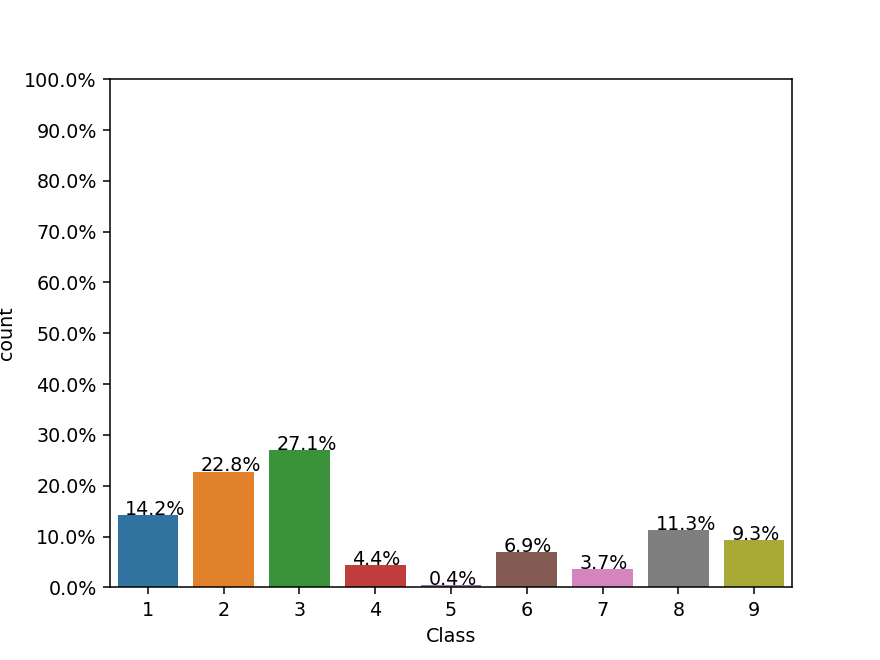

In [6]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1
ax = sns.countplot(x = 'Class', data = Y)
for p in ax.patches:
    ax.annotate(f'{(100*p.get_height()/total):.1f}%', (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [160]:
#file sizes of byte files

files = os.listdir('byteFiles')
file_names = Y['Id'].to_list()
class_name = Y['Class'].to_list()
class_bytesFile = []
size_byteFile = []
fnames = []

for file in files:
    statinfo = os.stat('byteFiles/'+ file)
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    file = file.split('.')[0]
    if any (file == file_name for file_name in file_names):
        i = file_names.index(file)
        class_bytesFile.append(class_name[i])
        size_byteFile.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte = pd.DataFrame({'ID': fnames, 'byte_file_size': size_byteFile, 'class': class_bytesFile})
print(data_size_byte.head())

                     ID  byte_file_size  class
0  01azqd4InC7m9JpocGv5        5.012695      9
1  01IsoiSMh5gxyDYTl4CB        6.556152      2
2  01jsnpXSAlgw6aPeDxrU        4.602051      9
3  01kcPWA9K2BOxQeS5Rju        0.679688      1
4  01SuzwMJEIXsK7A8dQbl        0.438965      8


<IPython.core.display.Javascript object>


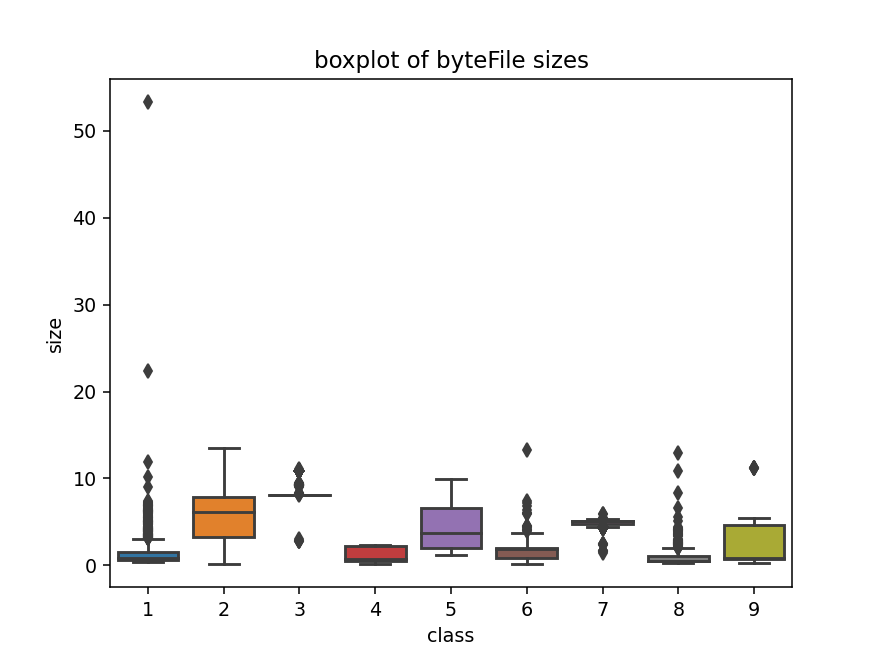

In [7]:
#boxplot of byte files

ax = sns.boxplot(x="class", y="size", data=data_size_byte)
plt.title("boxplot of byteFile sizes")
plt.show()

In [9]:
%%time
# Uni-Gram Byte Feature extraction from byte files

#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in tqdm(files, desc ="Converted to .txt file:"):
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()


files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0

# program to convert into bag of words of bytefiles
# this is custom-built bag of words.
# this is unigram bag of words
# This is a Custom Implementation of CountVectorizer as CountVectorizer will NOT suport working on such huge file system of 50GB
# For this Uni-Gram feature creating and writing to a file named 'result.csv'

byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")

byte_feature_file.write("\n")

for file in tqdm(files, desc ="Unigram features created from .txt files:"):
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

Unigram features created from .txt files:: 100%|███████████████████████████████| 10868/10868 [8:49:49<00:00,  2.93s/it]

Wall time: 9h 38min 37s


In [82]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff     ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753   1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902   8588  
2  9107  ...  2325  2358  2242  2885  2863  2471  2786   2680  49144    468  
3  1078  ...   478   873   485   462   516  1133   471    761   7998  13940  
4   422  ...   847   947   350   209   239   653   221    242   2199   9008  

[5 rows x 258 columns]

In [161]:
data_size_byte.head(2)

ID  byte_file_size  class
0  01azqd4InC7m9JpocGv5        5.012695      9
1  01IsoiSMh5gxyDYTl4CB        6.556152      2

In [162]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f9    fa    fb    fc    fd     fe     ff    ??  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753  1824   
1  9291  ...   439   281   302  7639   518  17001  54902  8588   

   byte_file_size  class  
0        5.012695      9  
1        6.556152      2  

[2 rows x 260 columns]

In [5]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


In [12]:
result = normalize(byte_features_with_size)
result.head(2)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   

          5         6         7         8  ...       f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.01356  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.00192  0.001147  0.001329   

         fc        fd        fe        ff        ??      size  class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  

[2 rows x 260 columns]

In [13]:
data_y = result['class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<IPython.core.display.Javascript object>


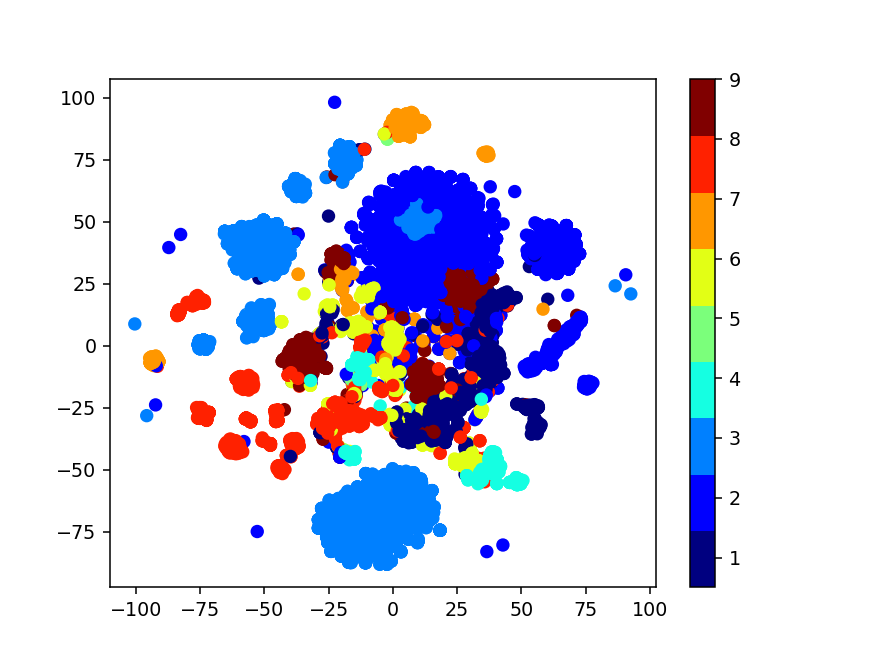

In [25]:
# Multivariate Analysis on byte files

#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


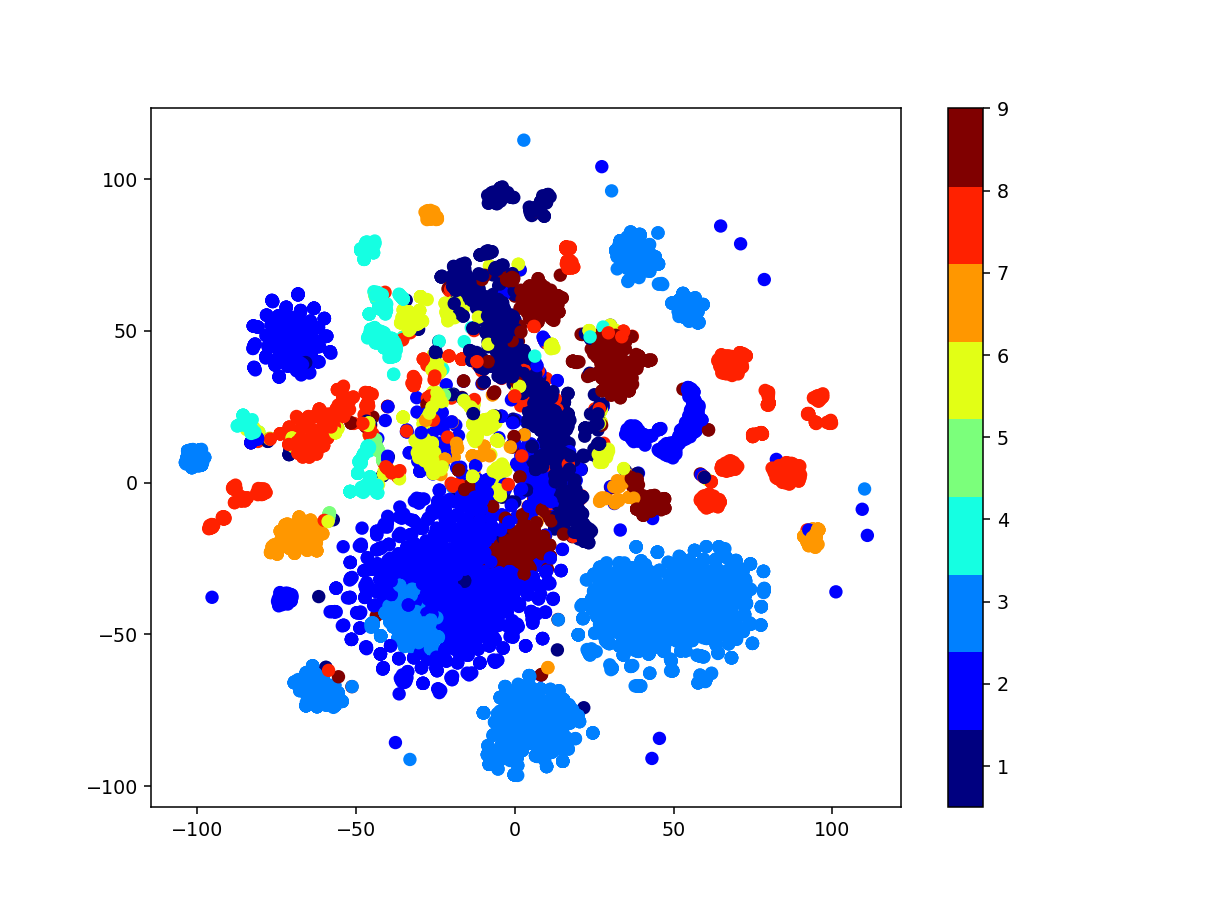

In [26]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split of only Byte Files Features

In [29]:
data_y = result['class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [30]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


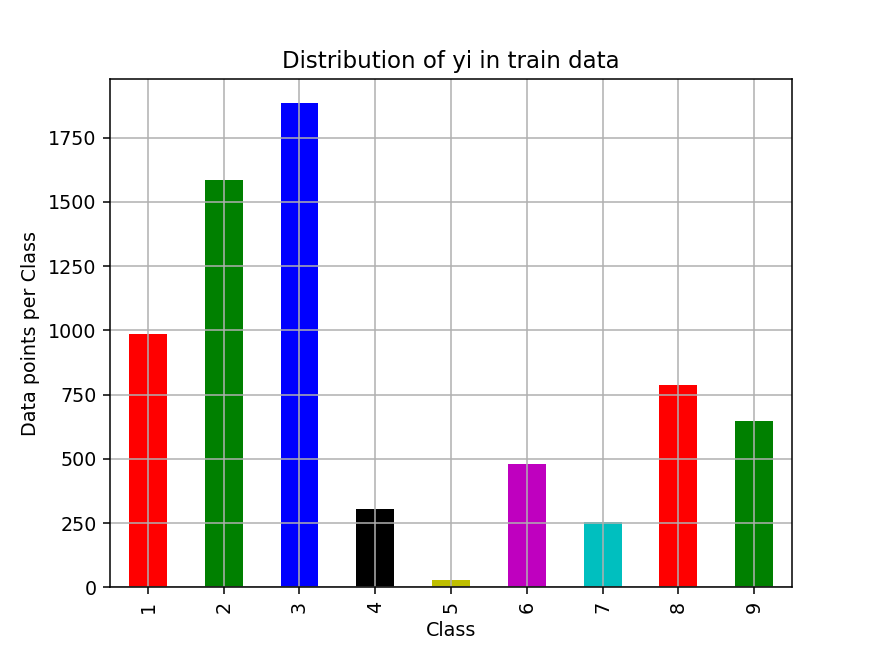

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
------------------------------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


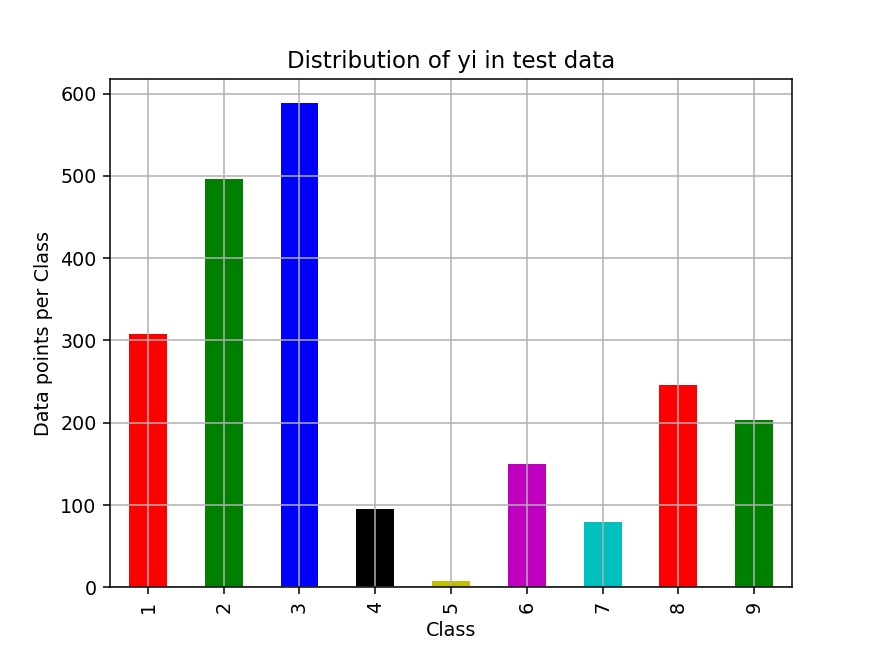

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
------------------------------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


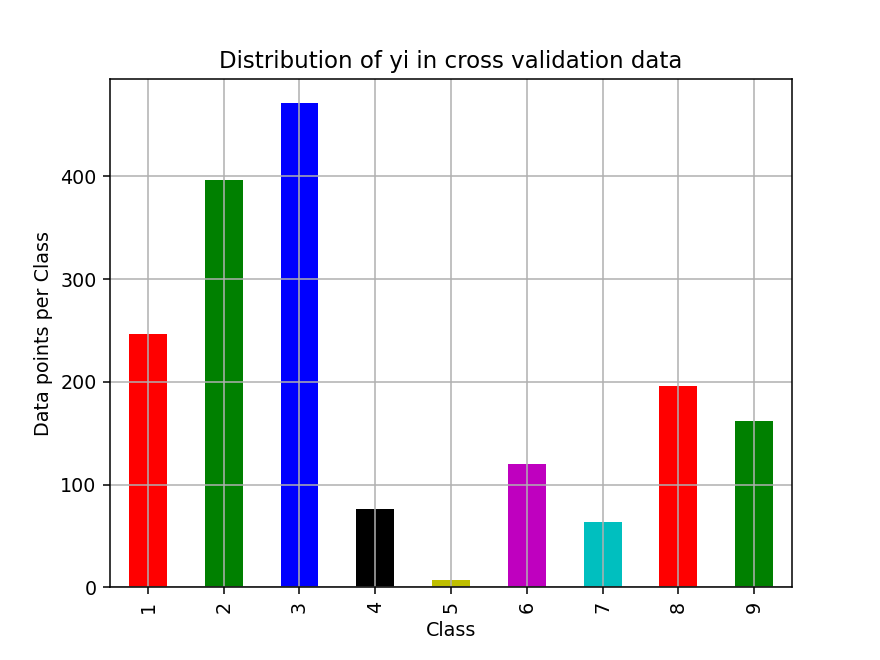

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [46]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*120)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*120)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [14]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# Random Model ONLY on bytes files

Log loss on Cross Validation Data using Random Model 2.459908413335626
Log loss on Test Data using Random Model 2.536965260172767
Number of misclassified points  89.37442502299908
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


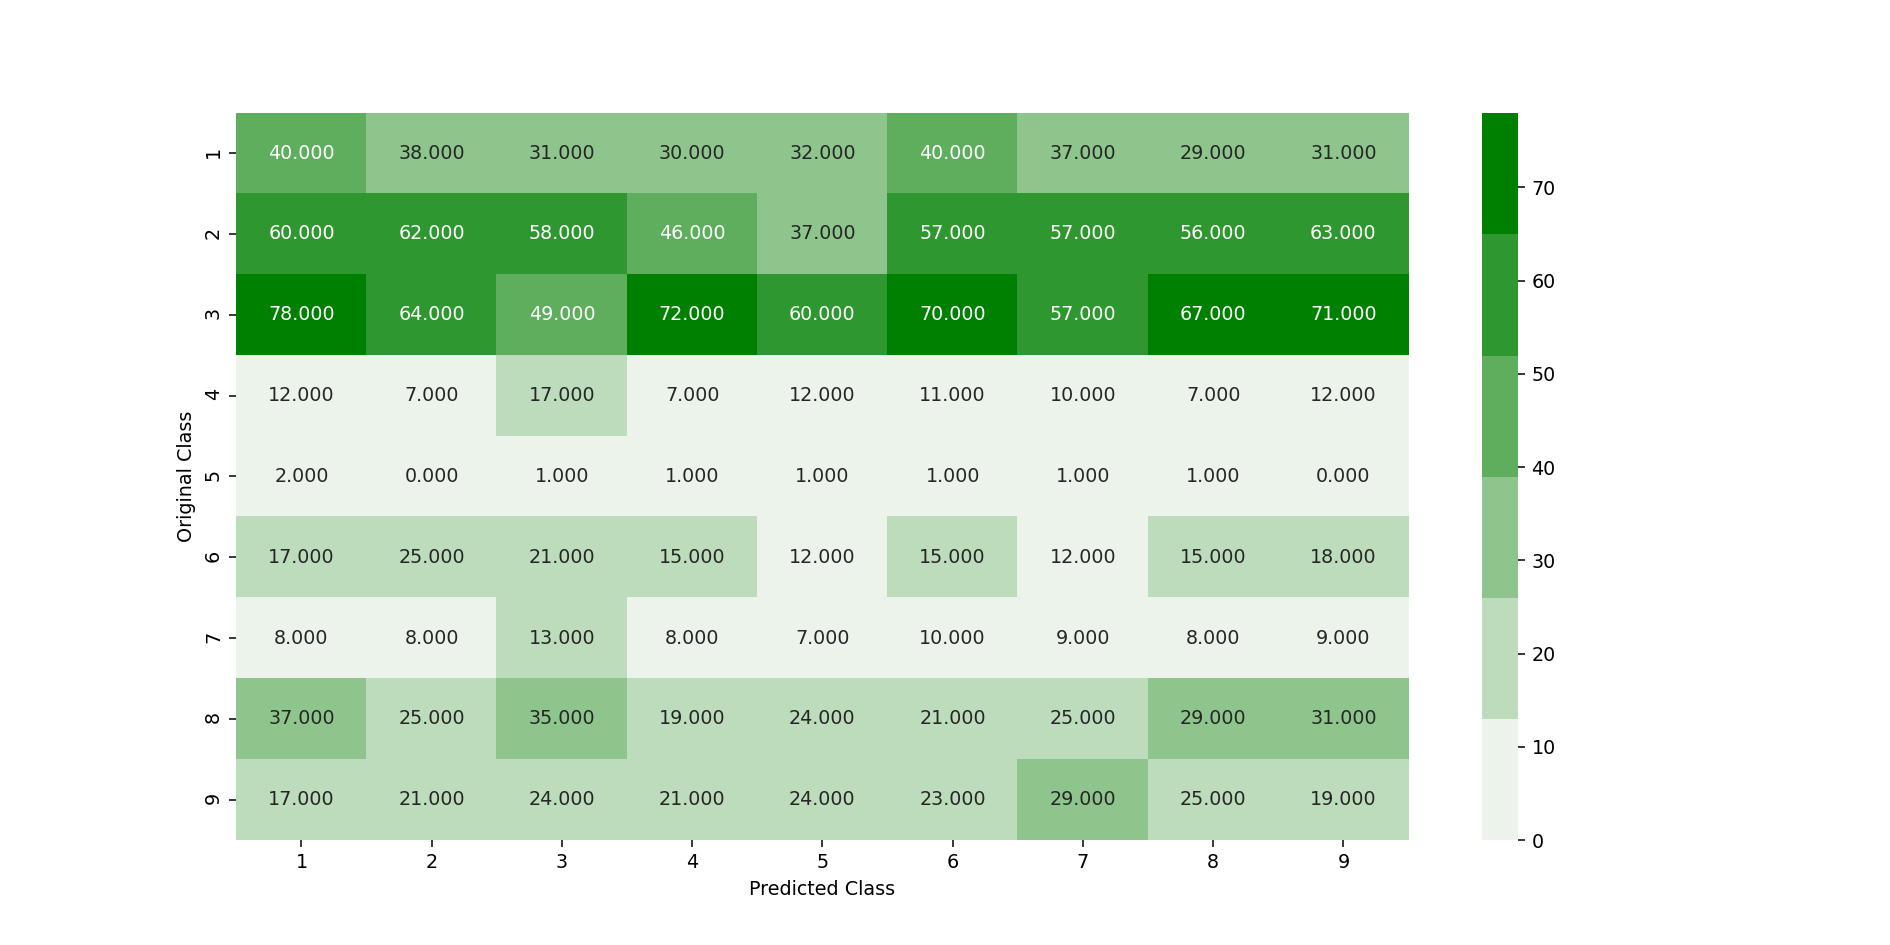

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


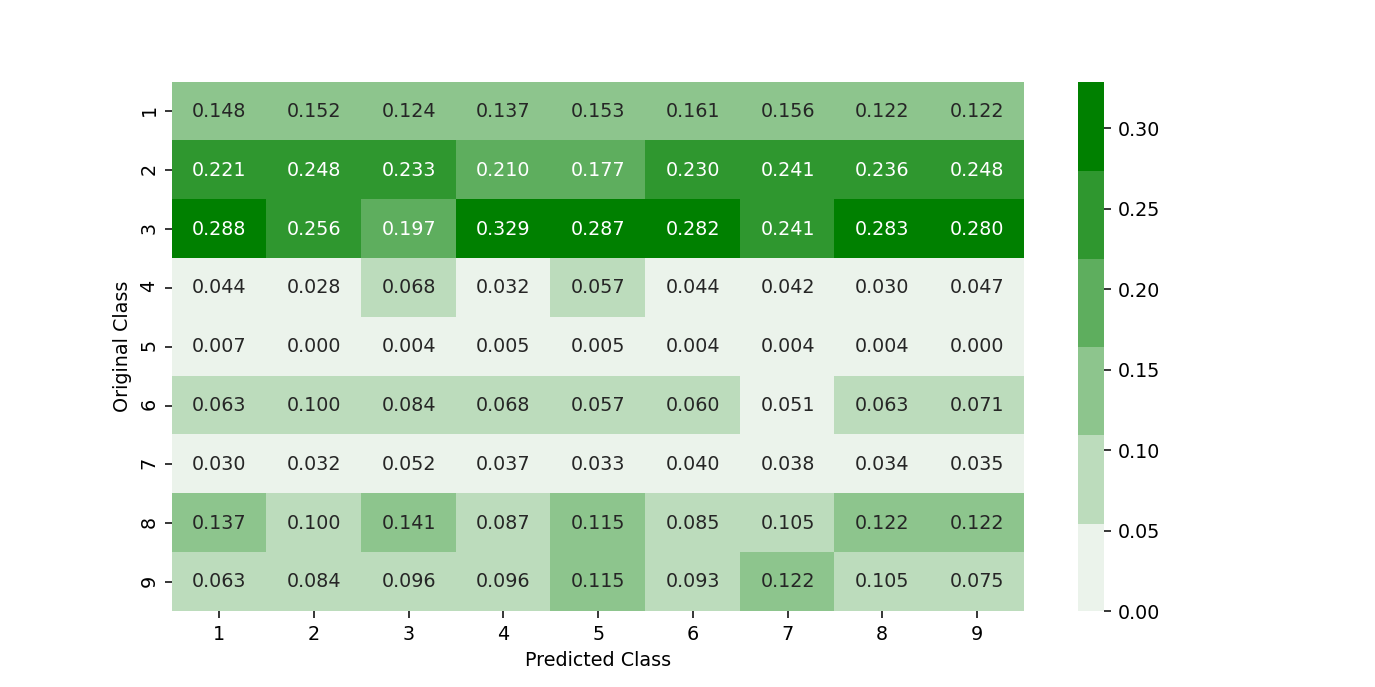

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


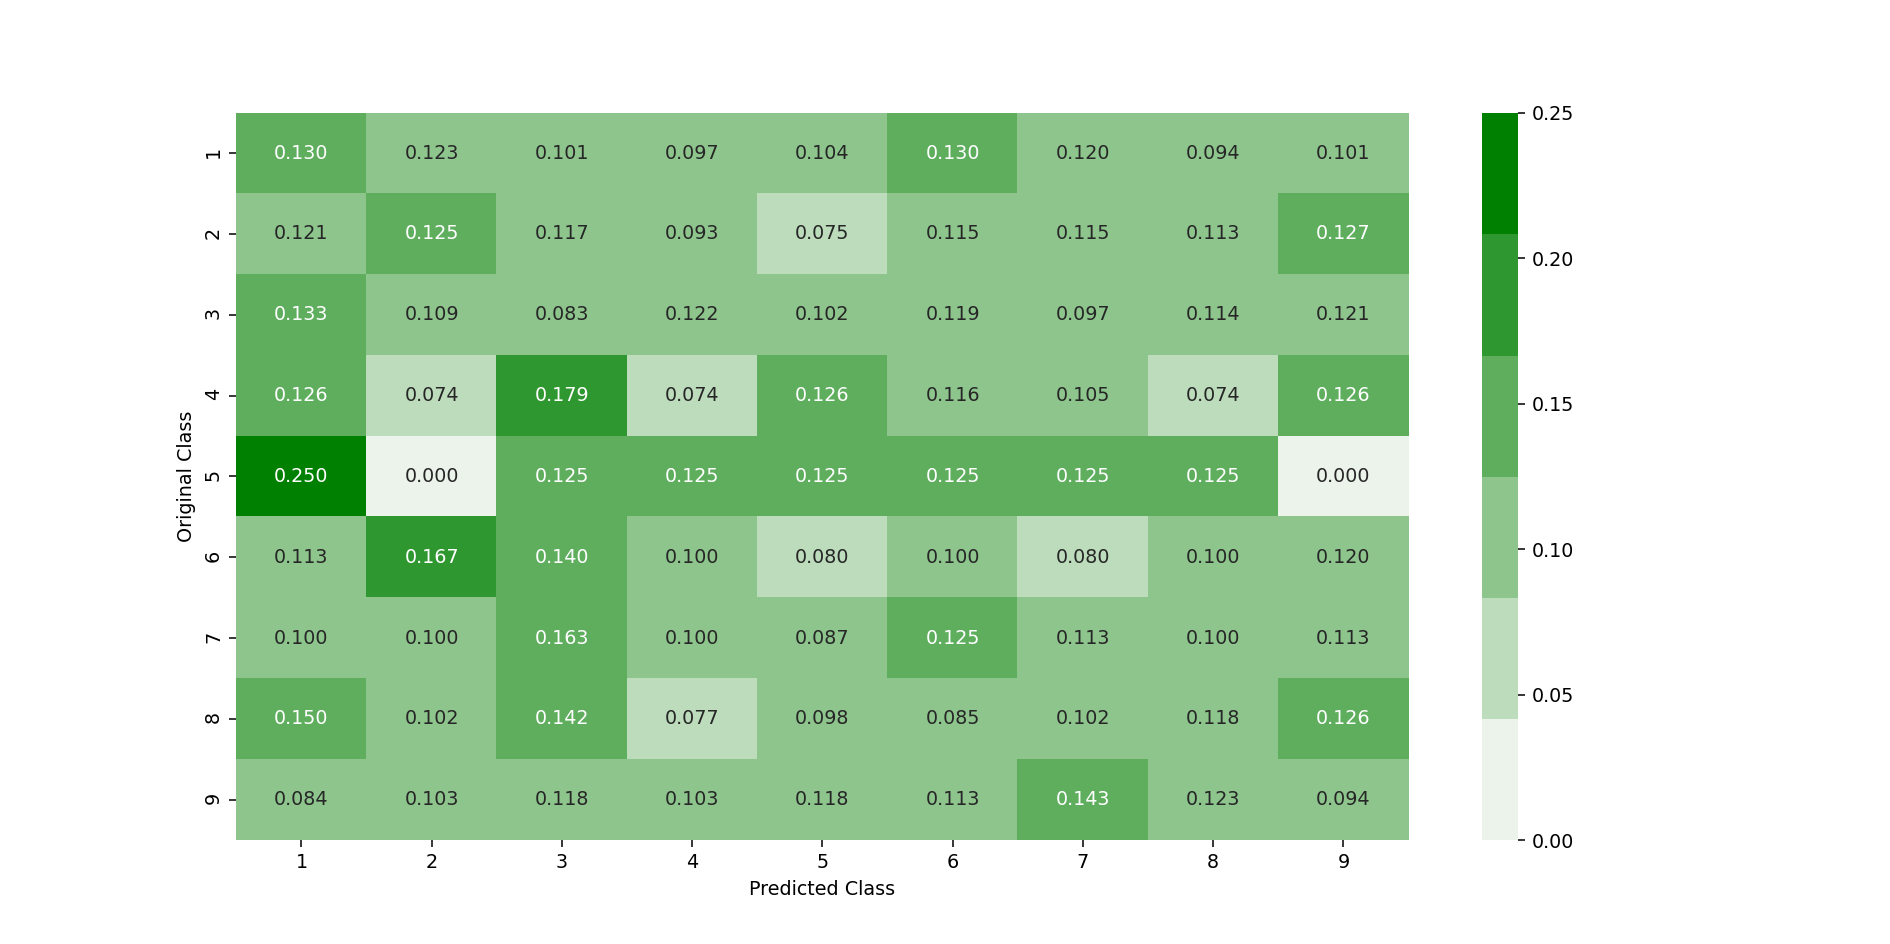

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

# K Nearest Neighbour Classification ONLY on bytes files 

log_loss for k =  1 is 0.2321412138843713
log_loss for k =  3 is 0.22982868140753165
log_loss for k =  5 is 0.24704023566439415
log_loss for k =  7 is 0.2614924286945711
log_loss for k =  9 is 0.27317214255033834
log_loss for k =  11 is 0.2841494010616062
log_loss for k =  13 is 0.2965097814315716


<IPython.core.display.Javascript object>


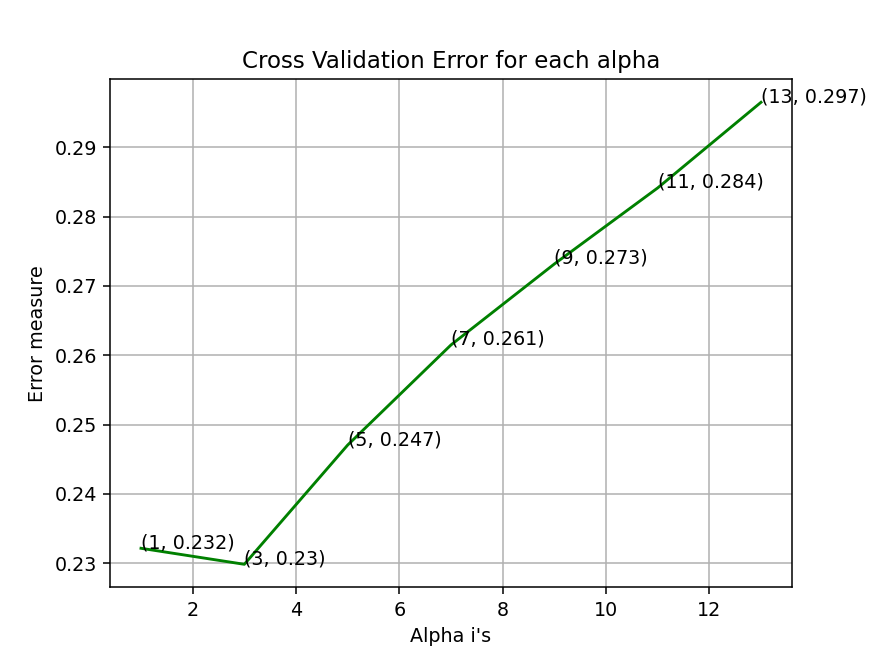

For values of best alpha =  3 The train log loss is: 0.11220434947306103
For values of best alpha =  3 The cross validation log loss is: 0.22982868140753165
For values of best alpha =  3 The test log loss is: 0.20965185705255168
Number of misclassified points  4.599816007359705
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


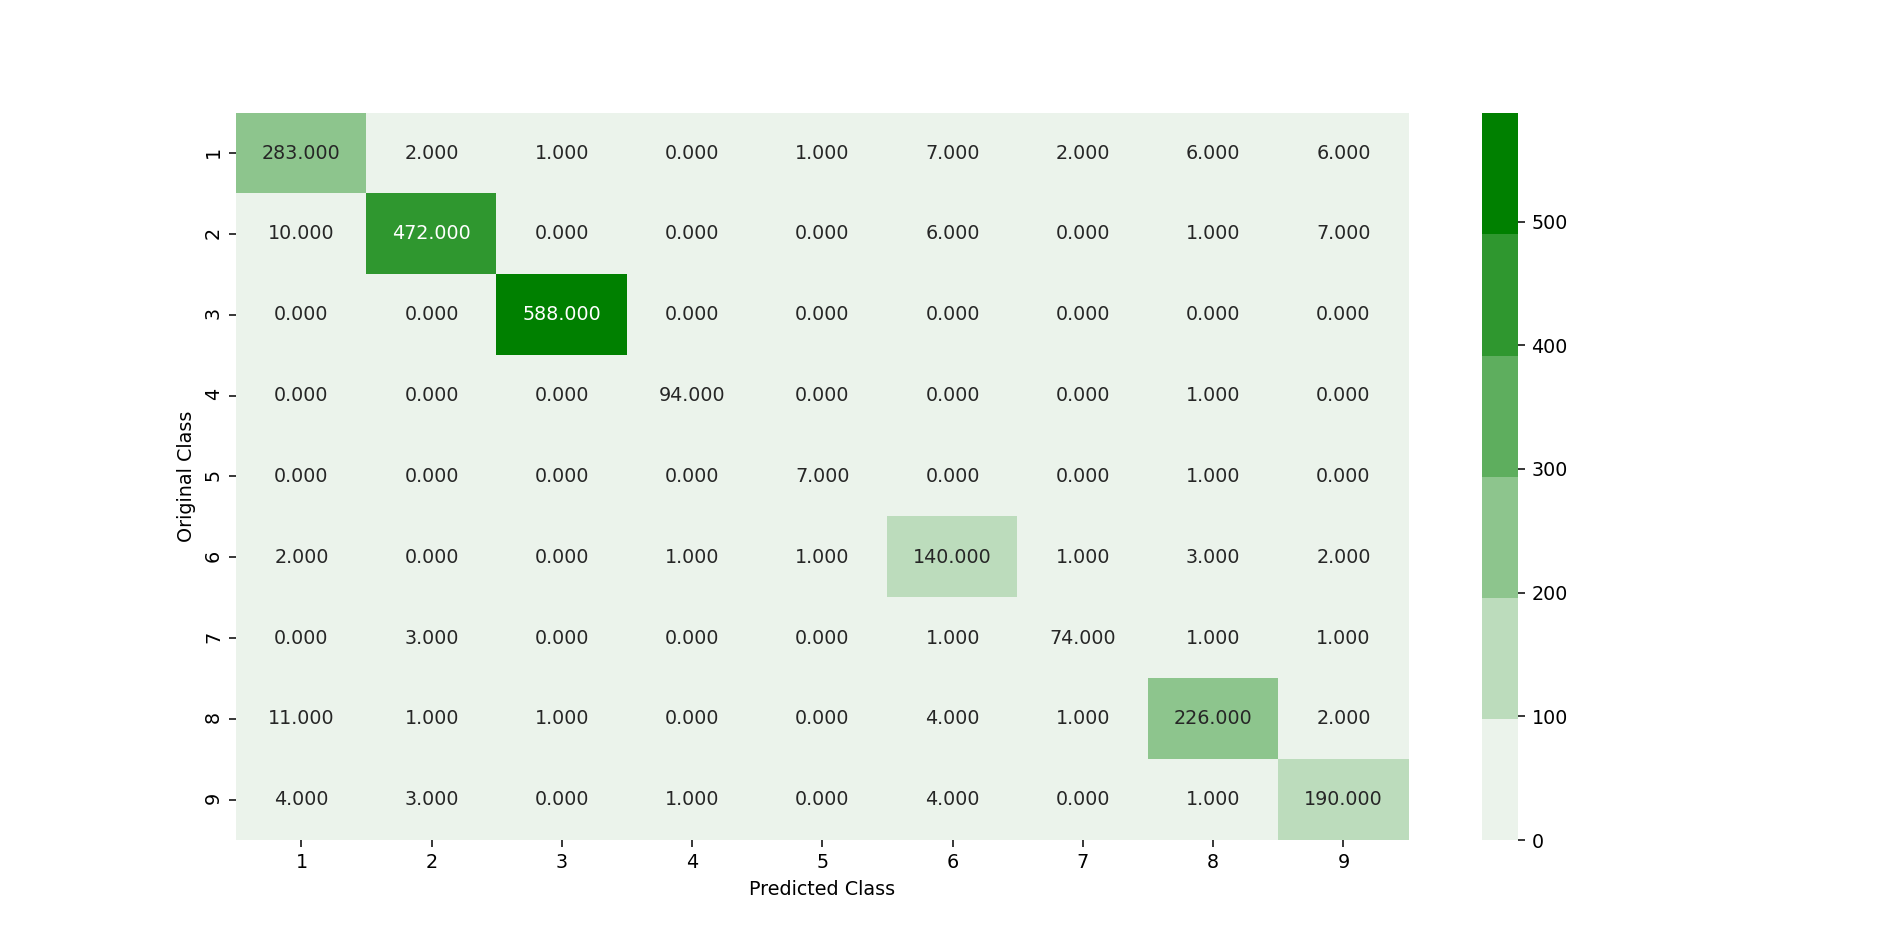

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


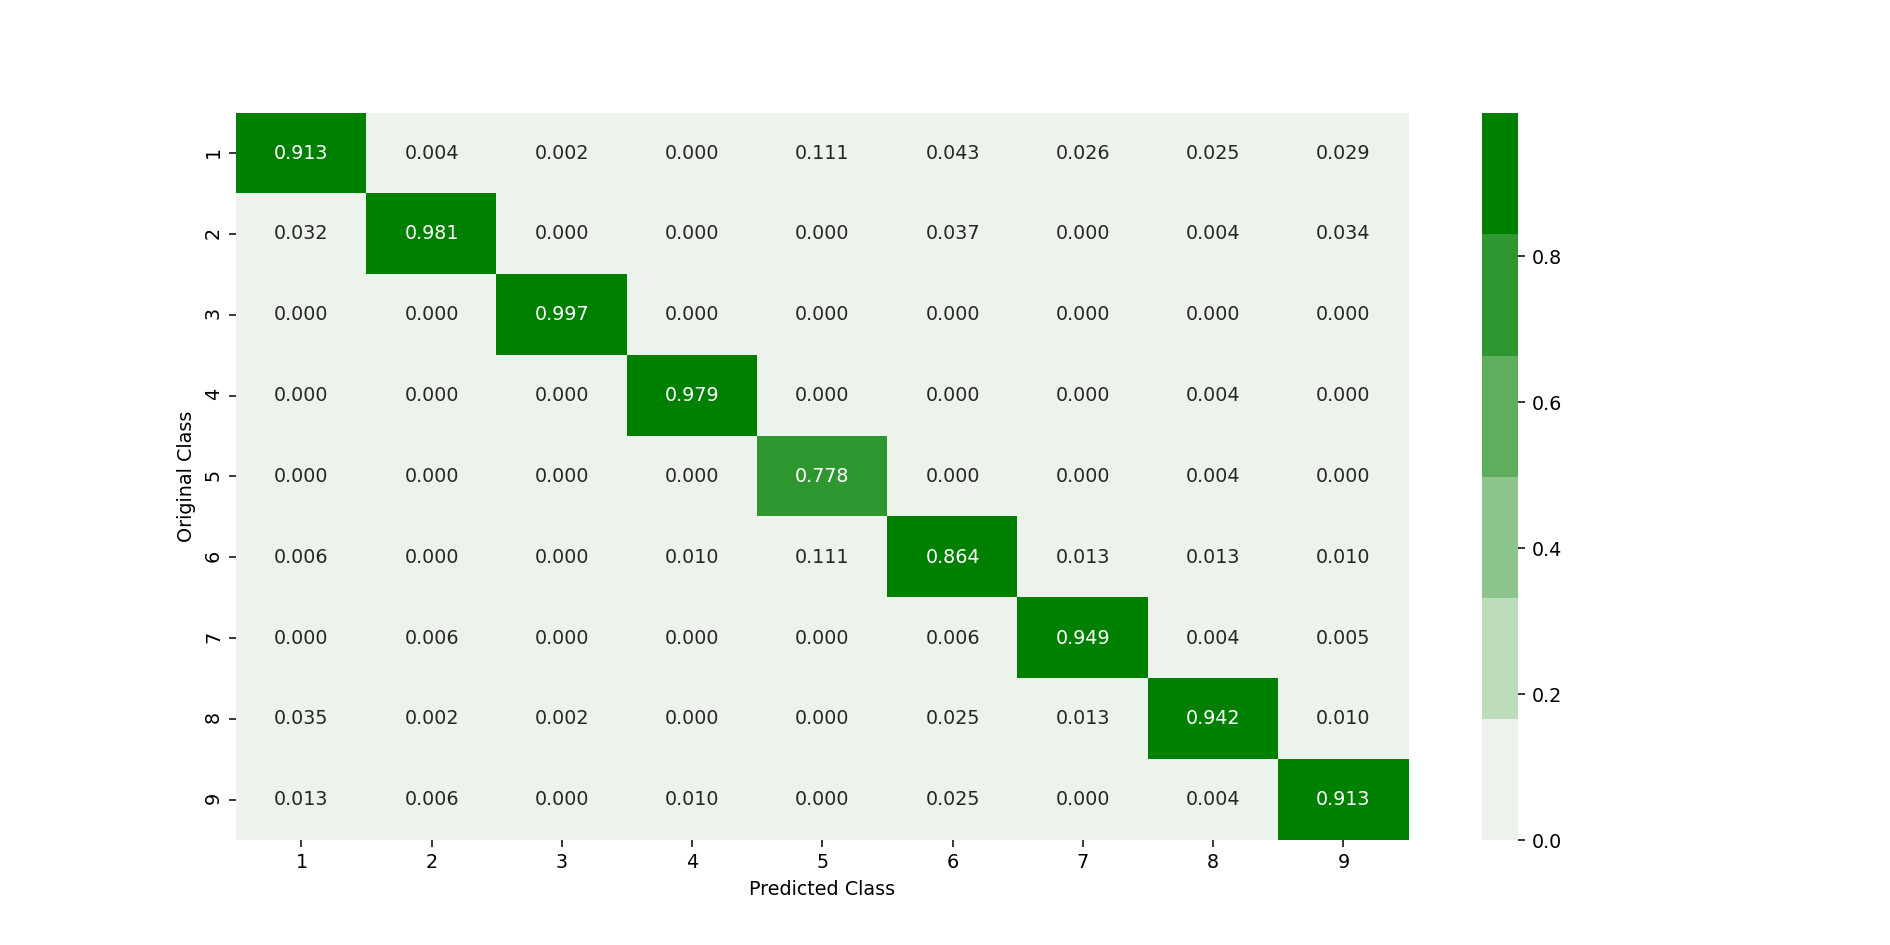

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


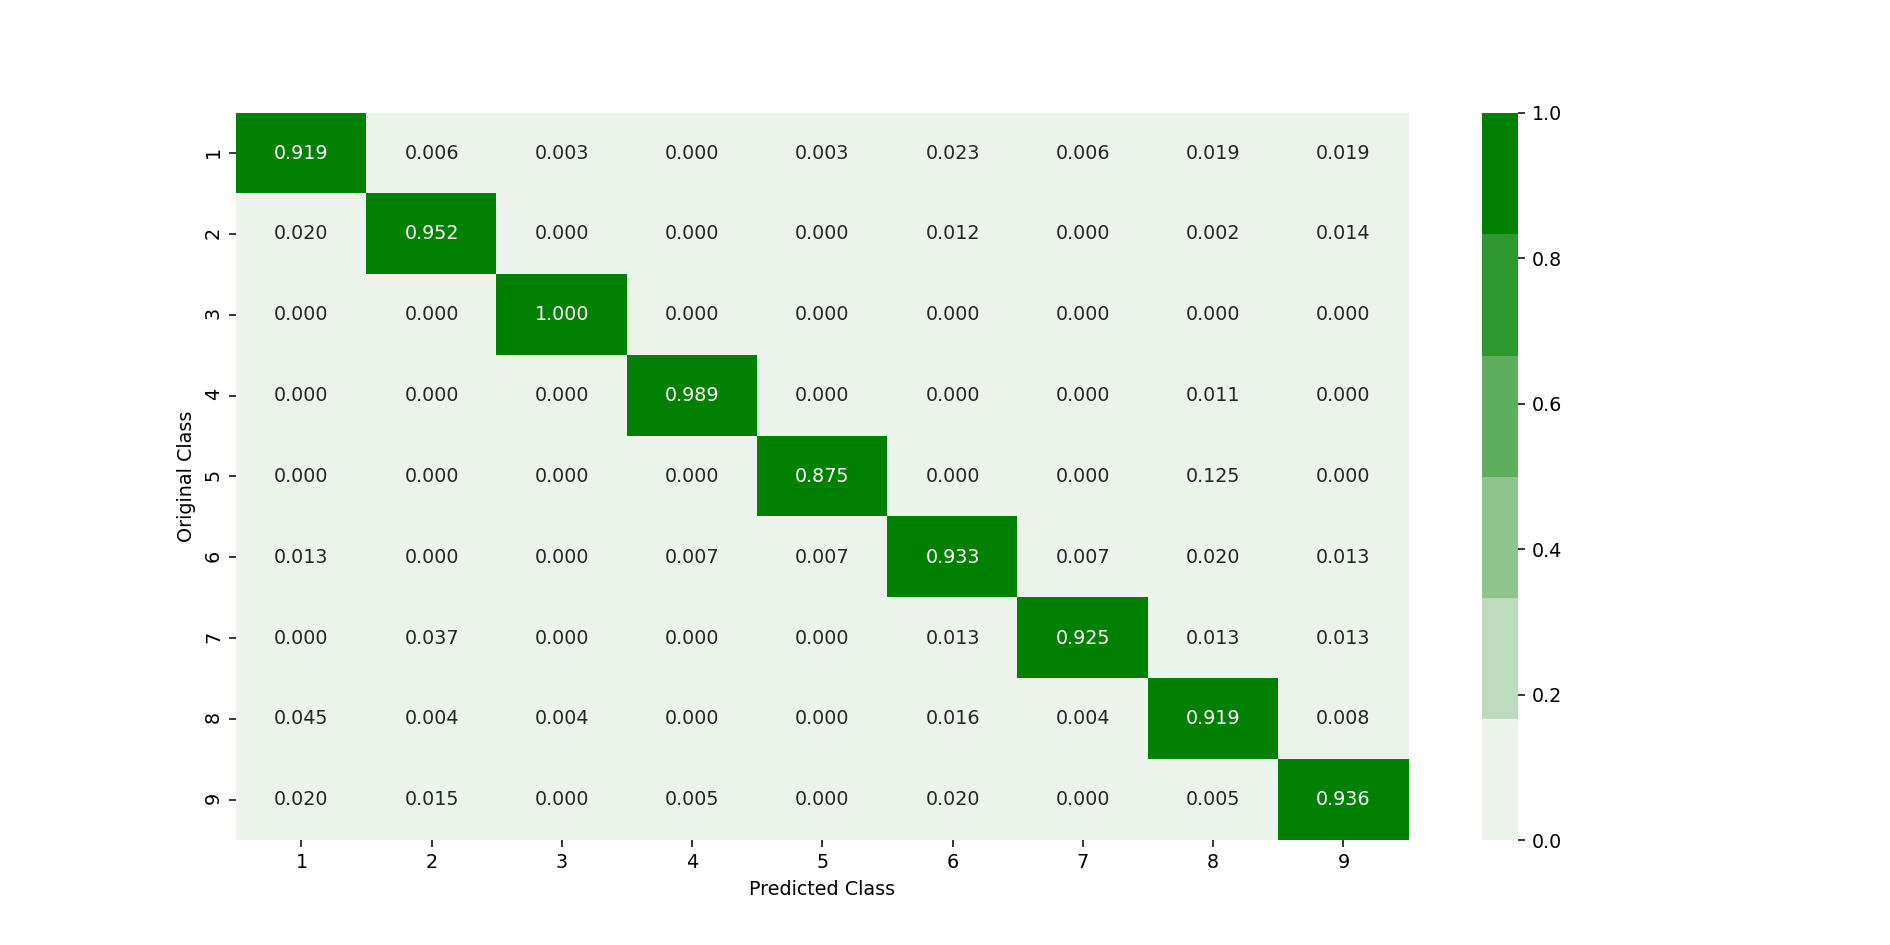

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [49]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_clf=KNeighborsClassifier(n_neighbors=i)
    k_clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_clf.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_clf=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# Logistic Regression ONLY on bytes files

log_loss for c =  1e-05 is 1.1519705139735907
log_loss for c =  0.0001 is 1.1519457709320637
log_loss for c =  0.001 is 1.1487809072196893
log_loss for c =  0.01 is 1.122719792252874
log_loss for c =  0.1 is 1.02718088426728
log_loss for c =  1 is 0.9654816987249583
log_loss for c =  10 is 0.9017148032685167
log_loss for c =  100 is 0.8921742981421538
log_loss for c =  1000 is 0.8976480538987575


<IPython.core.display.Javascript object>


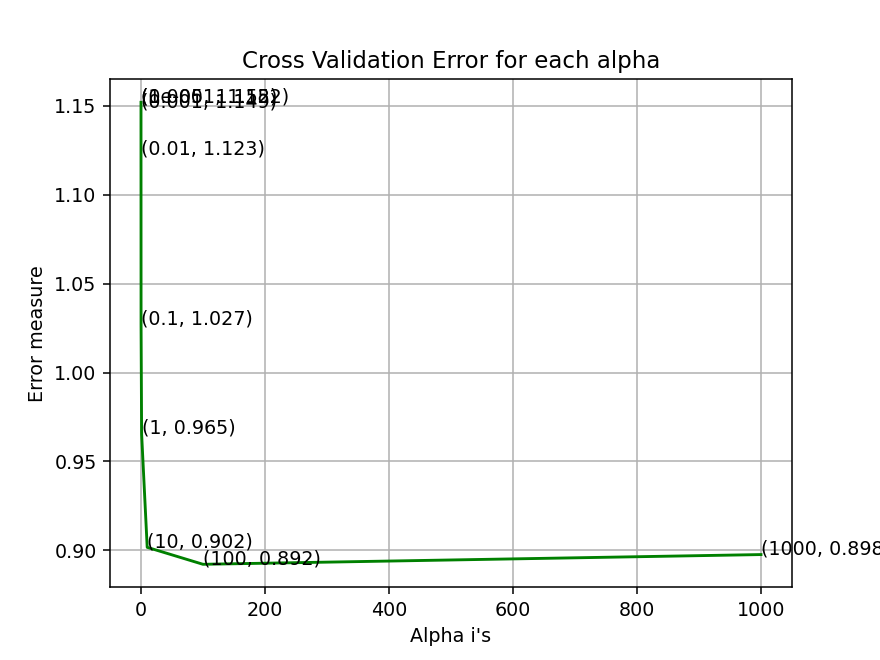

log loss for train data 0.8771875229732533
log loss for cv data 0.8921742981421538
log loss for test data 0.8595406340176945
Number of misclassified points  27.828886844526217
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


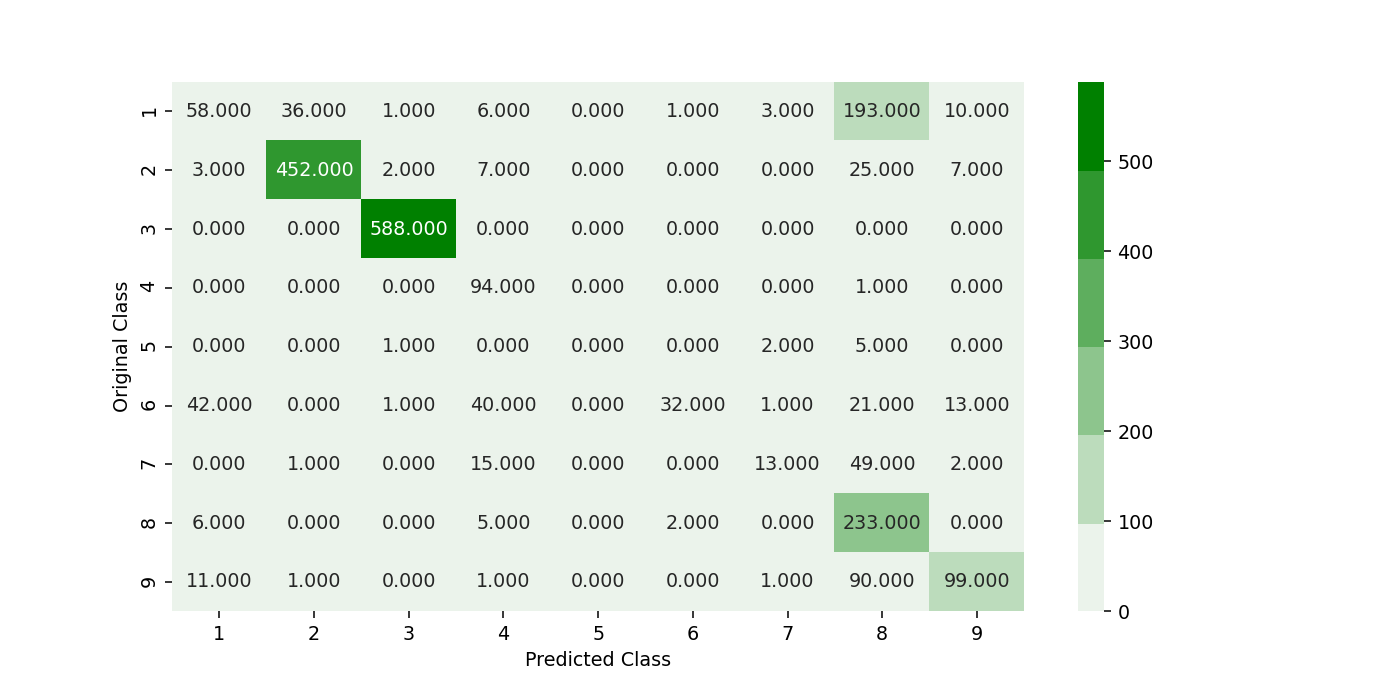

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


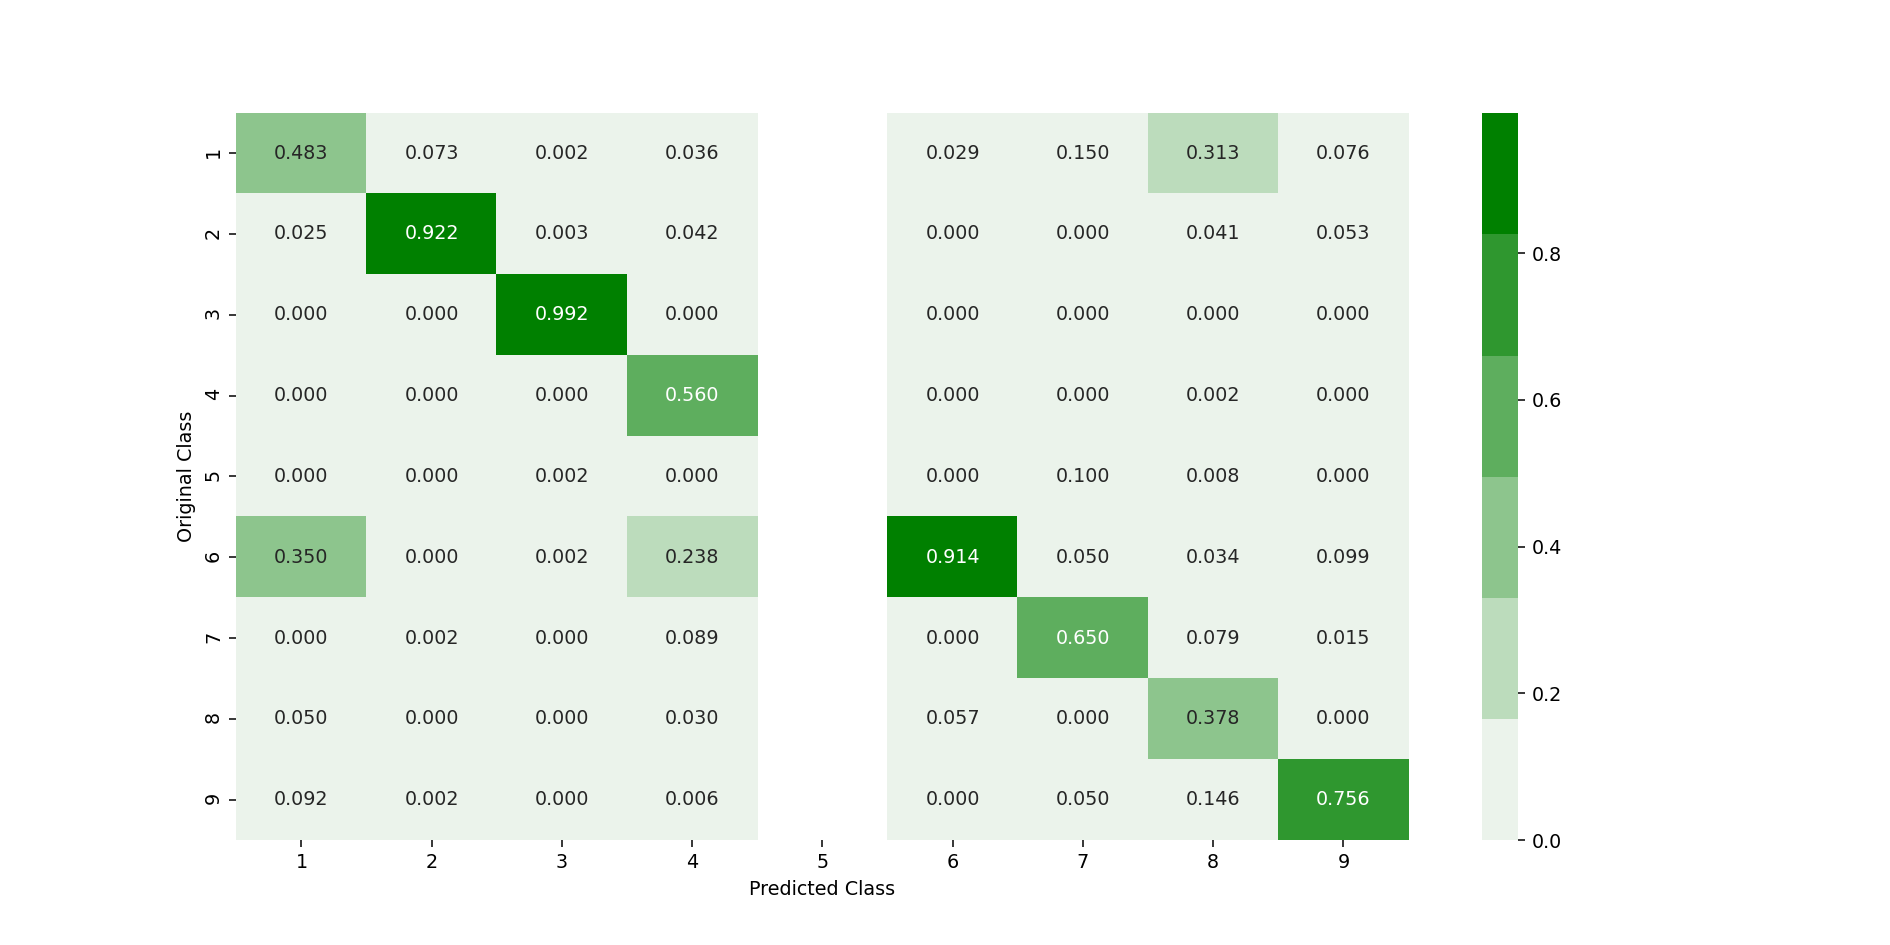

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


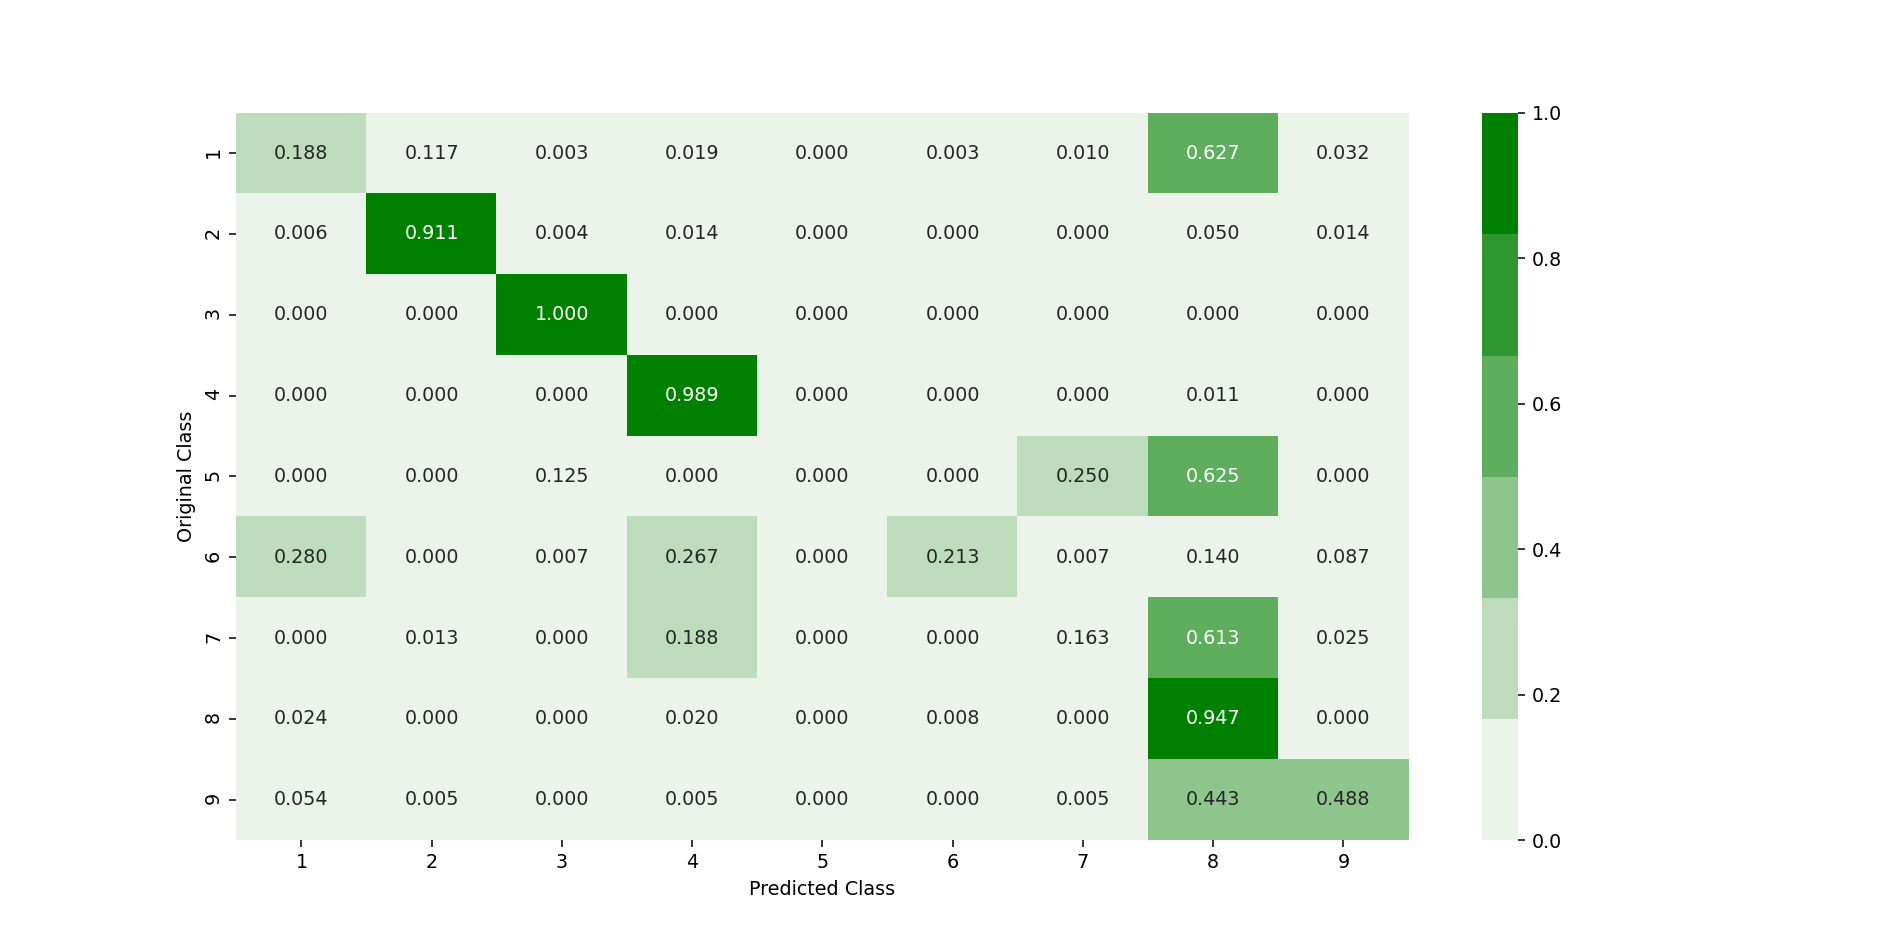

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [50]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# Random Forest Classifier ONLY on bytes files

log_loss for c =  10 is 0.08484995151306983
log_loss for c =  50 is 0.0755545325629414
log_loss for c =  100 is 0.07431227656456987
log_loss for c =  500 is 0.07410093835863214
log_loss for c =  1000 is 0.07374030944164592
log_loss for c =  2000 is 0.07393619619990591
log_loss for c =  3000 is 0.07398513695311161


<IPython.core.display.Javascript object>


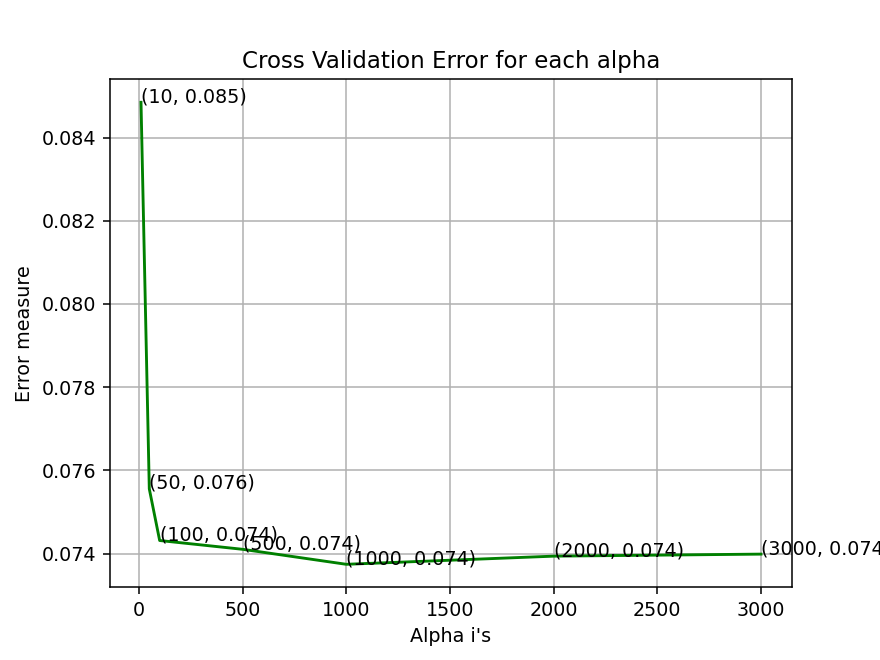

For values of best alpha =  1000 The train log loss is: 0.025319201723298292
For values of best alpha =  1000 The cross validation log loss is: 0.07374030944164592
For values of best alpha =  1000 The test log loss is: 0.08461784578532895
Number of misclassified points  1.6559337626494939
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


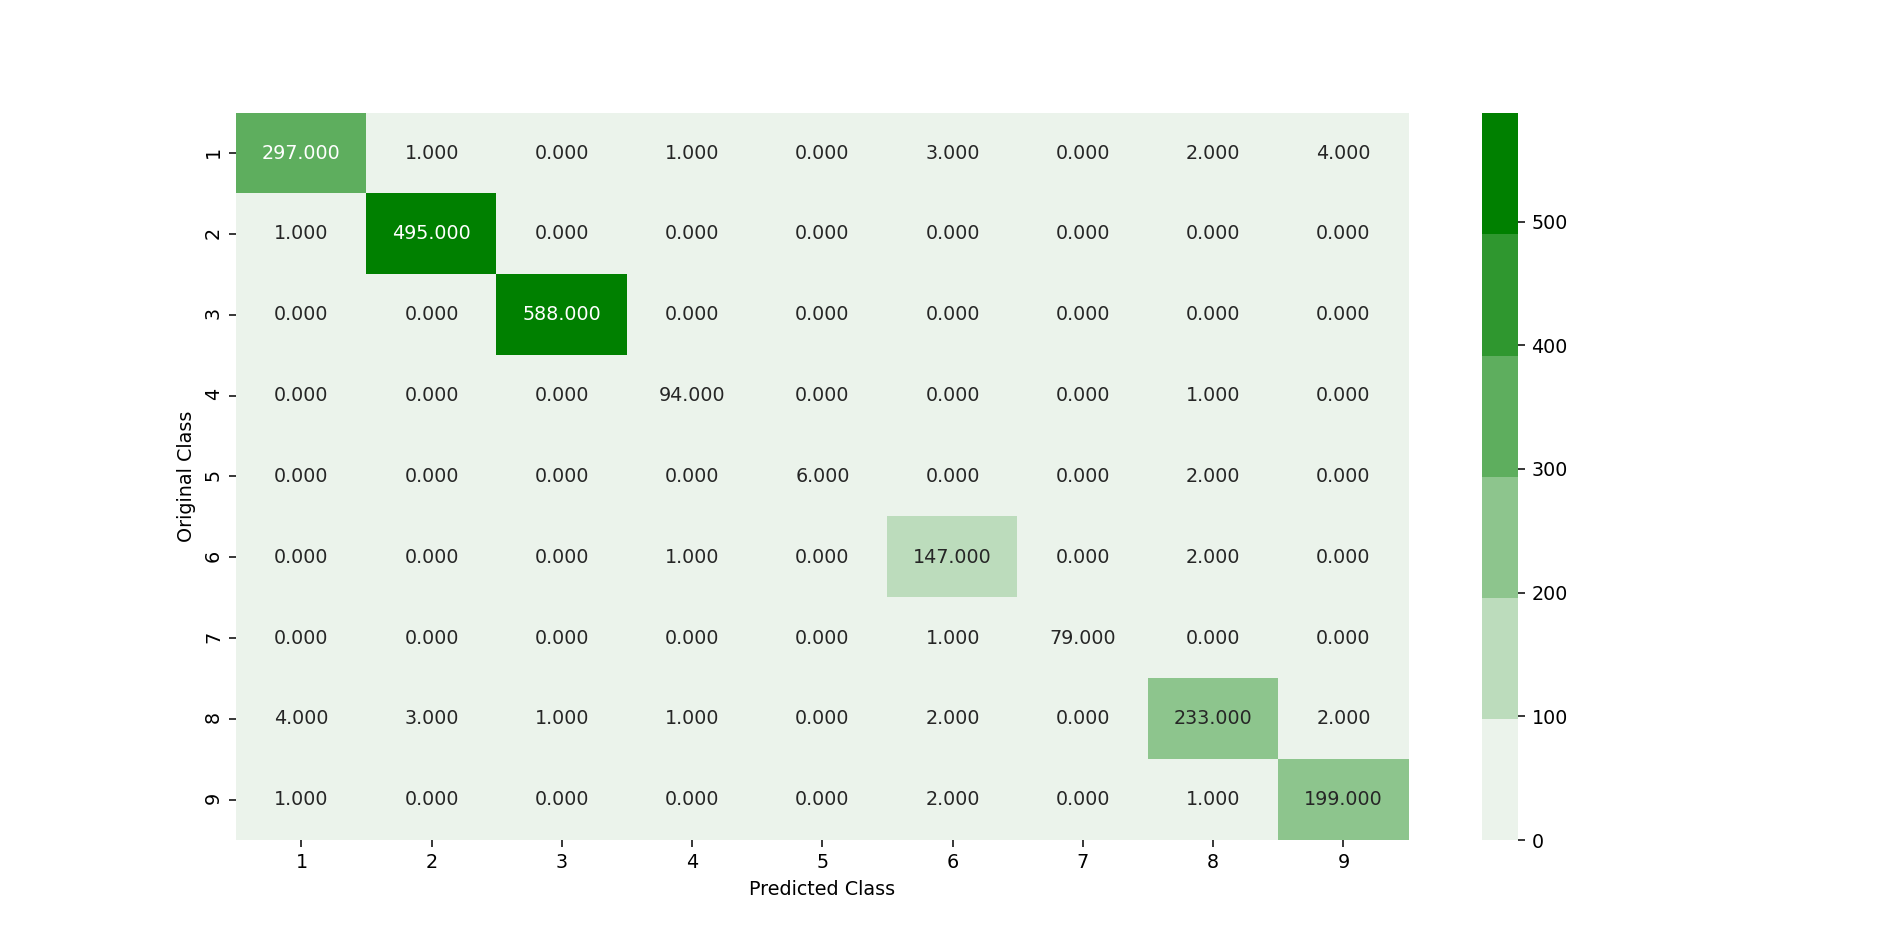

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


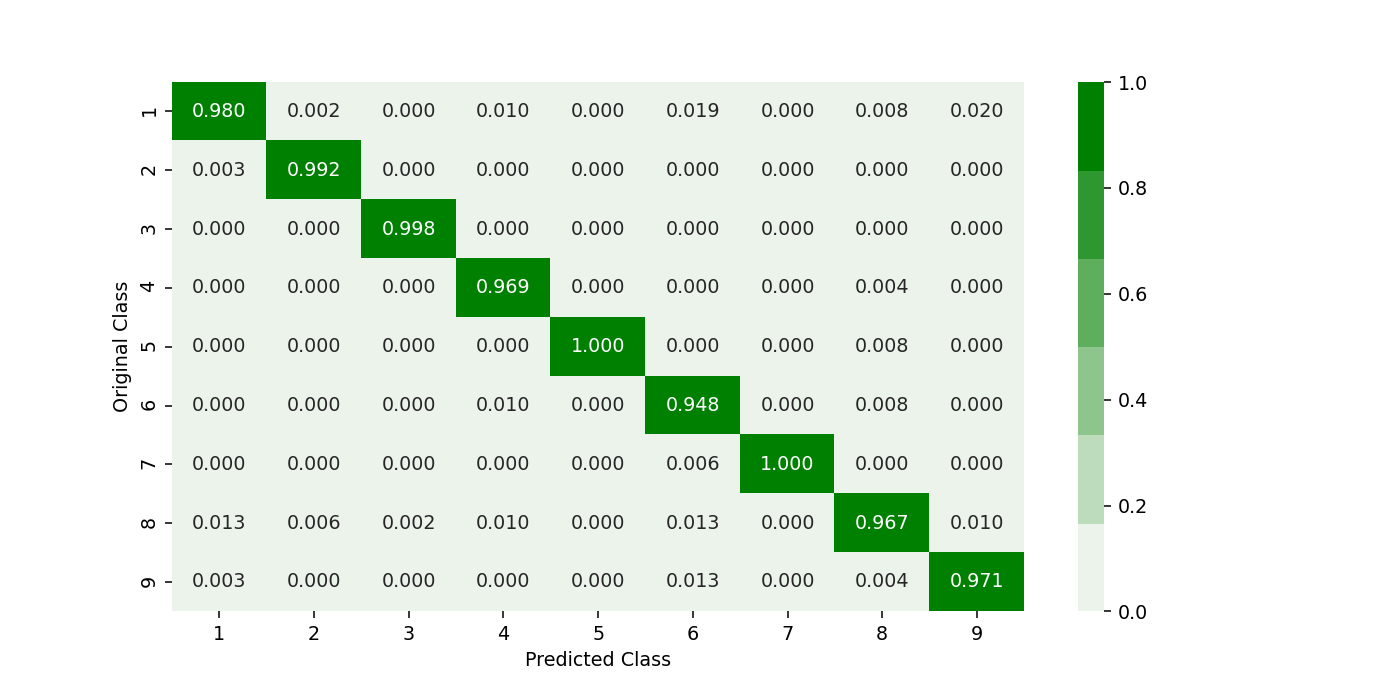

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


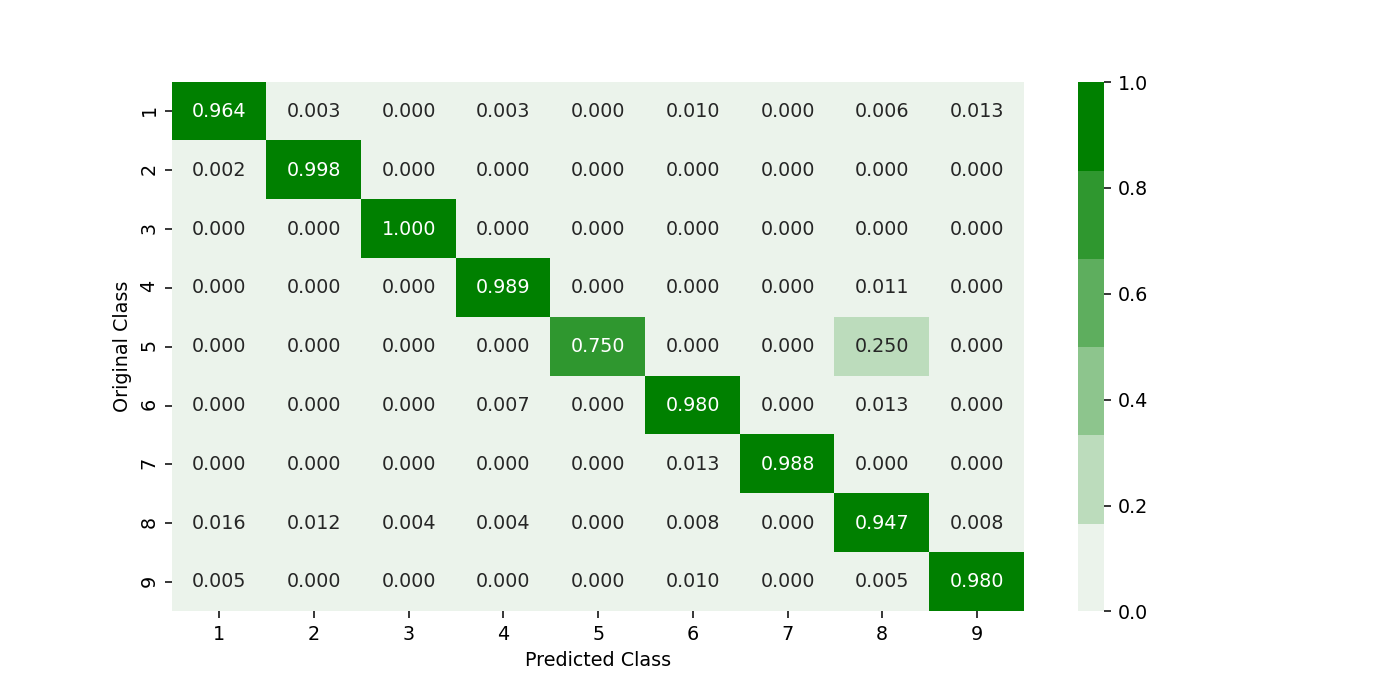

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [51]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_clf=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_clf.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_clf=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# XgBoost Classification ONLY on bytes files

log_loss for c =  10 is 0.19664585170826235
log_loss for c =  50 is 0.10488562766592407
log_loss for c =  100 is 0.08274188747493227
log_loss for c =  500 is 0.06787948541428647
log_loss for c =  1000 is 0.06658588691324664
log_loss for c =  2000 is 0.06612817138046655


<IPython.core.display.Javascript object>


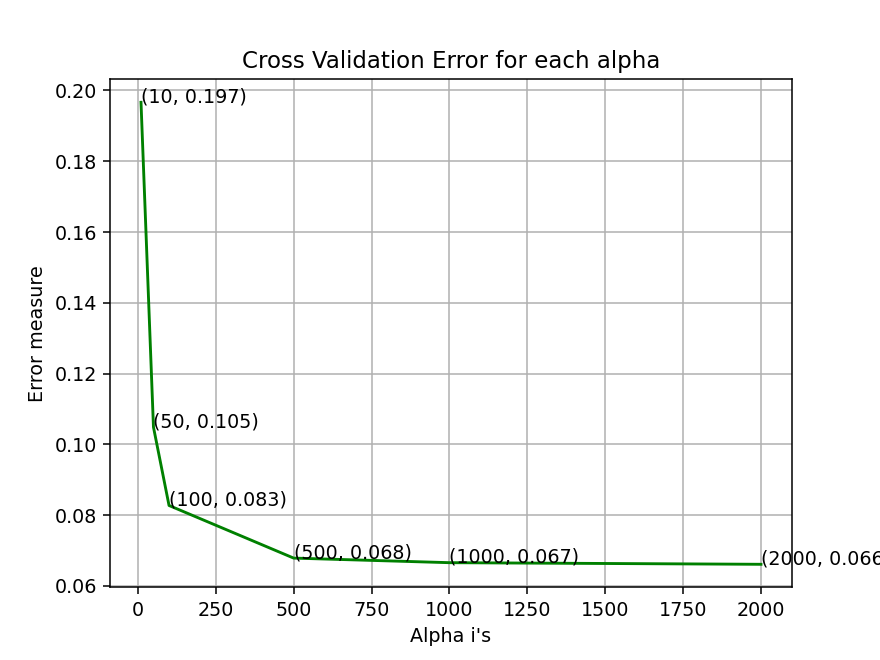

For values of best alpha =  2000 The train log loss is: 0.02301872720958414
For values of best alpha =  2000 The cross validation log loss is: 0.06612817138046655
For values of best alpha =  2000 The test log loss is: 0.0750501303673372
Number of misclassified points  1.3339466421343145
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


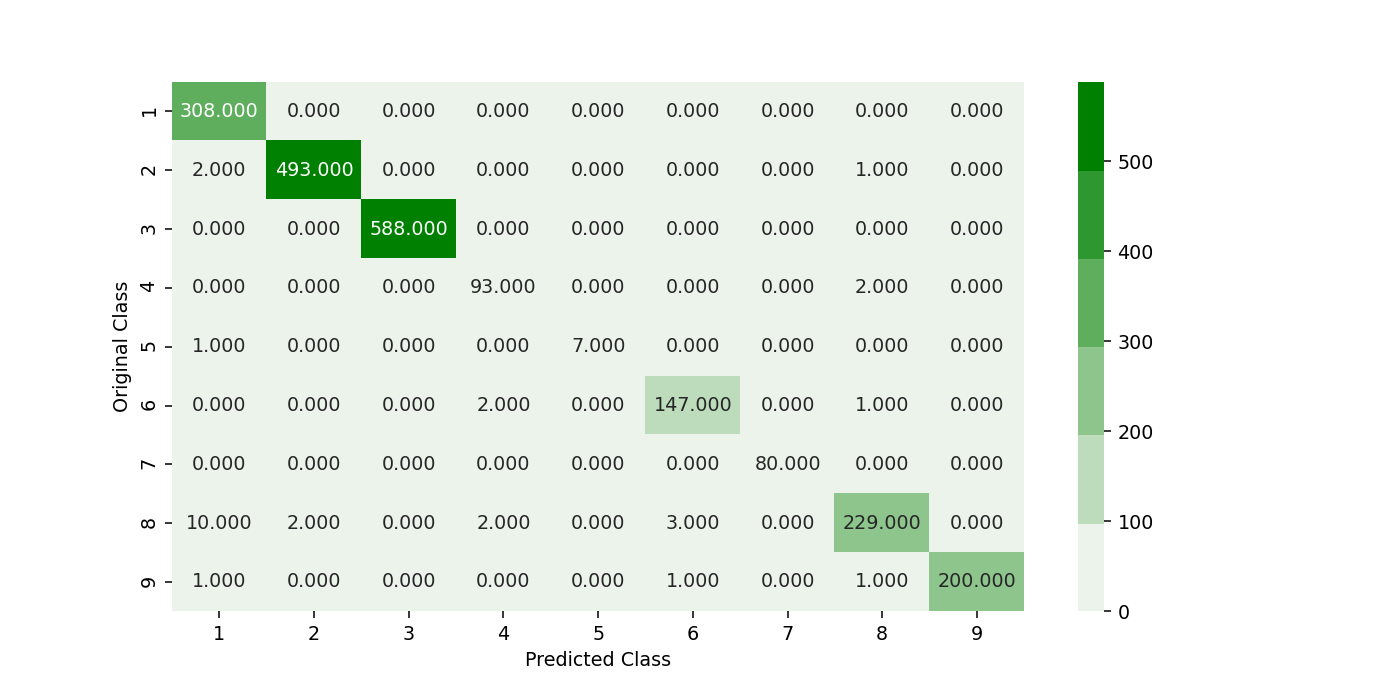

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


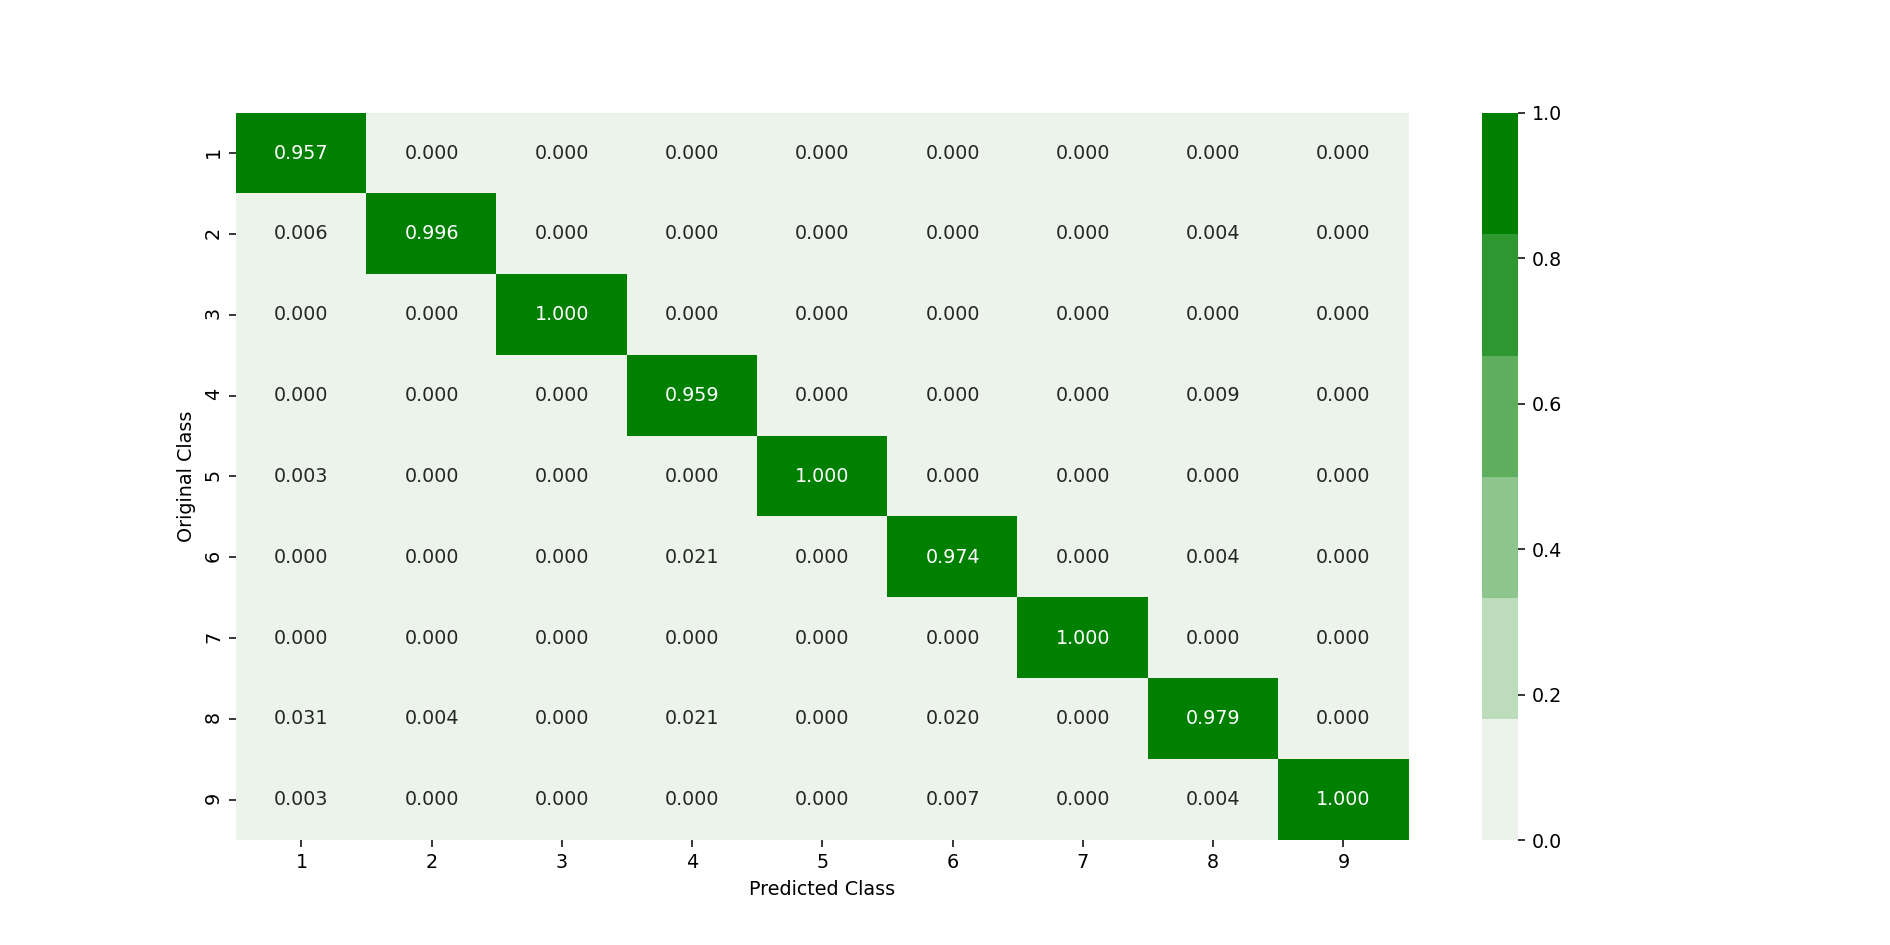

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


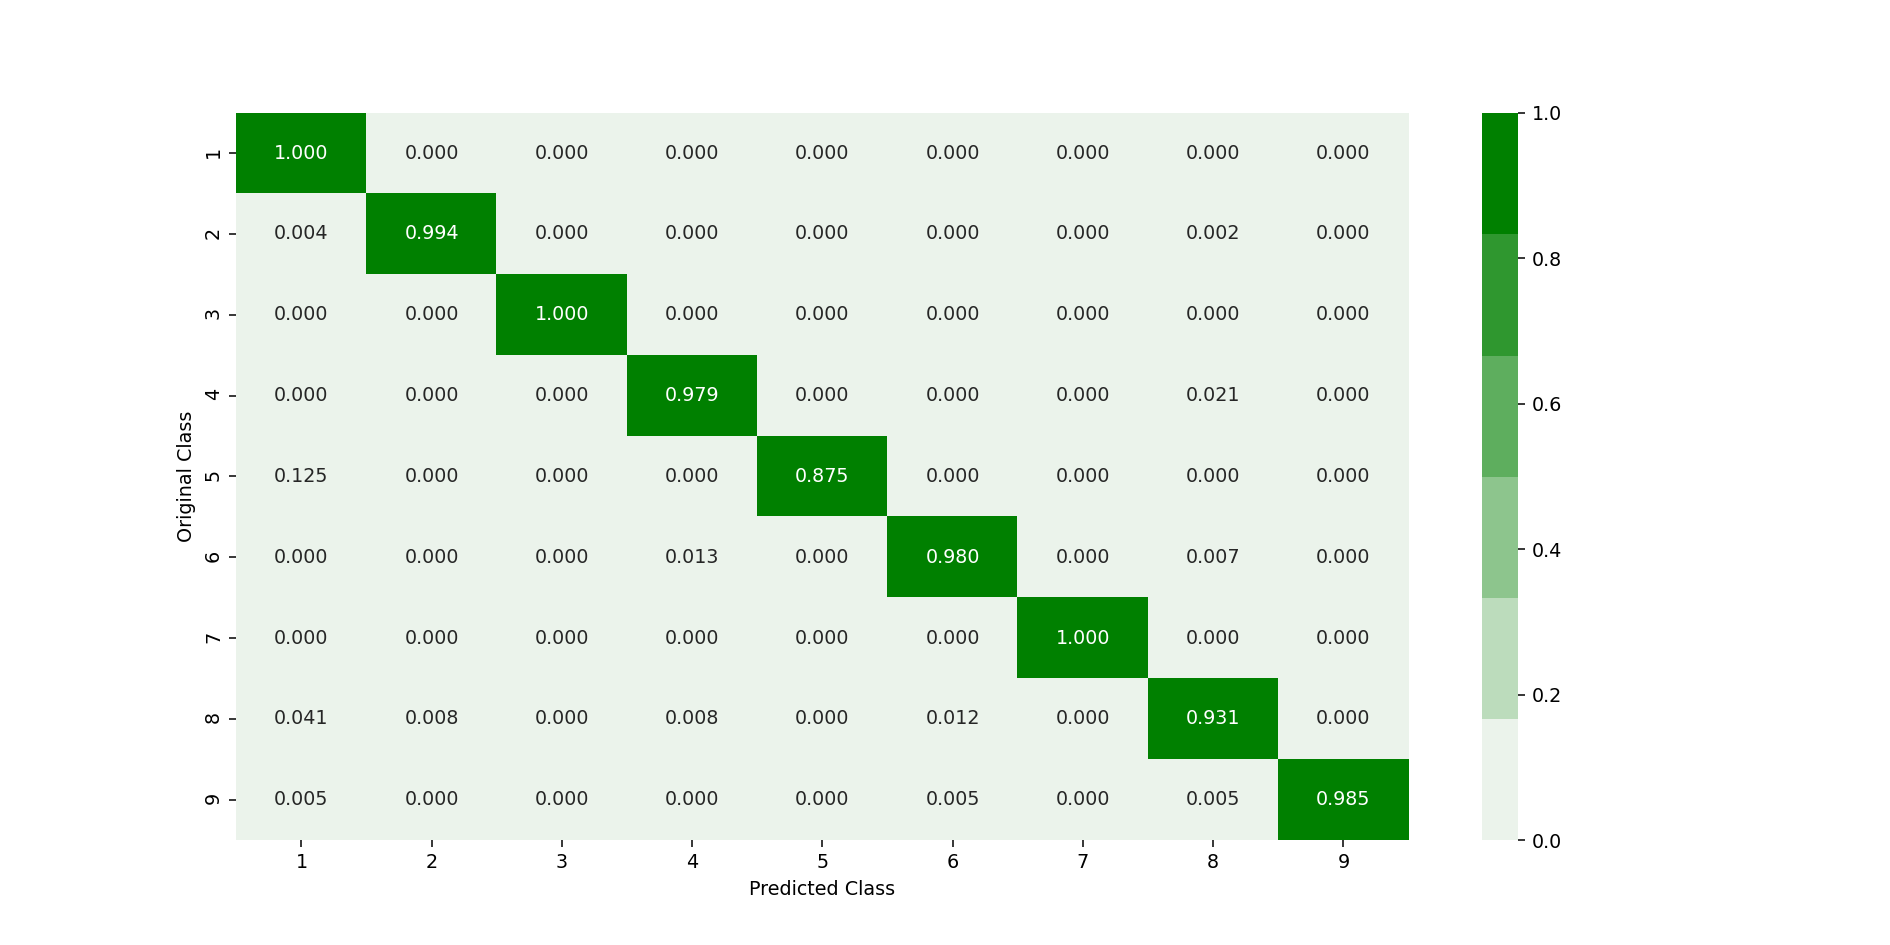

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance


alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_clf=XGBClassifier(n_estimators=i,nthread=-1)
    x_clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_clf.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_clf=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# XgBoost Classification with best hyper parameters using RandomSearch CV ONLY on bytes files

In [32]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_clf=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_clf1=RandomizedSearchCV(x_clf,param_distributions=prams,verbose=10,n_jobs=-1,)
random_clf1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed: 18.5min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed: 23.9min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed: 25.5min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.7min finished


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

In [33]:
print (random_clf1.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.5}


In [34]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance


x_clf=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_clf.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.02302873198006705
cv loss 0.06664277266907717
test loss 0.07565819547116165


# Creating features from .asm files

In [70]:
#intially create five folders named 'first','second','thrid','fourth','fifth'.
#this code tells us about random split of files into five folders

folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='asmFiles/'
files = os.listdir('asmFiles')
data=list(range(0,10868))
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],folder_1)
    elif i%5==1:
        shutil.move(source+files[data[i]],folder_2)
    elif i%5 ==2:
        shutil.move(source+files[data[i]],folder_3)
    elif i%5 ==3:
        shutil.move(source+files[data[i]],folder_4)
    elif i%5==4:
        shutil.move(source+files[data[i]],folder_5)

In [36]:
# For .asm file guide refer: http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def first_process():
    
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #these prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    
    #these are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    
    file1=open("output/asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in tqdm(files, desc = 'First Process Progress'):
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
#         opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def second_process():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in tqdm(files, desc = 'Second Process Progress'):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
#         opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def third_process():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in tqdm(files, desc = 'Third Process Progress'):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
#         opcodefile.write(f2+" ")
        with codecs.open('third/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourth_process():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in tqdm(files, desc = 'Fourth Process Progress'):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
#         opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifth_process():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output/trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in tqdm(files, desc = 'Fifth Process Progress'):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
#         opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()
    
def main():
# the below code is used for multiprogramming
# the number of process depends upon the number of cores present System
# process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=multiprocessing.Process(target=first_process)
    p2=multiprocessing.Process(target=second_process)
    p3=multiprocessing.Process(target=third_process)
    p4=multiprocessing.Process(target=fourth_process)
    p5=multiprocessing.Process(target=fifth_process)
#p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
#After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()


In [15]:
# Reading the asm unigram features  
dfasm=pd.read_csv("asmFeatures.csv")
dfasm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
2  05EeG39MTRrI6VY21DPd       17   11119      0      323    1047      0   
3  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   
4  0AnoOZDNbPXIr2MRBSCJ       19   12773      0      230    3160      0   

   .rdata:  .edata:  .rsrc:  ...    edx    esi    eax    ebx   ecx  edi  ebp  \
0      323        0       3  ...     18     66     15     43    83    0   17   
1        0        0       3  ...   2496   5013   3960   6382   717    0   27   
2     3385        0       3  ...    444   1378    610    446   732    0   20   
3        0        0       3  ...  11358  15495  16570  28503  2825    0   87   
4      639        0       3  ...    930   1558   1250    930   851    0   14   

   esp  eip  class  
0   48   29      1  
1    0   88      1  
2   45   85      1  
3    0  491      1  
4    0   66      1  

[5 rows x 53 columns]

# Files sizes of each .asm file as a feature

In [163]:
# file sizes of asm files
files=os.listdir('asmFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_asm=[]
size_asm=[]
fnames=[]
for file in files:
    statinfo=os.stat('asmFiles/'+file)
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_asm.append(class_y[i])
        # converting into Mb's
        size_asm.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size=pd.DataFrame({'ID':fnames,'asm_file_size':size_asm,'class':class_asm})
print (asm_size.head())

                     ID  asm_file_size  class
0  01azqd4InC7m9JpocGv5      56.229886      9
1  01IsoiSMh5gxyDYTl4CB      13.999378      2
2  01jsnpXSAlgw6aPeDxrU       8.507785      9
3  01kcPWA9K2BOxQeS5Rju       0.078190      1
4  01SuzwMJEIXsK7A8dQbl       0.996723      8


<IPython.core.display.Javascript object>


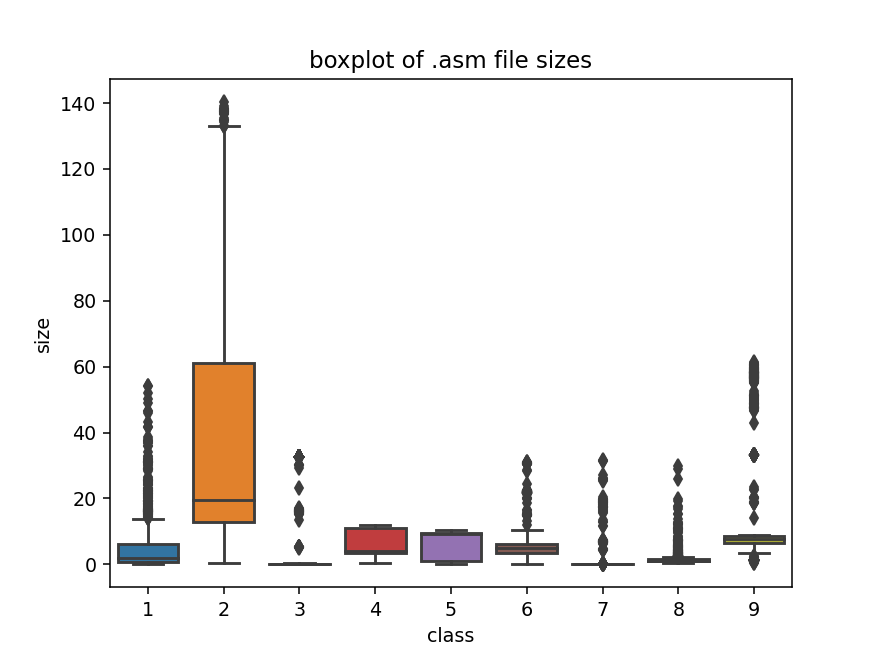

In [70]:
# Distribution of .asm file sizes
#boxplot of asm files

ax = sns.boxplot(x="class", y="size", data=asm_size)
plt.title("boxplot of .asm file sizes")
plt.show()

In [164]:
# add the file size feature to previous extracted asm features dataframe
print(dfasm.shape)
print(asm_size.shape)
result_asm = pd.merge(dfasm, asm_size.drop(['class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
2  05EeG39MTRrI6VY21DPd       17   11119      0      323    1047      0   
3  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   
4  0AnoOZDNbPXIr2MRBSCJ       19   12773      0      230    3160      0   

   .rdata:  .edata:  .rsrc:  ...    esi    eax    ebx   ecx  edi  ebp  esp  \
0      323        0       3  ...     66     15     43    83    0   17   48   
1        0        0       3  ...   5013   3960   6382   717    0   27    0   
2     3385        0       3  ...   1378    610    446   732    0   20   45   
3        0        0       3  ...  15495  16570  28503  2825    0   87    0   
4      639        0       3  ...   1558   1250    930   851    0   14    0   

   eip  class  asm_file_size  
0   29      1       0.078190  
1   88      1       4.243397  
2   85      1       0.935457  
3  491      1      12.703107  
4   66      1       0.891982  

[5 rows x 54 columns]

In [165]:
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  04EjIdbPV5e1XroFOpiN  0.107345  0.088779    0.0  0.002091  0.001493    0.0   
2  05EeG39MTRrI6VY21DPd  0.096045  0.016323    0.0  0.001935  0.000416    0.0   
3  05rJTUWYAKNegBk2wE8X  0.107345  0.305416    0.0  0.010459  0.007652    0.0   
4  0AnoOZDNbPXIr2MRBSCJ  0.107345  0.018751    0.0  0.001378  0.001255    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.056642  0.079584  0.053384  0.009134   
2  0.000882      0.0  0.000072  ...  0.015570  0.012259  0.003731  0.009325   
3  0.000000      0.0  0.000072  ...  0.175079  0.333005  0.238421  0.035988   
4  0.000166      0.0  0.000072  ...  0.017604  0.025121  0.007779  0.010841   

   edi       ebp       esp       eip  class  asm_file_size  
0  0.0  0.030797  0.001468  0.003173      1       0.000432  
1  0.0  0.048913  0.000000  0.009629      1       0.030139  
2  0.0  0.036232  0.001376  0.009301      1       0.006546  
3  0.0  0.157609  0.000000  0.053726      1       0.090474  
4  0.0  0.025362  0.000000  0.007222      1       0.006236  

[5 rows x 54 columns]

In [166]:
unigram_asm=dfasm
asm_file_size=asm_size

unigram_asm_feature_with_size=pd.merge(asm_file_size, unigram_asm.drop(columns=["class"]),on='ID', how='left')

unigram_asm_feature_with_size.to_csv("featurization/unigram_asm_feature_with_size.csv", index=False)

unigram_asm_feature_with_size.head()

ID  asm_file_size  class  HEADER:  .text:  .Pav:  \
0  01azqd4InC7m9JpocGv5      56.229886      9       18   22430      0   
1  01IsoiSMh5gxyDYTl4CB      13.999378      2        0  109939      0   
2  01jsnpXSAlgw6aPeDxrU       8.507785      9       18   68883      0   
3  01kcPWA9K2BOxQeS5Rju       0.078190      1       19     744      0   
4  01SuzwMJEIXsK7A8dQbl       0.996723      8       18   10368      0   

   .idata:   .data:  .bss:  .rdata:  ...  :dword  edx   esi   eax   ebx  ecx  \
0     1158  1366754      0     1794  ...    4371  808  2290  1281   587  701   
1      616    24568      0    26405  ...    1446  260  1090   391   905  420   
2      304      662      0     1093  ...     903    5   547     5   451   56   
3      127       57      0      323  ...     137   18    66    15    43   83   
4      206     4595     92        0  ...    1220   18  1228    24  1546  107   

   edi  ebp  esp  eip  
0    0   15   14  456  
1    0   24   22  227  
2    0   27    0  117  
3    0   17   48   29  
4    0   15    0   76  

[5 rows x 54 columns]

# Univariate analysis ONLY on .asm file features

<IPython.core.display.Javascript object>


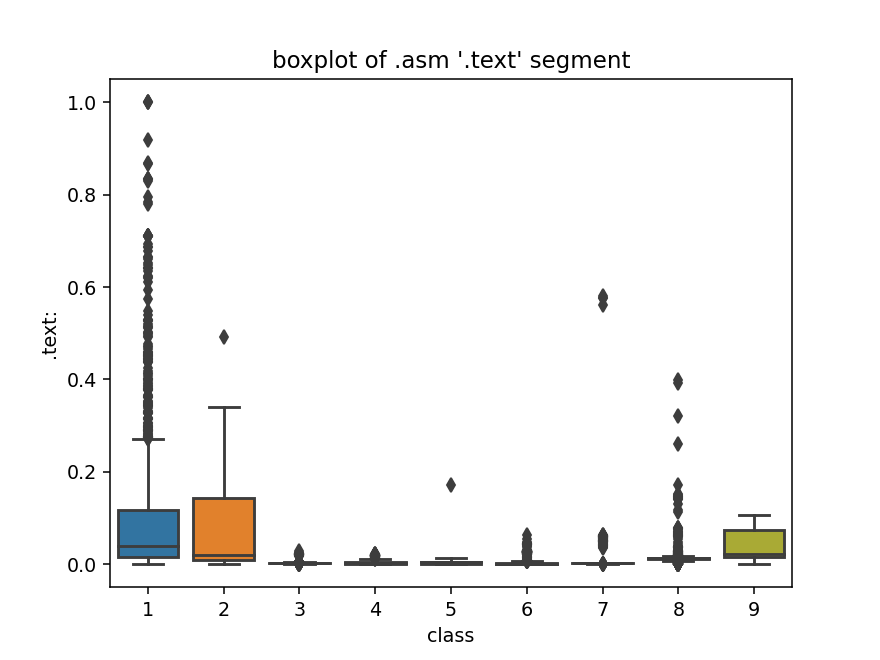

In [71]:
sns.boxplot(x="class", y=".text:", data=result_asm)
plt.title("boxplot of .asm '.text' segment")
plt.show()

<h4>Note:</h4>

> 1.The plot is between Text and class.<br>
> 2.Class 1,2 and 9 can be easly separated.

<IPython.core.display.Javascript object>


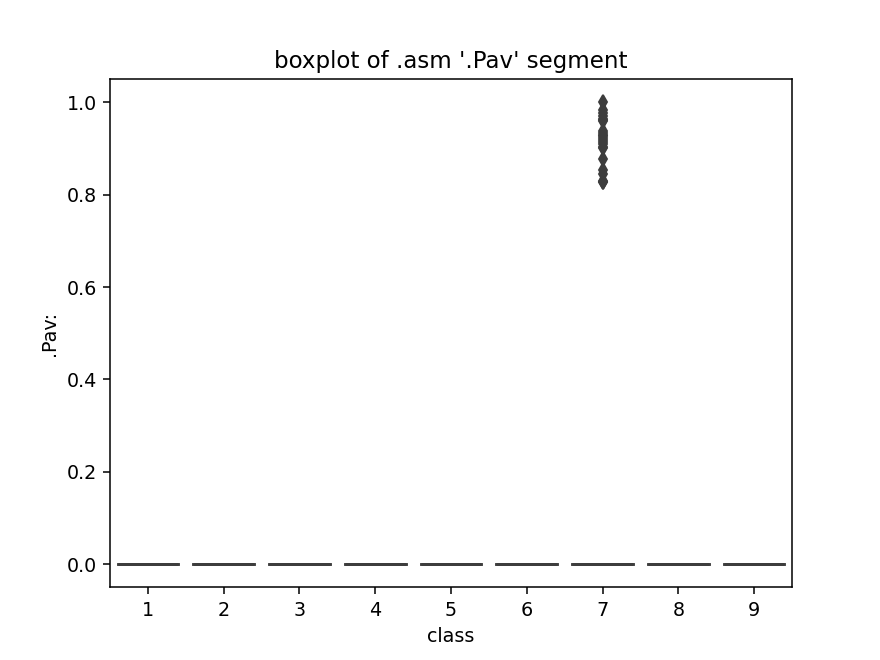

In [60]:
ax = sns.boxplot(x="class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm '.Pav' segment")
plt.show()

<IPython.core.display.Javascript object>


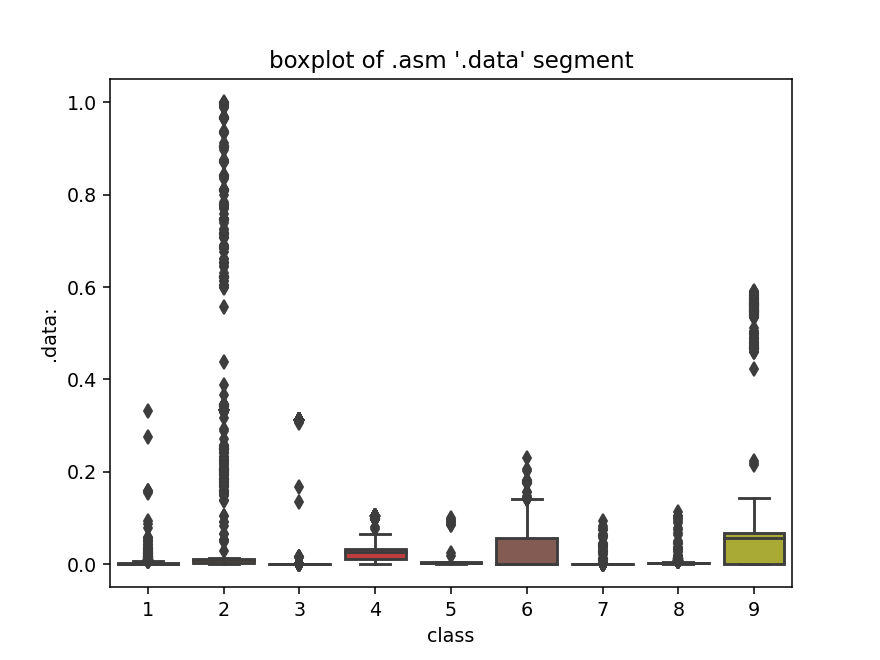

In [72]:
ax = sns.boxplot(x="class", y=".data:", data=result_asm)
plt.title("boxplot of .asm '.data' segment")
plt.show()

<h4>Note:</h4>

> 1.The plot is between data segment and class label.<br>
> 2.Class 6 and 9 can be easily separated from given points.

<IPython.core.display.Javascript object>


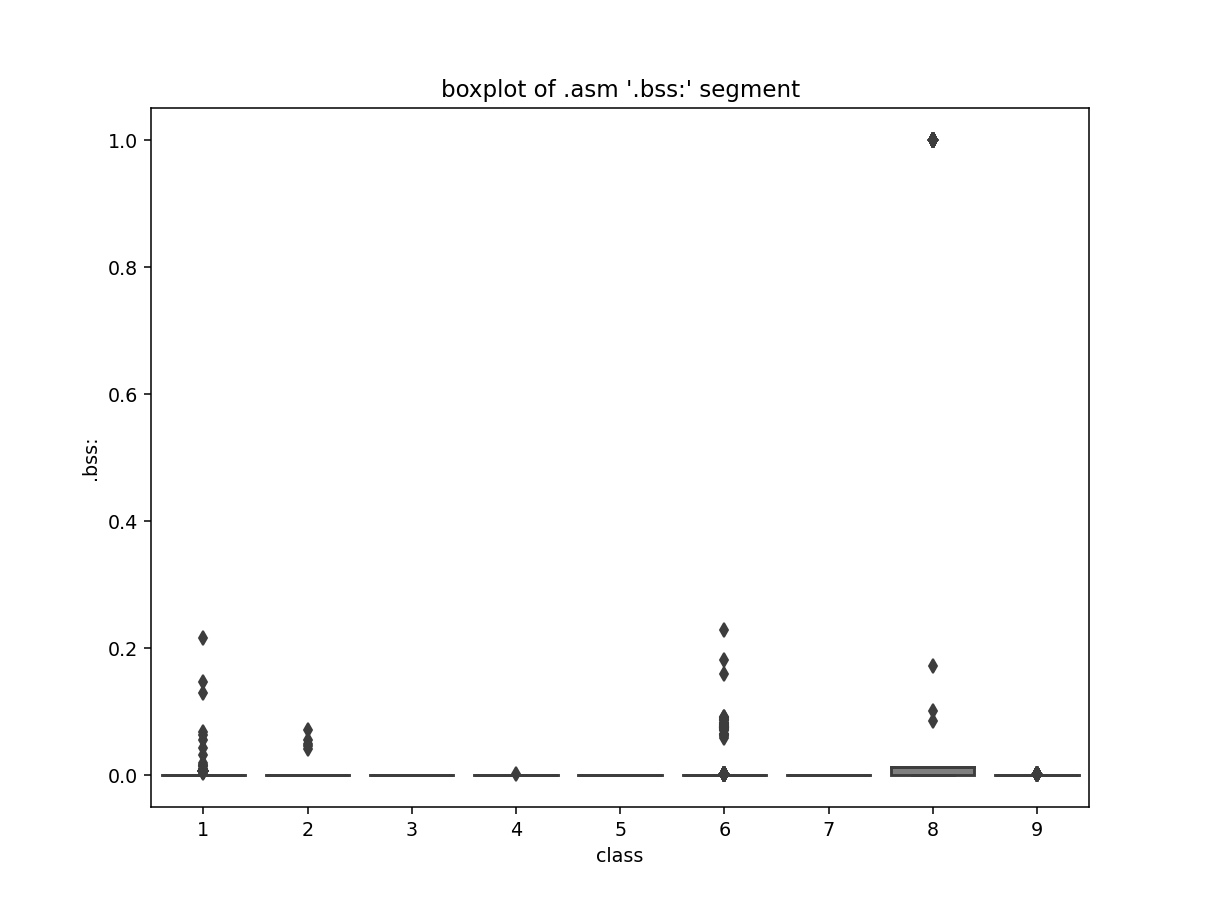

In [73]:
ax = sns.boxplot(x="class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm '.bss:' segment")
plt.show()

<h4>Note:</h4>

> 1.Plot between bss segment and class label.<br>
> 2.Very less number of files are having bss segment

<IPython.core.display.Javascript object>


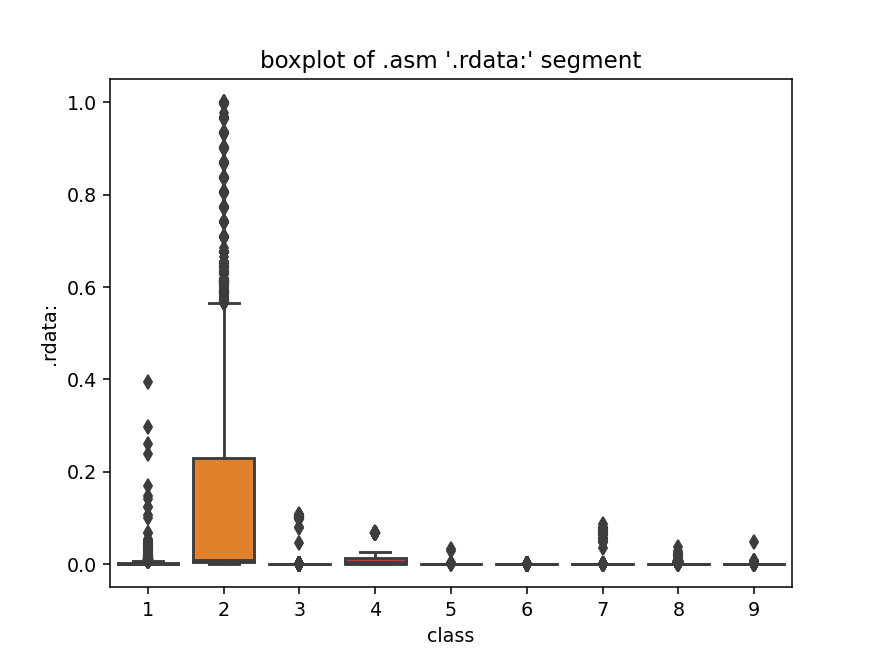

In [74]:
ax = sns.boxplot(x="class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm '.rdata:' segment")
plt.show()

<h4>Note:</h4>

> 1.Plot between rdata segment and Class segment.<br>
> 2.Class 2 can be easily separated 75 pecentile files are having 1M rdata lines.

<IPython.core.display.Javascript object>


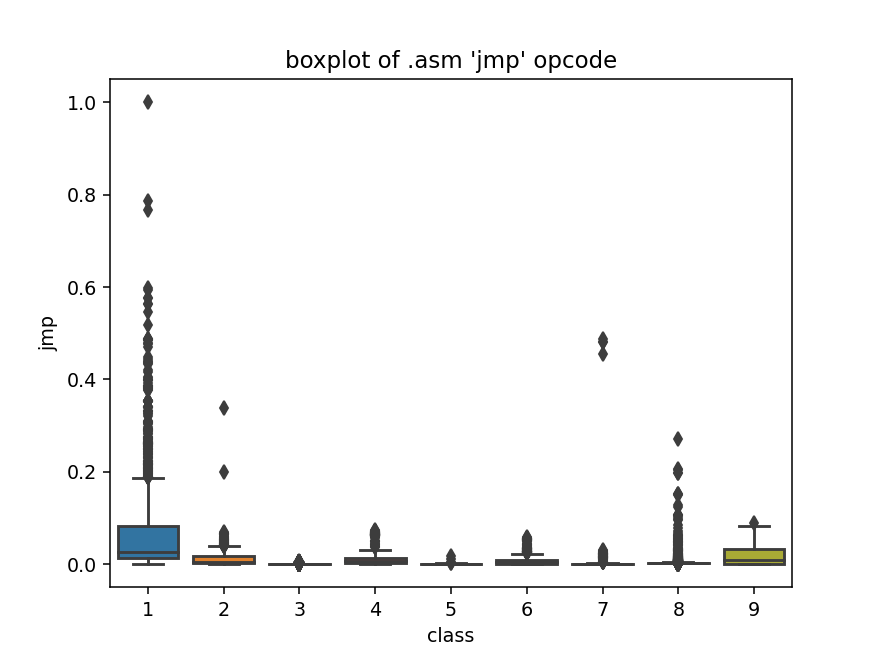

In [75]:
ax = sns.boxplot(x="class", y="jmp", data=result_asm)
plt.title("boxplot of .asm 'jmp' opcode")
plt.show()

<h4>Note:</h4>

> 1.Plot between jmp and Class label.<br>
> 2.Class 1 is having frequency of 2000 approx in 75 perentile of files.

<IPython.core.display.Javascript object>


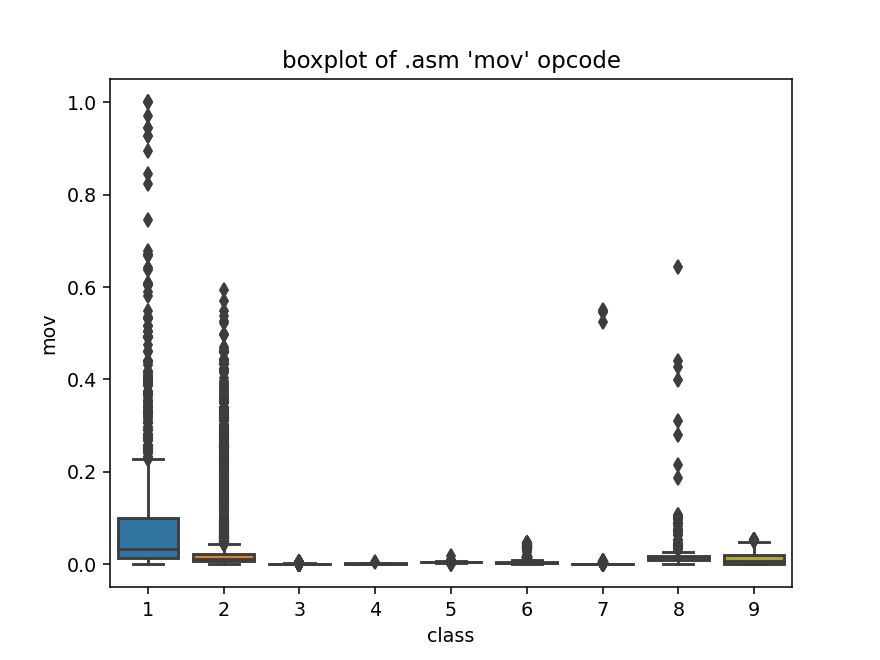

In [76]:
ax = sns.boxplot(x="class", y="mov", data=result_asm)
plt.title("boxplot of .asm 'mov' opcode")
plt.show()

# Note:
# plot between Class label and mov opcode
# Class 1 is having frequency of 2000 approx in 75 perentile of files

<h4>Note:</h4>

> 1.Plot between class label and mov opcode.<br>
> 2.Class 1 is having frequency of 2000 approx in 75 perentile of files.

<IPython.core.display.Javascript object>


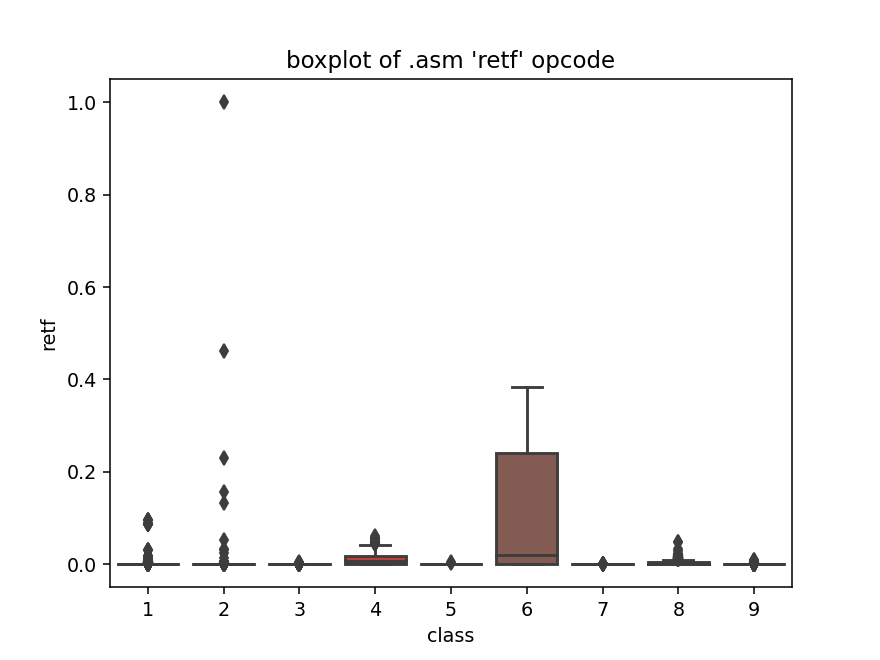

In [77]:
ax = sns.boxplot(x="class", y="retf", data=result_asm)
plt.title("boxplot of .asm 'retf' opcode")
plt.show()

<h4>Note:</h4>

> 1.Plot between Class label and retf.<br>
> 2.Class 6 can be easily separated with opcode retf.<br>
> 3.The frequency of retf is approx of 250.

<IPython.core.display.Javascript object>


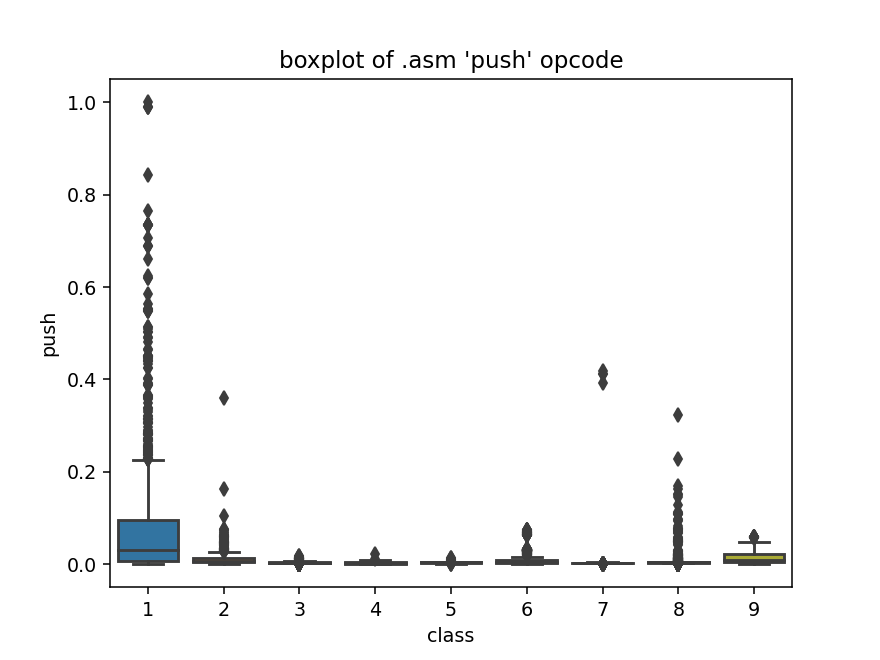

In [78]:
ax = sns.boxplot(x="class", y="push", data=result_asm)
plt.title("boxplot of .asm 'push' opcode")
plt.show()

<h4>Note:</h4>

> 1.Plot between push opcode and Class label.<br>
> 2.Class 1 is having 75 precentile files with push opcodes of frequency 1000.

# Multivariate Analysis ONLY on .asm file features

<IPython.core.display.Javascript object>


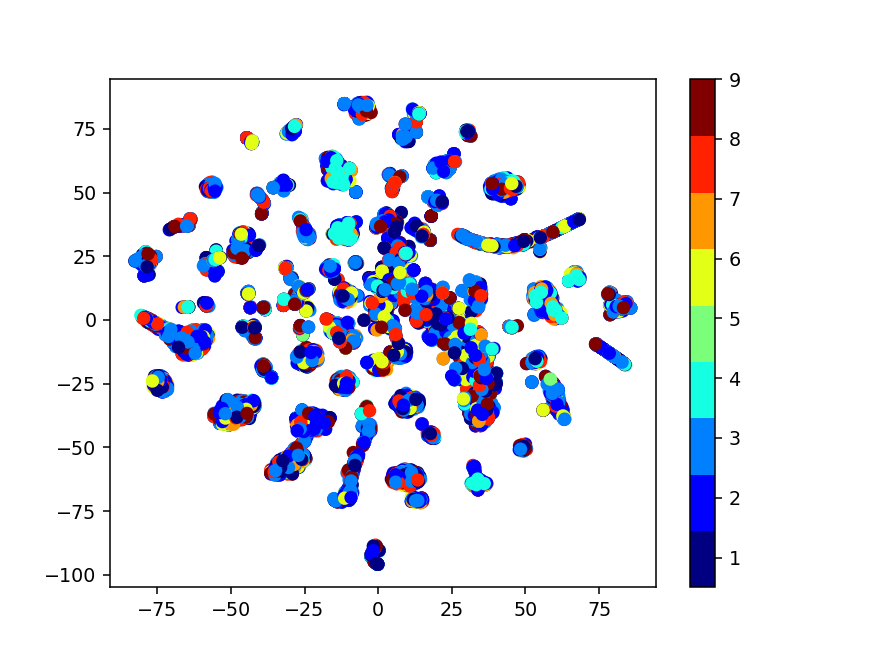

In [82]:
#multivariate analysis on asm files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','class'], axis=1).fillna(0))

vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


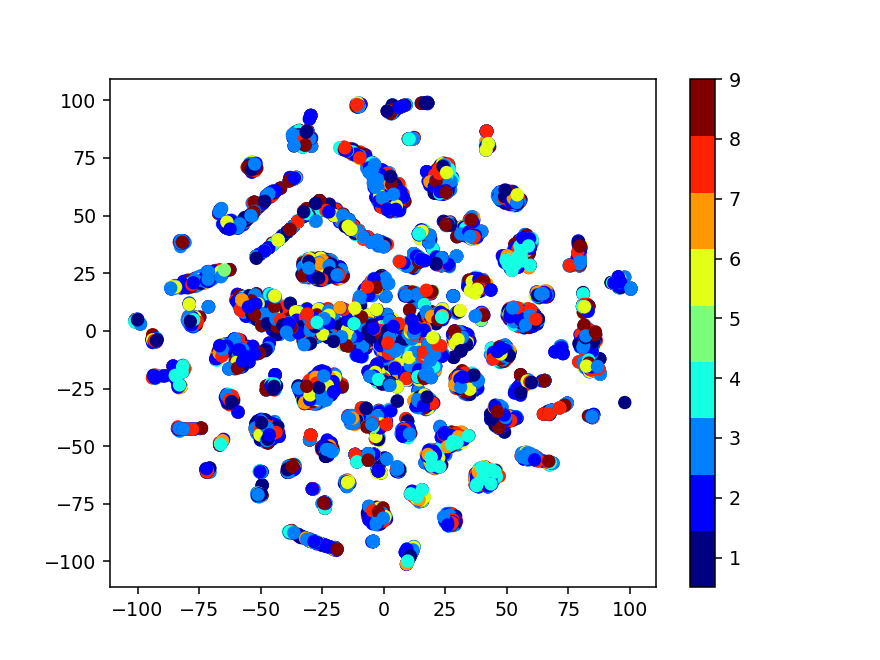

In [83]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Conclusion on EDA ( ONLY on .asm file features)

<h6>1.We have taken only 52 features from asm files (after reading through many blogs and research papers)<br></h6>
<h6>2.The univariate analysis was done only on few important features.<br></h6>

<h6>3.Take-aways:<br></h6>

>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less.<br>
>2. Each feature has its unique importance in separating the Class labels.

# Train and test split ( ONLY on .asm file featues )

In [19]:
asm_y = result_asm['class']
asm_x = result_asm.drop(['ID','class','.BSS:','rtn','.CODE'], axis=1)

In [20]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

# K-Nearest Neigbors ONLY on .asm file features

log_loss for k =  1 is 0.09022664330168653
log_loss for k =  3 is 0.09948291983525755
log_loss for k =  5 is 0.1138514540748864
log_loss for k =  7 is 0.1281937053786501
log_loss for k =  9 is 0.13867615641251382
log_loss for k =  11 is 0.1464407812094683
log_loss for k =  13 is 0.155753089047674
log_loss for k =  15 is 0.16300662371521435
log_loss for k =  17 is 0.1695432532249539
log_loss for k =  19 is 0.17670664691926966


<IPython.core.display.Javascript object>


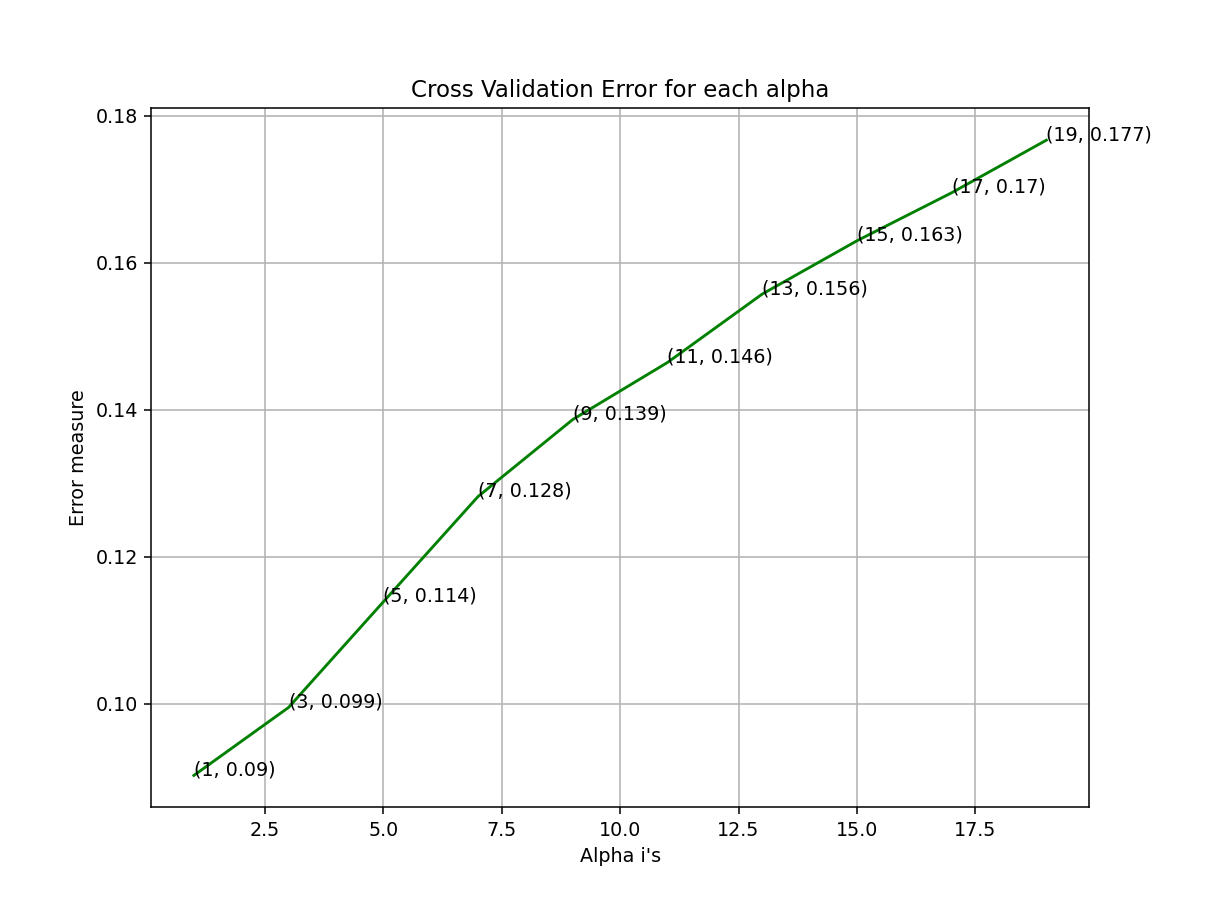

log loss for train data 0.022261226283403563
log loss for cv data 0.09022664330168653
log loss for test data 0.11117781353724558
Number of misclassified points  1.9779208831646733
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


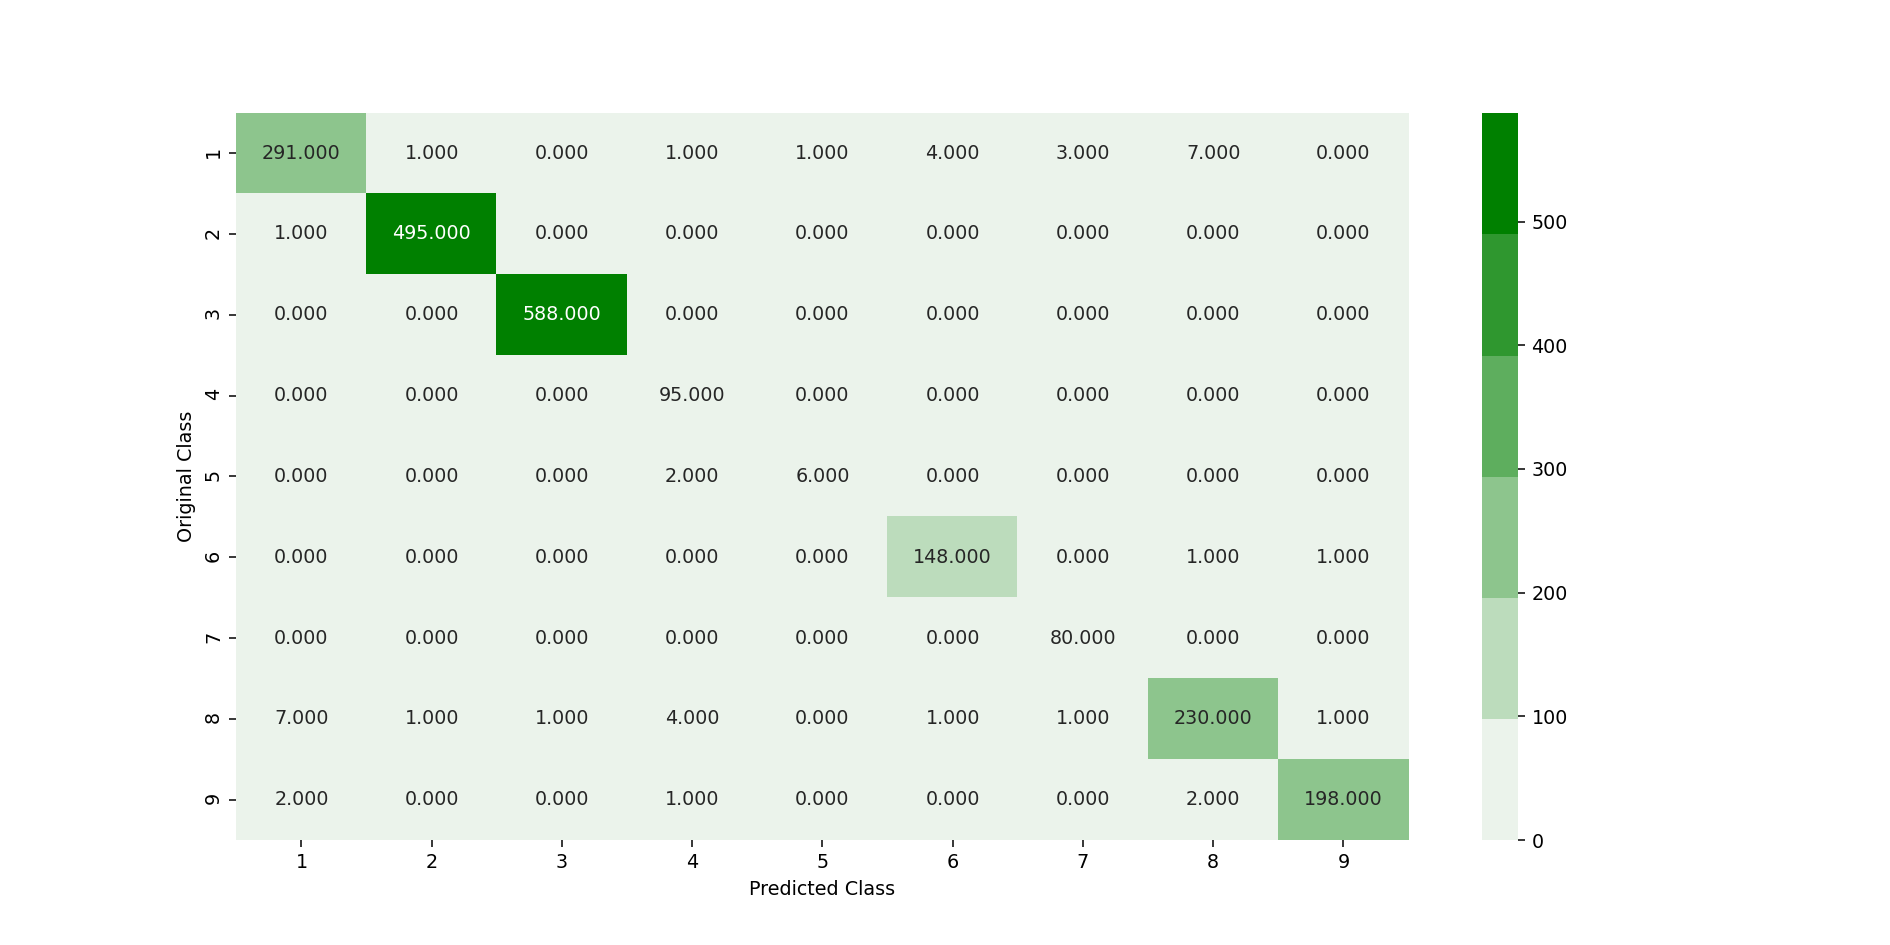

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


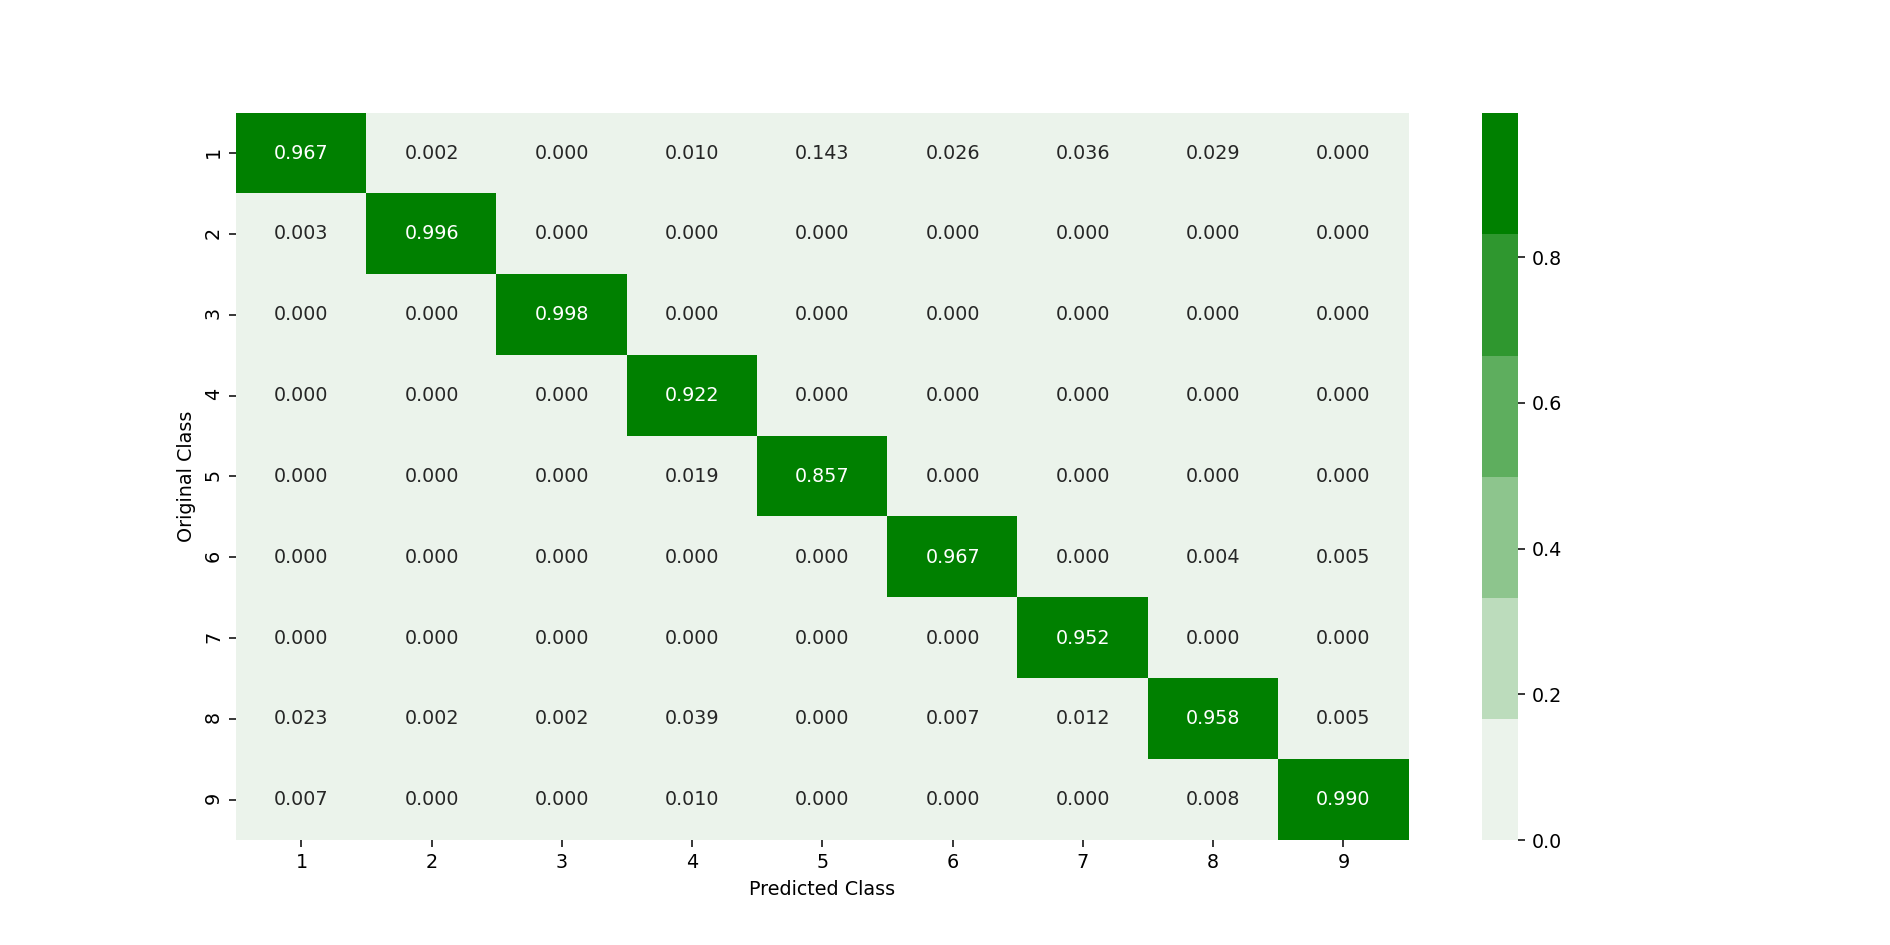

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


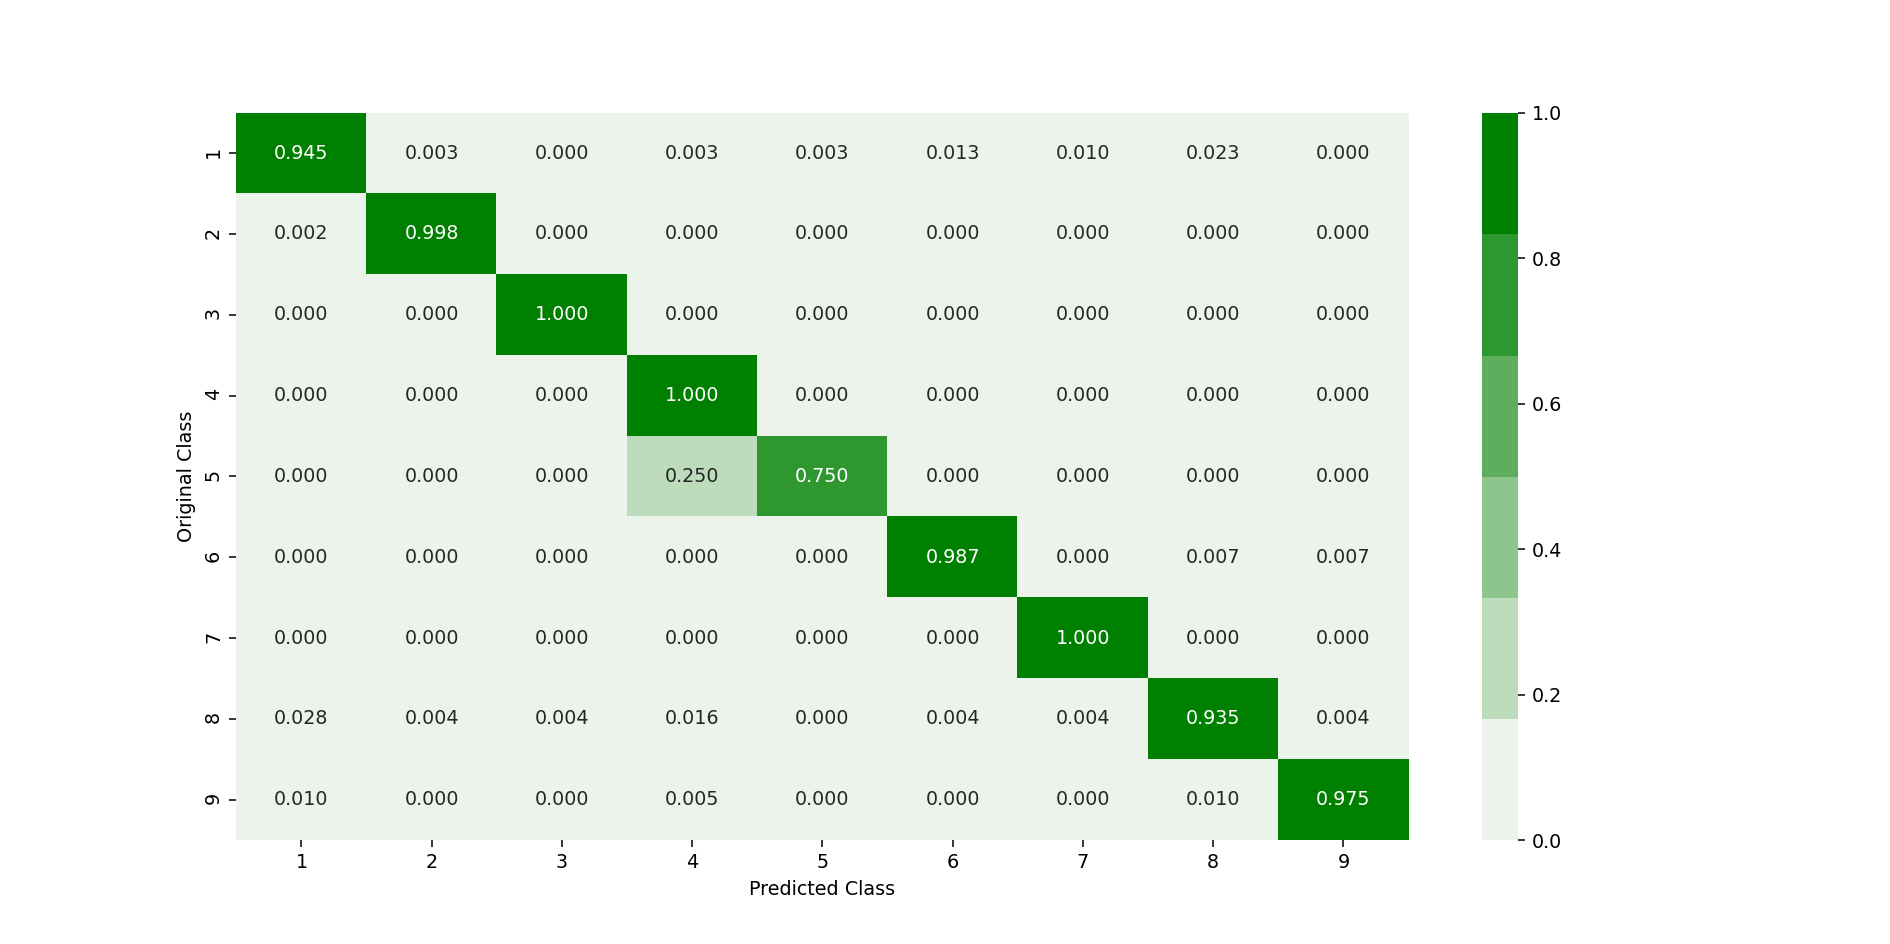

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_clf=KNeighborsClassifier(n_neighbors=i)
    k_clf.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_clf, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_clf.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_clf=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_clf.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_clf, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

# Logistic Regression ONLY on .asm file features

log_loss for c =  1e-05 is 1.2969556492052963
log_loss for c =  0.0001 is 1.2967296218316837
log_loss for c =  0.001 is 1.294080686099992
log_loss for c =  0.01 is 1.25918848415935
log_loss for c =  0.1 is 0.9989345100235796
log_loss for c =  1 is 1.1976492083262062
log_loss for c =  10 is 1.2471914087838323
log_loss for c =  100 is 1.1925877592607455
log_loss for c =  1000 is 1.187827139634931


<IPython.core.display.Javascript object>


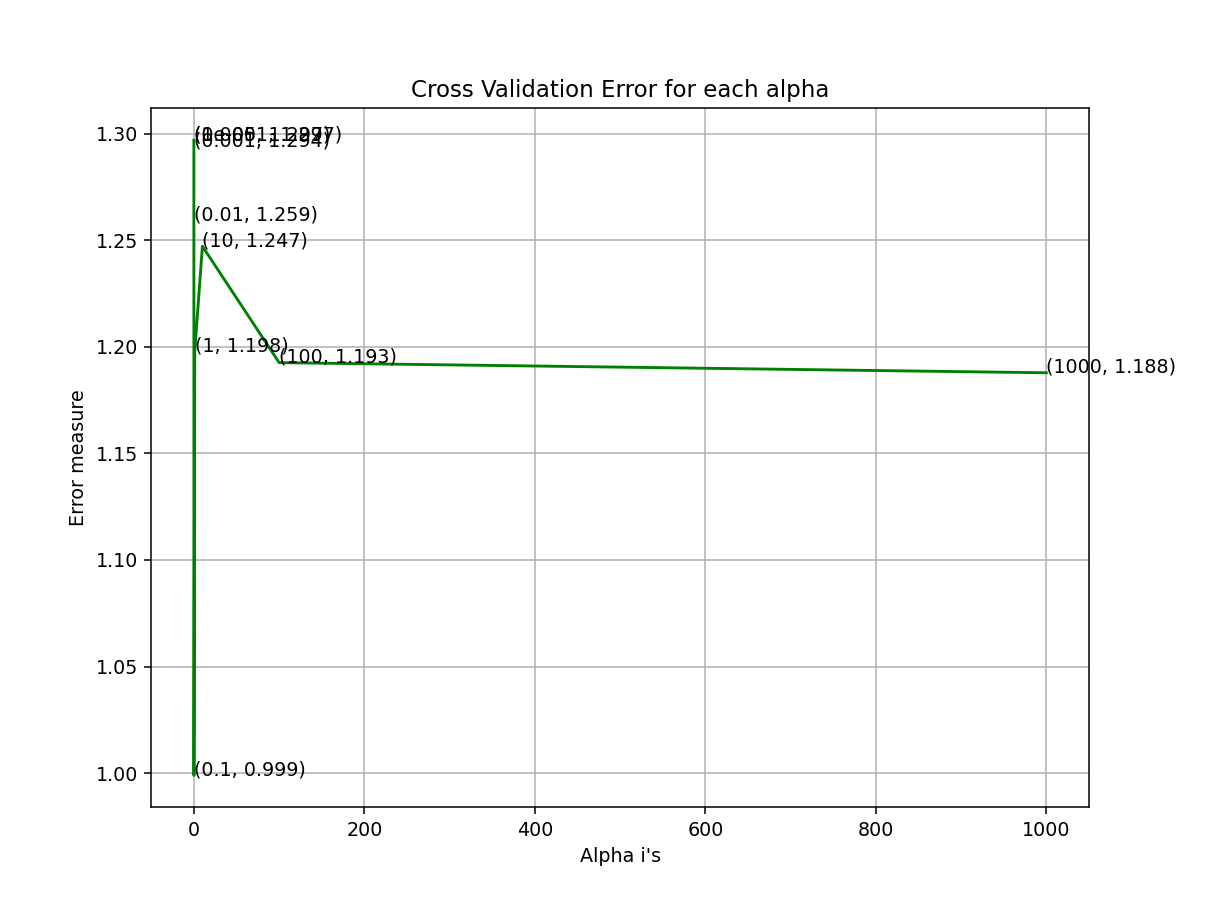

log loss for train data 0.9890629262395584
log loss for cv data 0.9989345100235796
log loss for test data 1.0170356860001328
Number of misclassified points  28.61085556577737
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


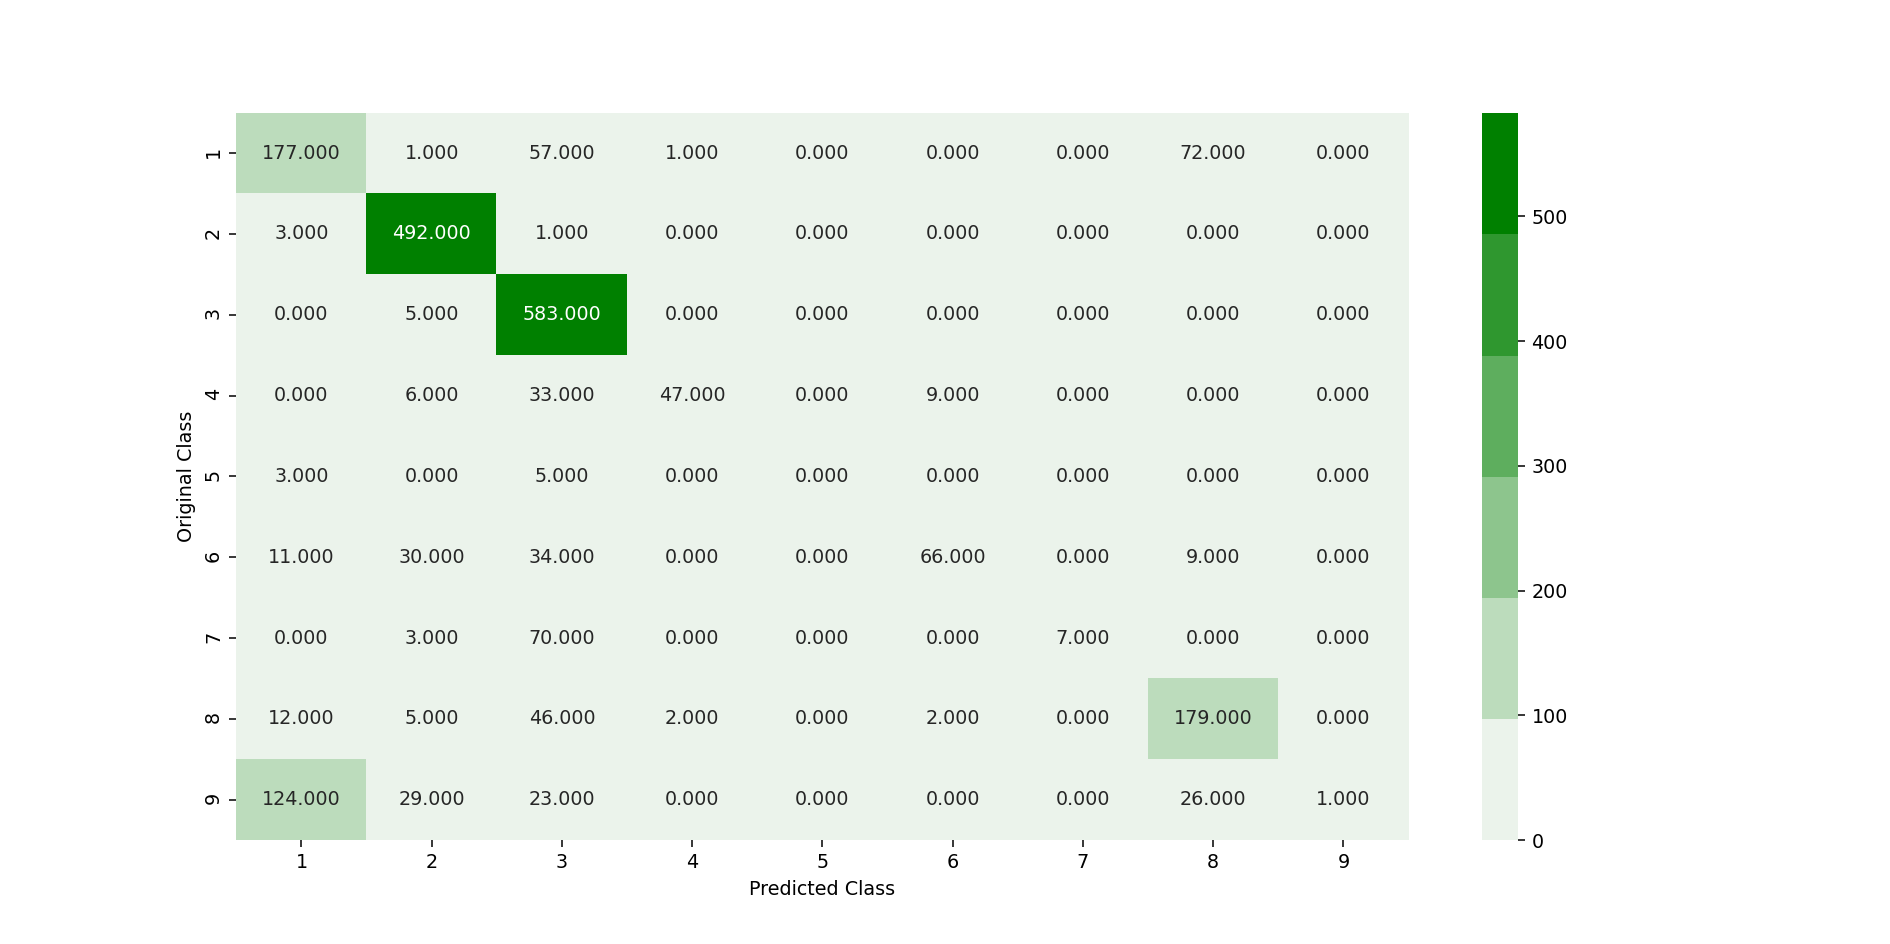

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


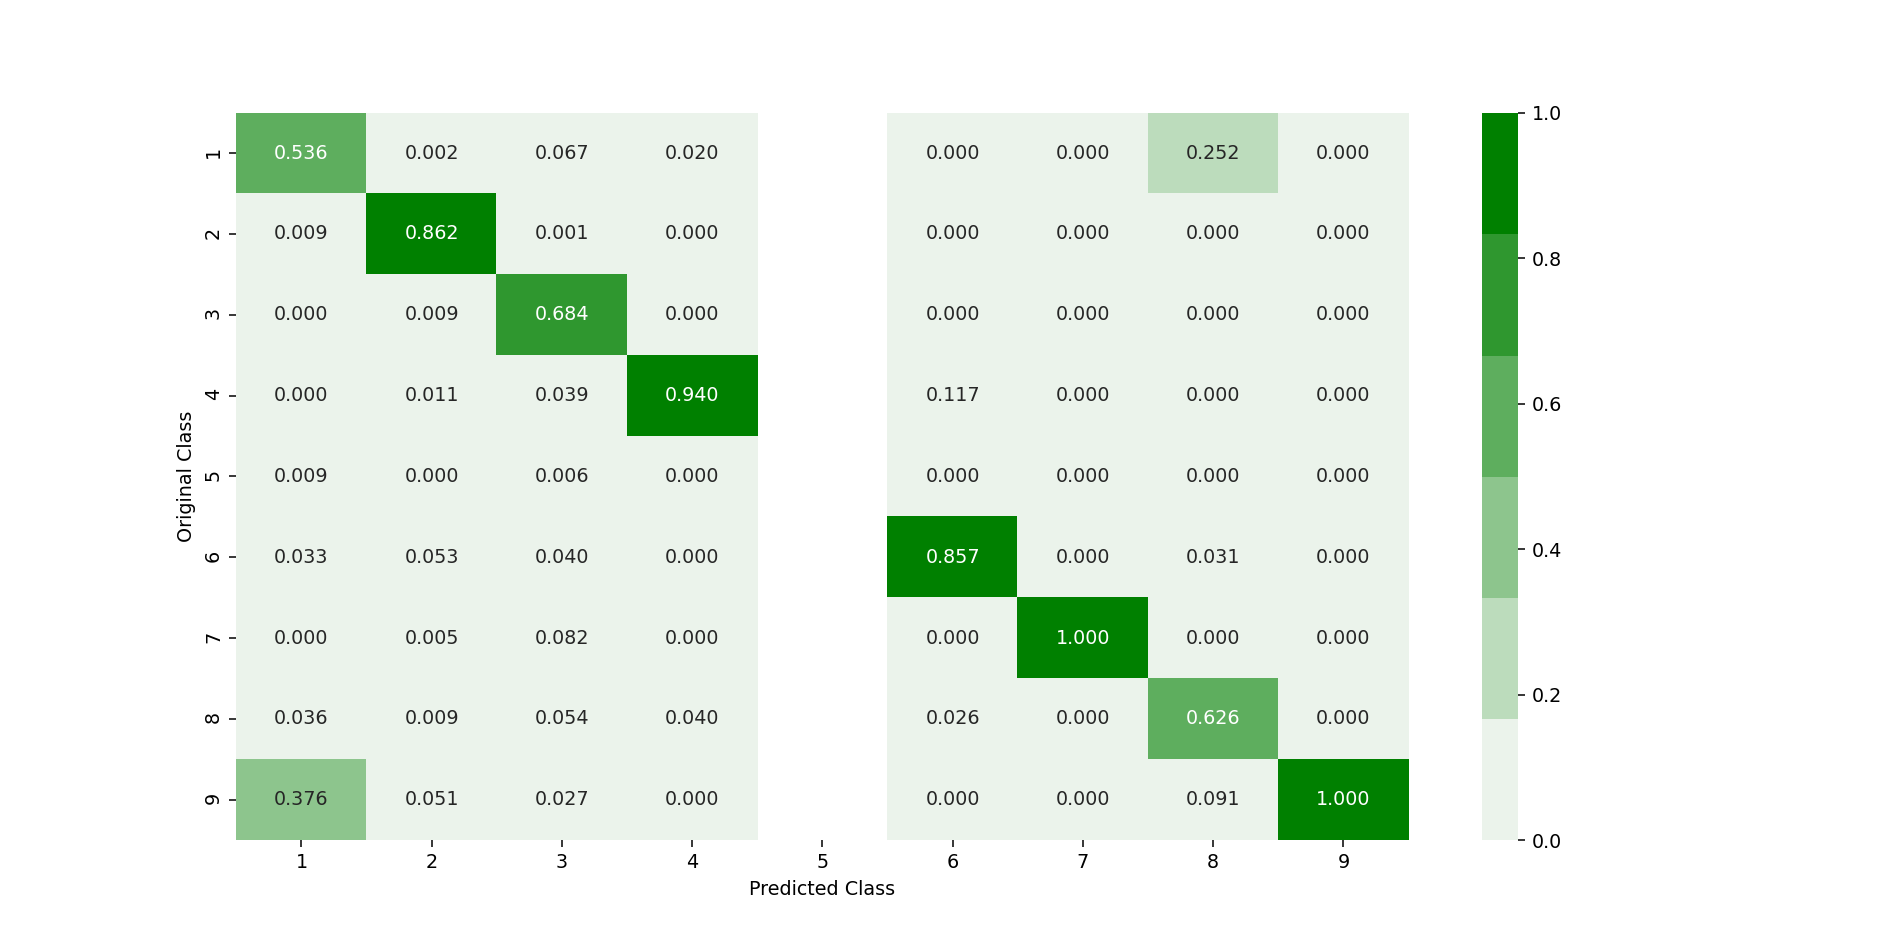

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


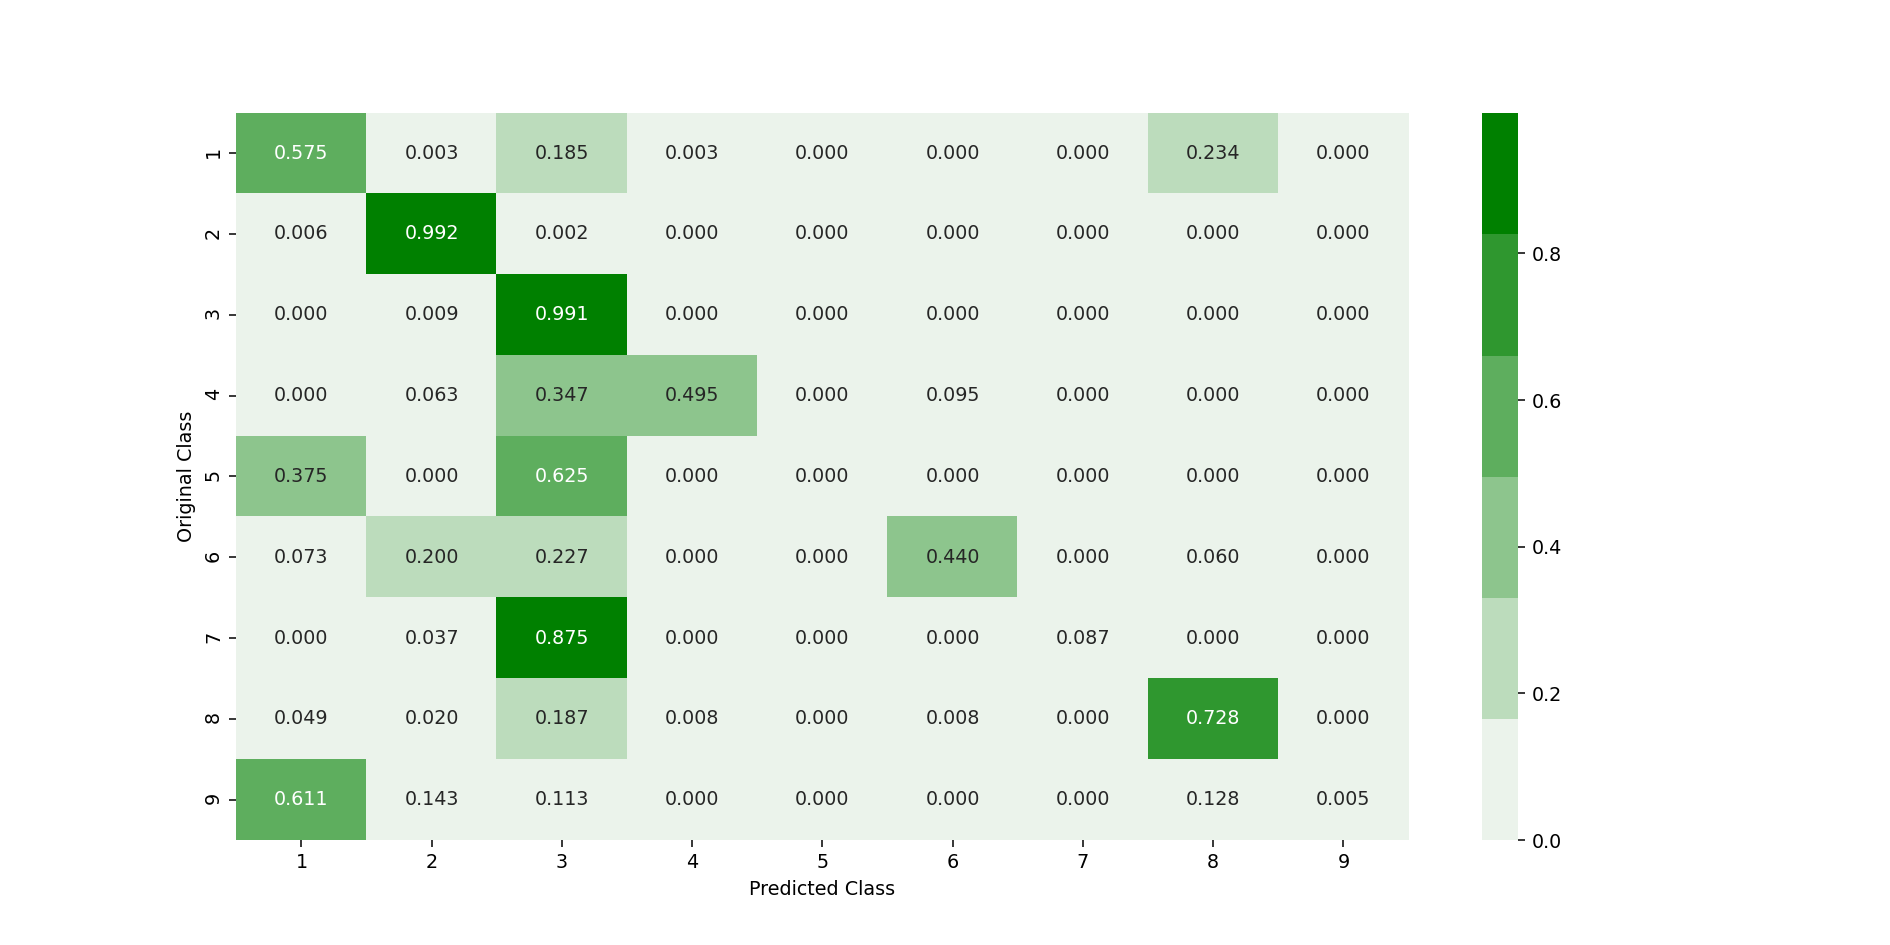

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

# Random Forest Classifier ONLY on .asm file features

log_loss for c =  10 is 0.038687460464779826
log_loss for c =  50 is 0.03777013756429926
log_loss for c =  100 is 0.038385904801814974
log_loss for c =  500 is 0.037407071186517864
log_loss for c =  1000 is 0.03747244390862345
log_loss for c =  2000 is 0.03720496400192323
log_loss for c =  3000 is 0.03721994945510065


<IPython.core.display.Javascript object>


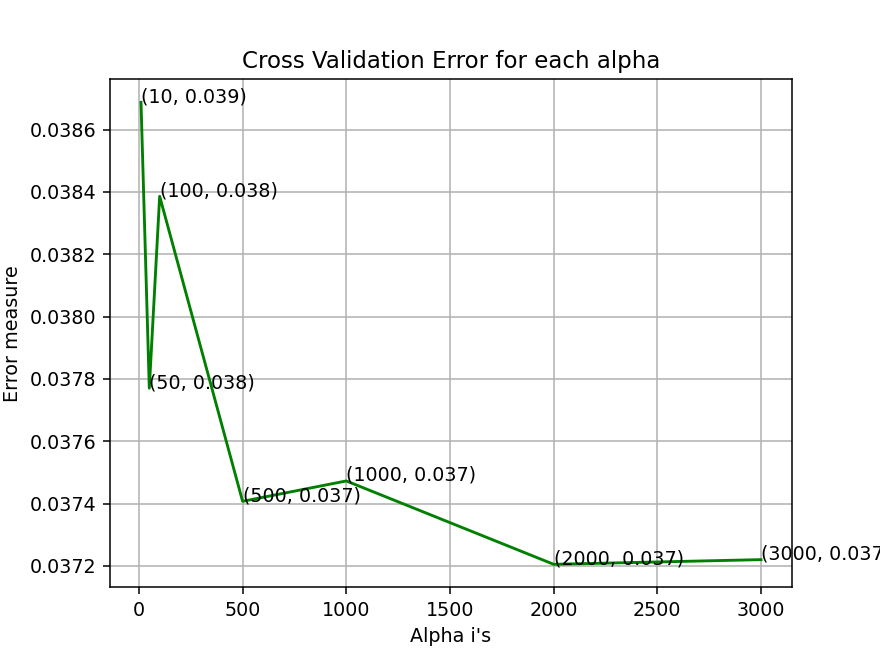

log loss for train data 0.013548896353704034
log loss for cv data 0.03720496400192323
log loss for test data 0.04543044621422409
Number of misclassified points  0.9199632014719411
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


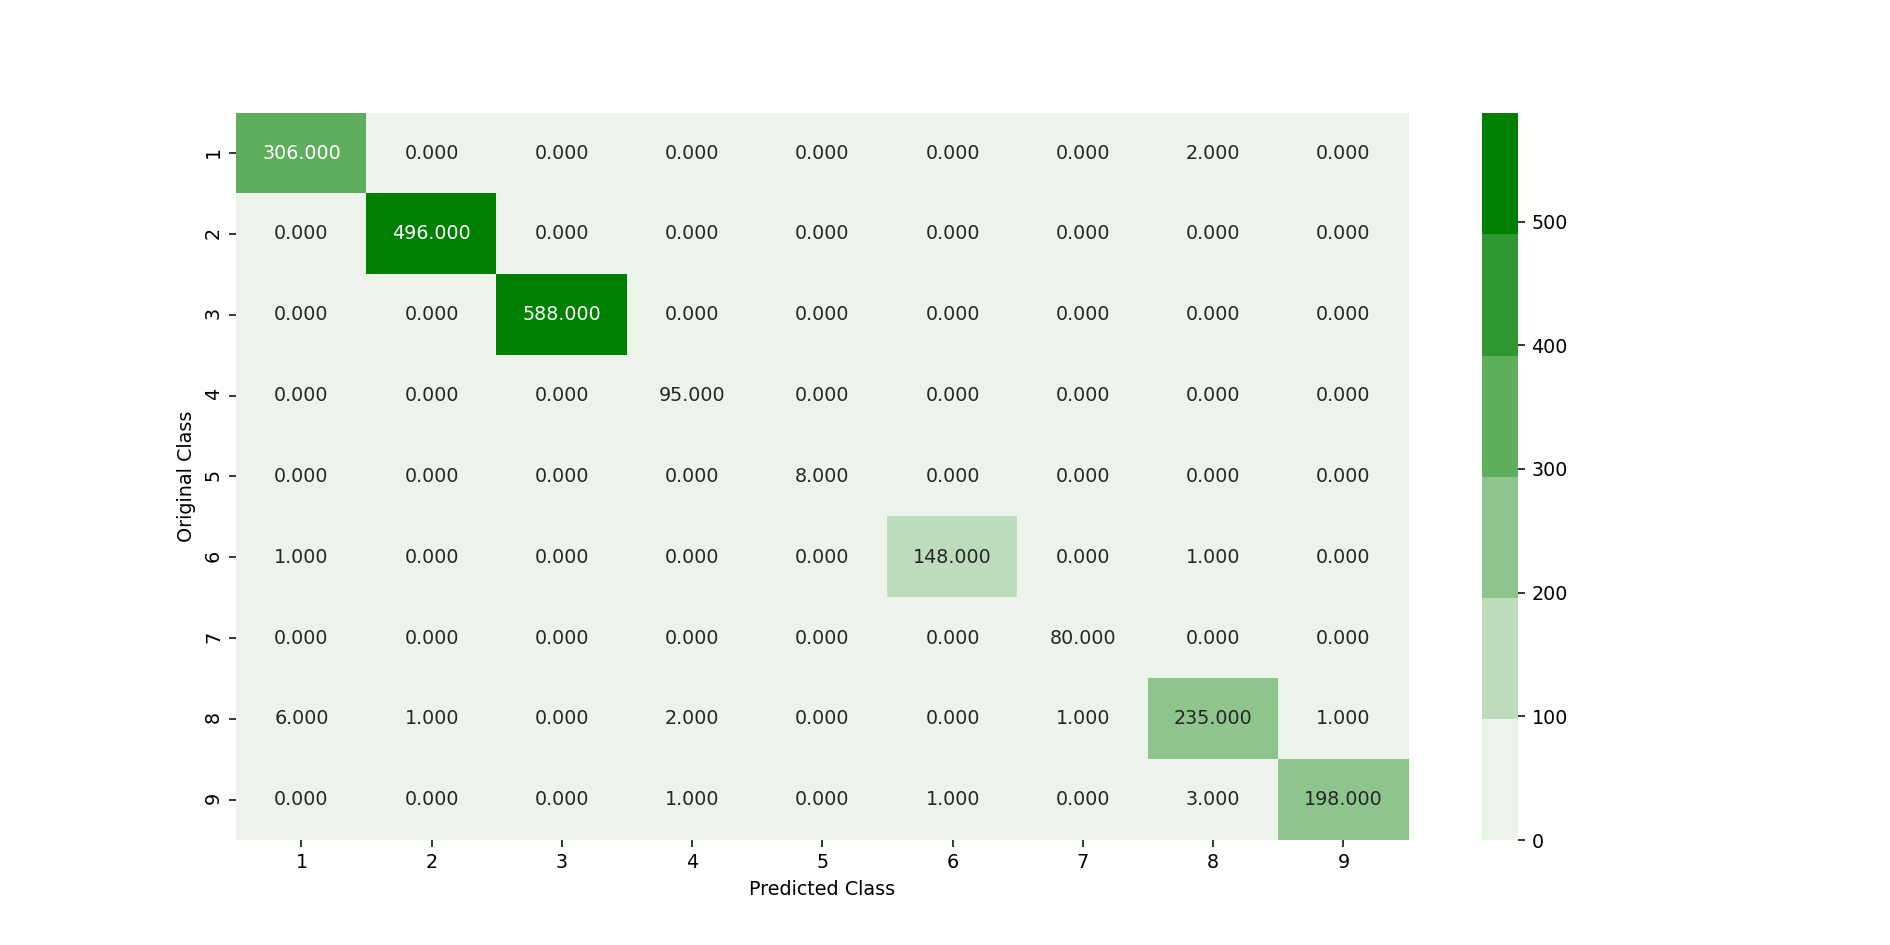

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


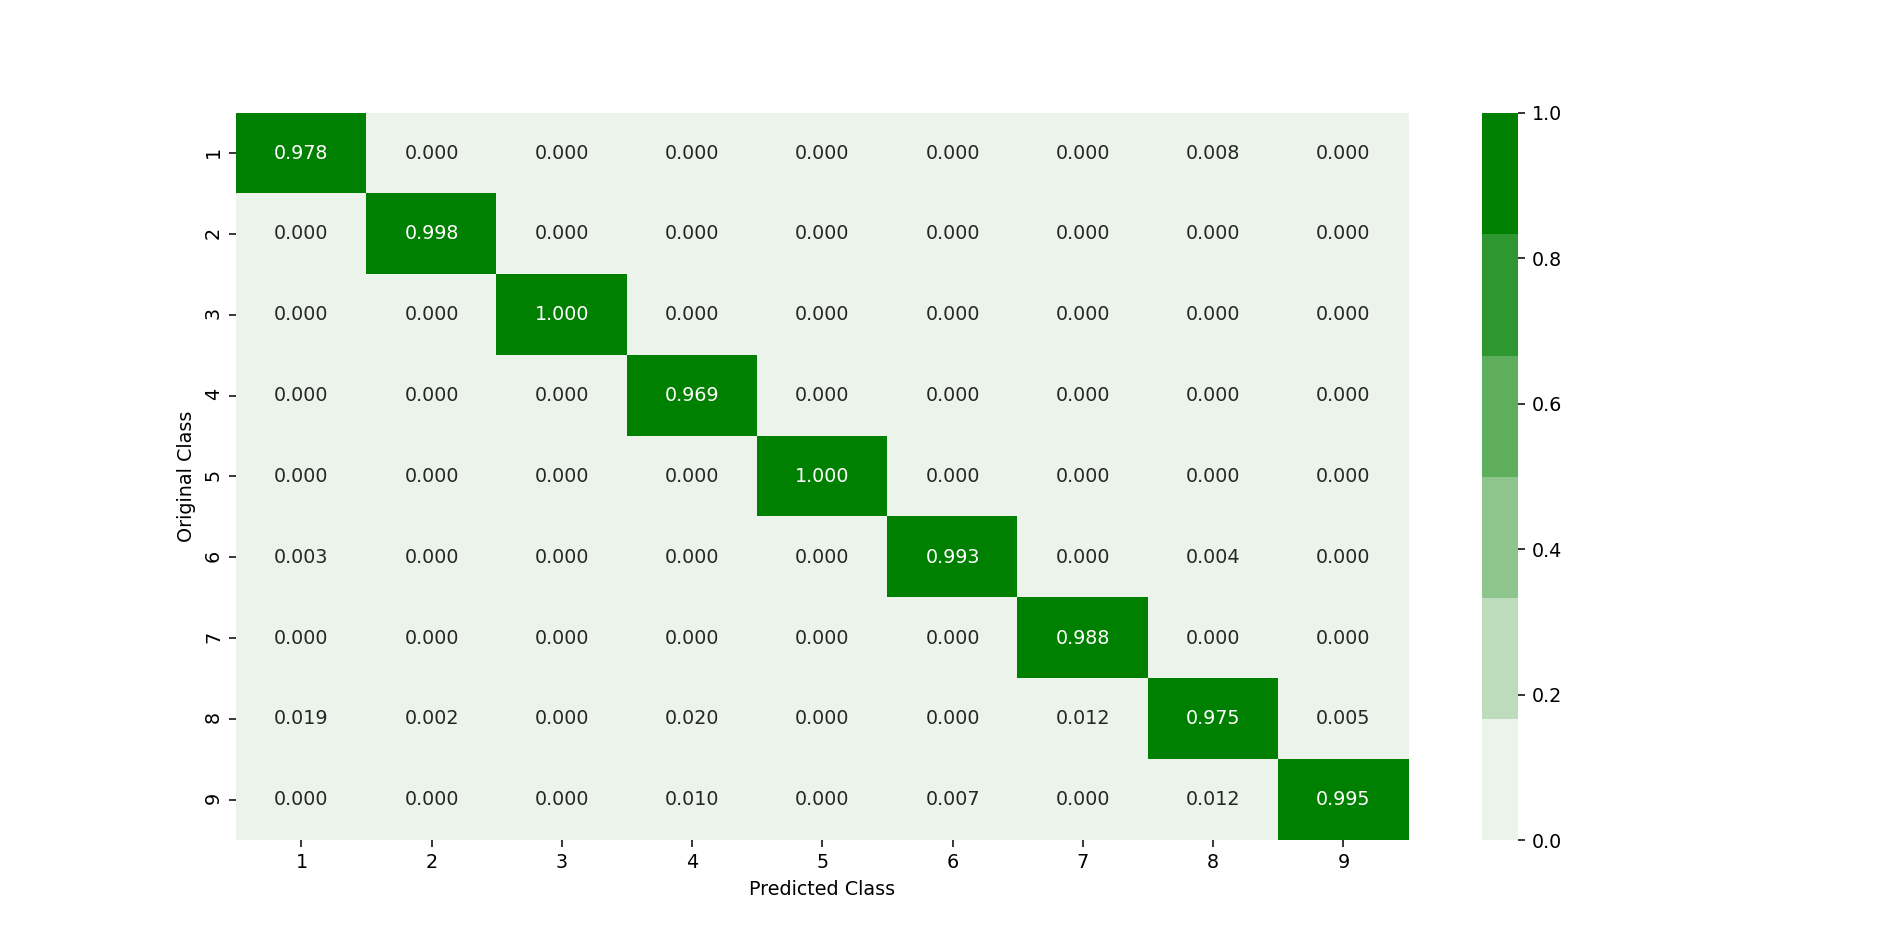

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


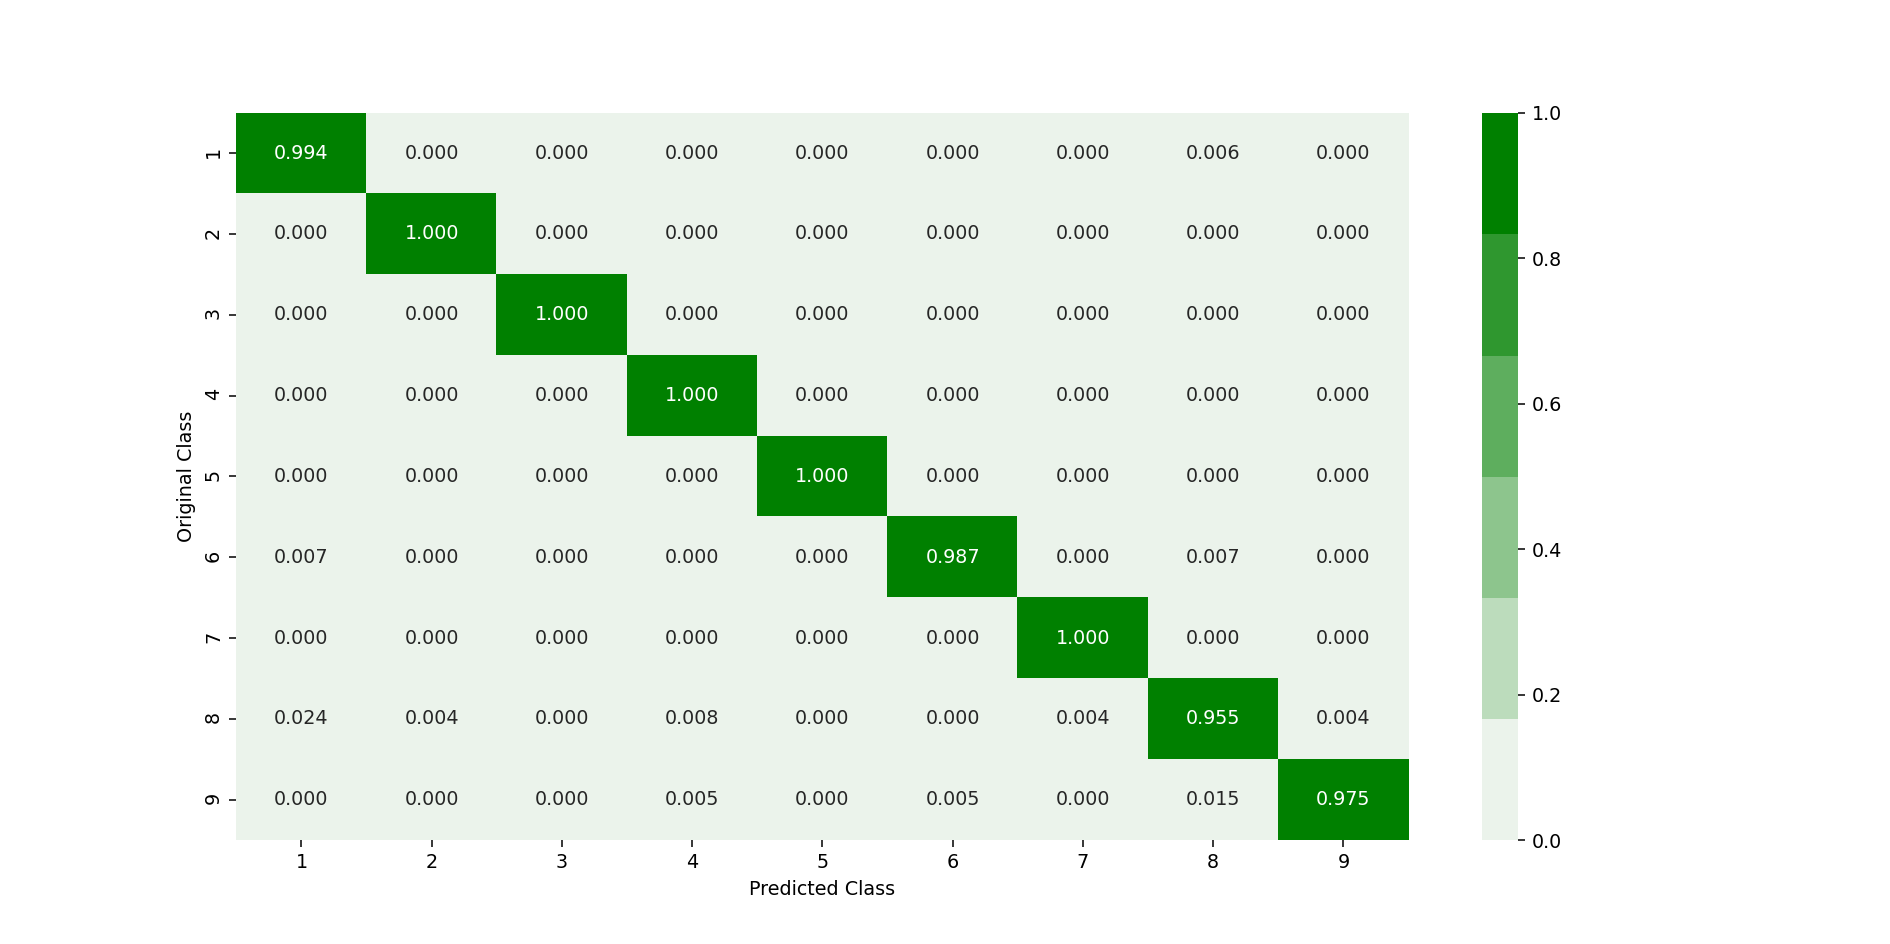

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_clf=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_clf.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_clf, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_clf.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_clf=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_clf.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_clf, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

# XgBoost Classifier ONLY on .asm file features

log_loss for c =  10 is 0.11087844169685986
log_loss for c =  50 is 0.049826411343179236
log_loss for c =  100 is 0.03626226596874917
log_loss for c =  500 is 0.03243372718064286
log_loss for c =  1000 is 0.032927460027434775
log_loss for c =  2000 is 0.03312862699274767
log_loss for c =  3000 is 0.0329745364841566


<IPython.core.display.Javascript object>


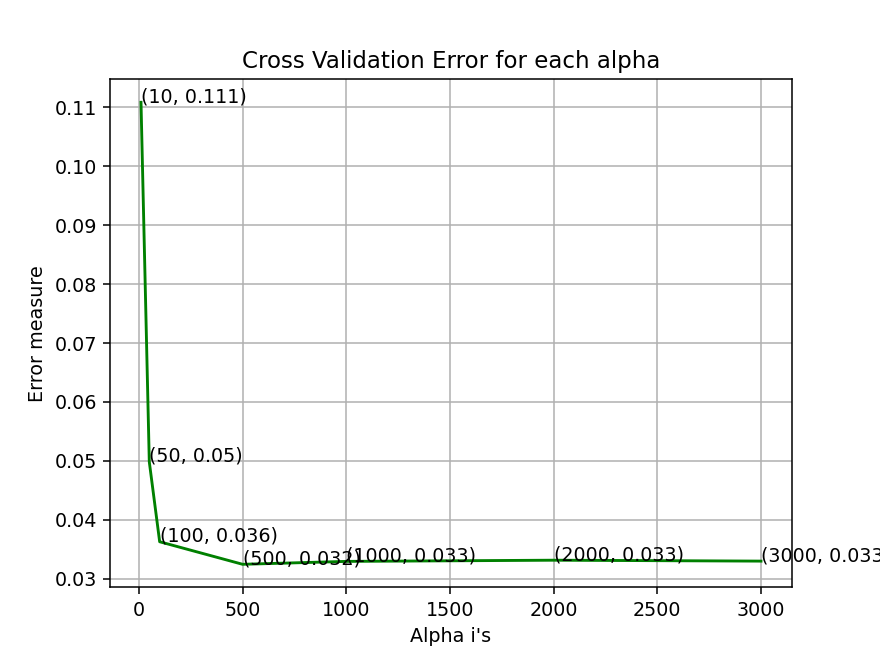

For values of best alpha =  500 The train log loss is: 0.011655158992273831
For values of best alpha =  500 The cross validation log loss is: 0.03243372718064286
For values of best alpha =  500 The test log loss is: 0.03832197115503092
Number of misclassified points  0.6439742410303588
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


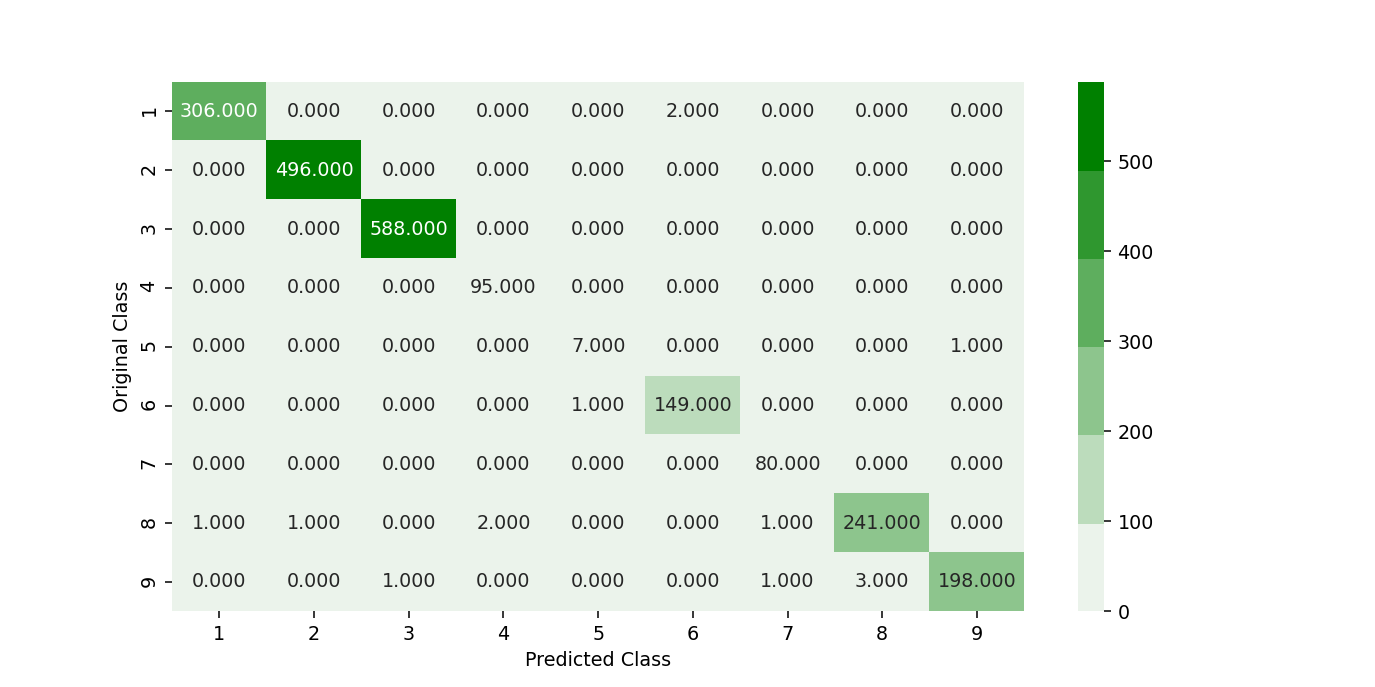

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


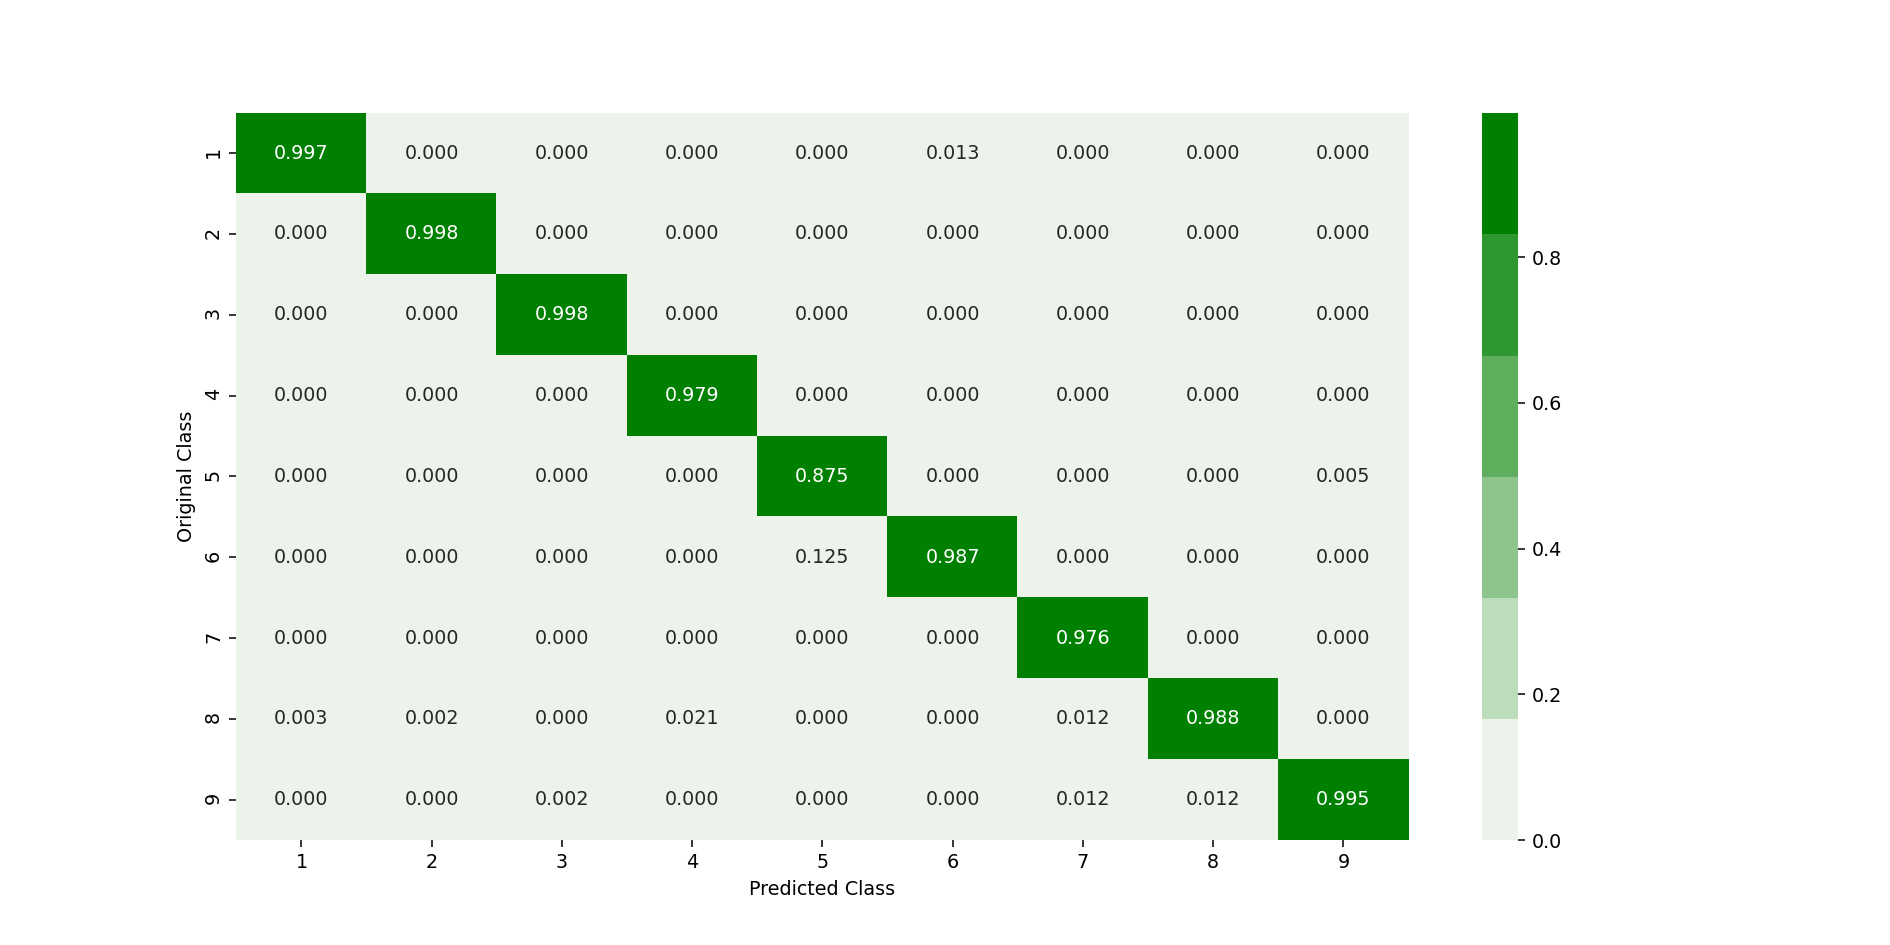

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


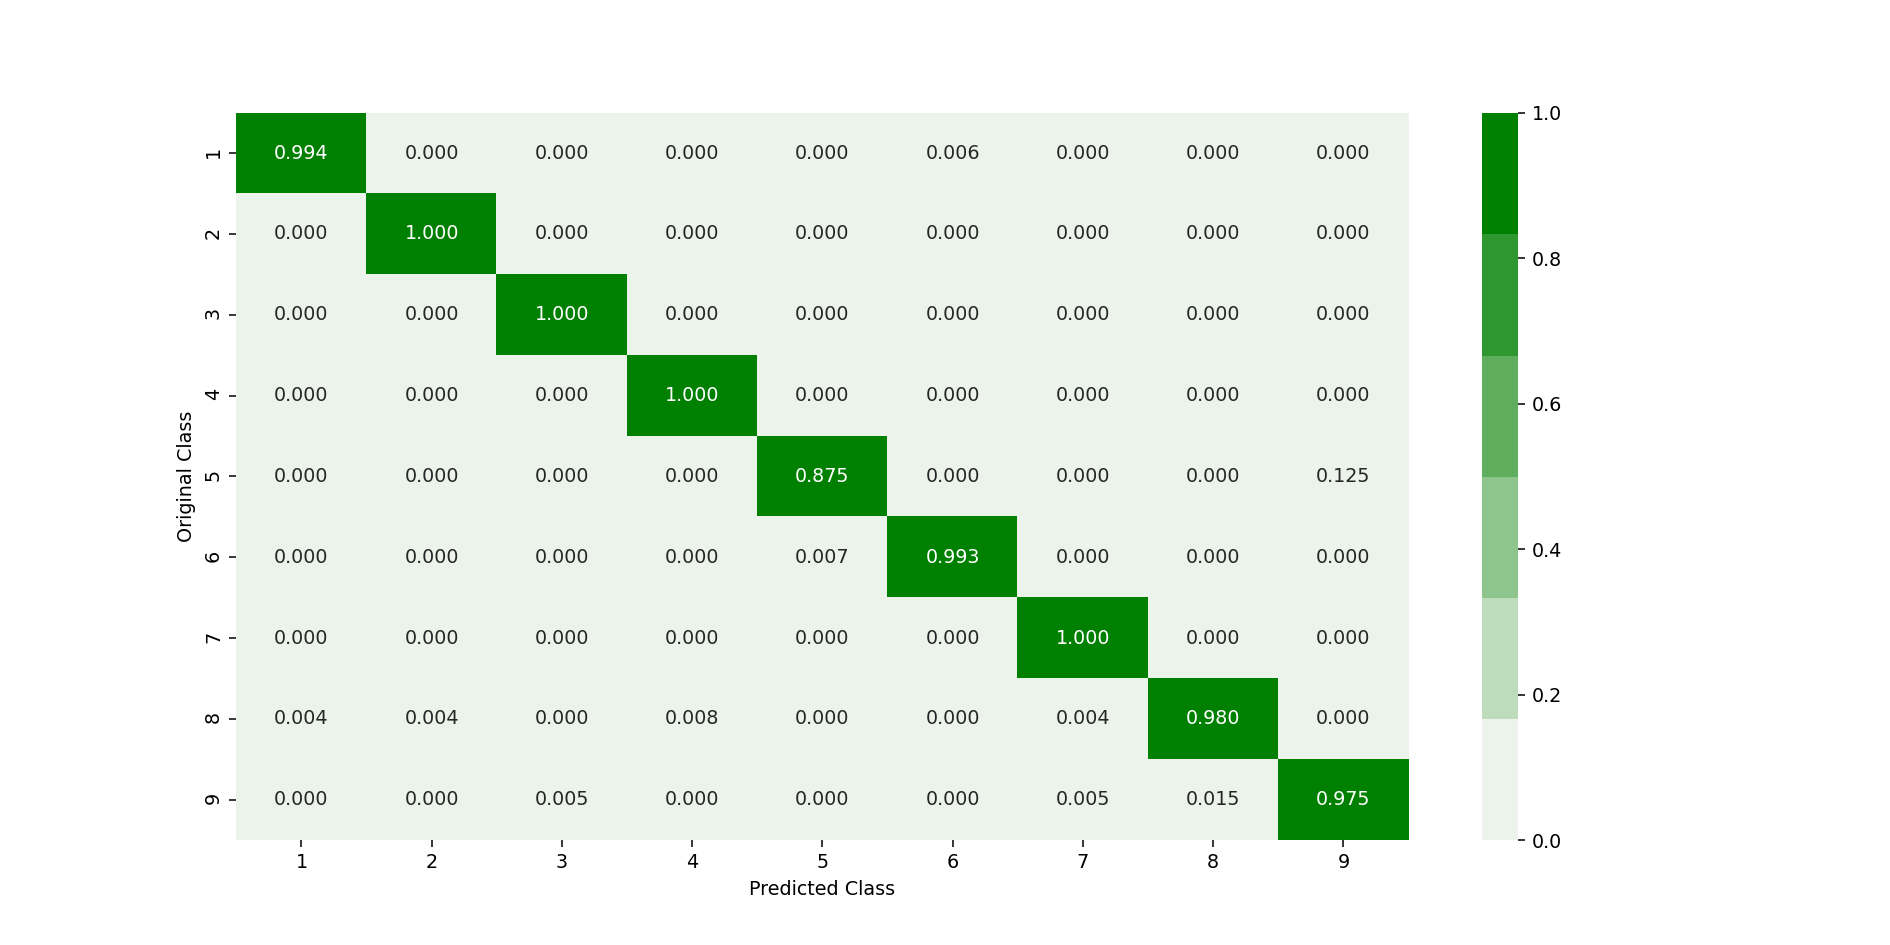

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_clf=XGBClassifier(n_estimators=i,nthread=-1)
    x_clf.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_clf.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_clf=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_clf.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

# Xgboost Classifier with best hyperparameters(ONLY on .asm file features)

In [35]:
x_clf=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_clf,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:  4.7min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:  5.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:  6.0min remaining:   40.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.5min finished


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

In [36]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.3}


In [37]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance

x_clf=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_clf.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_clf,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.012356135579270205
cv loss 0.02989379453999325
test loss 0.03665303551351036


# Bi-Gram Feature extraction from byte files

In [167]:
# saving unigram_byte_features_with_size file as csv

unigram_byte_features_with_size=pd.merge(byte_features, data_size_byte,on='ID', how='left')

unigram_byte_features_with_size.to_csv("featurization/unigram_byte_features_with_size.csv", index=False)

In [168]:
unigram_byte_features_with_size.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824   
1  9291  ...   439   281   302  7639   518  17001  54902   8588   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468   
3  1078  ...   485   462   516  1133   471    761   7998  13940   
4   422  ...   350   209   239   653   221    242   2199   9008   

   byte_file_size  class  
0        5.012695      9  
1        6.556152      2  
2        4.602051      9  
3        0.679688      1  
4        0.438965      8  

[5 rows x 260 columns]

In [39]:
%%time

from sklearn.feature_extraction.text import CountVectorizer

bigram_tokens="00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,\
2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,\
59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,\
87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,\
b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,\
e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

bigram_tokens=bigram_tokens.split(",")

# Between 00 and FF there are 256 unique values, so if we take each pair of Hexadecimal Values as one word, 
# we are dealing with 256 unique values. 
# Hence below Function will extract all the possible combinations of bigrams_counts
def calculate_bigram(bigram_tokens):
    sentence=""
    vocabulary_list_for_byte_bigrams=[]
    for i in tqdm(range(len(bigram_tokens))):
        for j in range(len(bigram_tokens)):
            bigram=bigram_tokens[i]+" "+bigram_tokens[j]
            sentence=sentence+bigram+","
            vocabulary_list_for_byte_bigrams.append(bigram)
    return vocabulary_list_for_byte_bigrams

vocabulary_list_for_byte_bigrams = calculate_bigram(bigram_tokens) 

100%|███████████████████████████████████████████████████████████████████████████████| 257/257 [00:01<00:00, 172.45it/s]

Wall time: 1.51 s


In [42]:
%%time

import scipy
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(),lowercase=False, ngram_range=(2,2),vocabulary=vocabulary_list_for_byte_bigrams) 

# For Explanations on "tokenizer=lambda x: x.split()"
# Refer - https://stackoverflow.com/a/37884104/1902852
# Without this "??" was not getting vectorized properly

file_list_byte_files=os.listdir('byteFiles')

features=["ID"]+vectorizer.get_feature_names()

byte_file_bigram_df=pd.DataFrame(columns=features)

if not os.path.isdir("featurization"):
    os.makedirs("featurization")

# Creating "featurization/byte_files_bigram_df.csv" and writng to it the full bi-gram data frame
with open("featurization/byte_files_bigram_df.csv", mode='w') as byte_file_bigram_df:
    byte_file_bigram_df.write(','.join(map(str, features)))
    byte_file_bigram_df.write('\n')
    for _, file in tqdm(enumerate(file_list_byte_files)):
        file_id=file.split(".")[0] #ID of each file
        file = open('byteFiles/' + file)
        corpus_byte_codes=[file.read().replace('\n', ' ').lower()]  # corpus_byte_codes holds all the byte codes for a given file
        bigrams_counts = vectorizer.transform(corpus_byte_codes)    # Returning a sparse vector containing all the bigram counts from the corpus_byte_codes
        
        # Update each row of our dataframe with the bigram counts of the respective file
        row = scipy.sparse.csr_matrix(bigrams_counts).toarray() 
        
        # Write a single row in the CSV file
        byte_file_bigram_df.write(','.join(map(str, [file_id]+list(row[0]))))
        
        byte_file_bigram_df.write('\n')
        
        file.close()


10868it [2:32:56,  1.18it/s]

Wall time: 2h 32min 58s


# Extracting the 2000 Most Important Features from Byte bigrams using SelectKBest with Chi-Square Test

In [63]:
%%time

# Load the byte_files_bigram_df.csv file which is NOT normalized dataset for the byte file's bigrams
# that we created in the previous cell

X_byte_bigram_all_df = pd.read_csv("featurization/byte_files_bigram_df.csv")    #filesize is 1.5Gb, It takes time to load
X_byte_bigram_all_df.head(2)

Wall time: 17min


ID   00 00  00 01  00 02  00 03  00 04  00 05  00 06  \
0  01azqd4InC7m9JpocGv5  273053   1002    801   1170    943    840   1125   
1  01IsoiSMh5gxyDYTl4CB   19852    719     64     43    159     10      6   

   00 07  00 08  ...  ?? f7  ?? f8  ?? f9  ?? fa  ?? fb  ?? fc  ?? fd  ?? fe  \
0   1003    860  ...      0      0      0      0      0      0      0      0   
1     10     35  ...      0      0      0      0      0      0      0      0   

   ?? ff  ?? ??  
0      0   1707  
1      0   8047  

[2 rows x 66050 columns]

In [64]:
X_byte_bigram_all_df.head()

ID   00 00  00 01  00 02  00 03  00 04  00 05  00 06  \
0  01azqd4InC7m9JpocGv5  273053   1002    801   1170    943    840   1125   
1  01IsoiSMh5gxyDYTl4CB   19852    719     64     43    159     10      6   
2  01jsnpXSAlgw6aPeDxrU   16032    592    157    144    509    590    551   
3  01kcPWA9K2BOxQeS5Rju    9903    204     59     69    103     34     19   
4  01SuzwMJEIXsK7A8dQbl   15288     58     20    110      8     11      3   

   00 07  00 08  ...  ?? f7  ?? f8  ?? f9  ?? fa  ?? fb  ?? fc  ?? fd  ?? fe  \
0   1003    860  ...      0      0      0      0      0      0      0      0   
1     10     35  ...      0      0      0      0      0      0      0      0   
2    146    523  ...      0      0      0      0      0      0      0      0   
3     21     55  ...      0      0      0      0      0      0      0      0   
4      5      8  ...      0      0      0      0      0      0      0      0   

   ?? ff  ?? ??  
0      0   1707  
1      0   8047  
2      0    432  
3      0  13066  
4      0   8442  

[5 rows x 66050 columns]

In [65]:
%%time

from sklearn.feature_selection import SelectKBest, chi2, f_regression

select_kbest_object = SelectKBest(score_func=chi2, k=2000)
# SelectKBest scores the features using a function, which is chi2 here
# Then "removes all but the k highest scoring features"

# Need to remove "ID" column, else will get below error 
# "SelectKBest fit: ValueError: could not convert string to float"

most_imp_features_byte_bigram = select_kbest_object.fit(X_byte_bigram_all_df.drop("ID", axis=1), class_labels)

# most_imp_features_byte_bigram.scores_ => gives an array of form 
# array([9.79531407e+05, 4.26642398e+04, 1.78812060e+04, ..., 4.33426736e+07])
# So now creating a df from this array
most_imp_byte_bigram_feature_score_df = pd.DataFrame(most_imp_features_byte_bigram.scores_)

# Creating a df from all the column names from the original full X_byte_bigram_all_df df
most_imp_byte_bigram_columns_df = pd.DataFrame(X_byte_bigram_all_df.columns)

Wall time: 12.2 s


In [184]:
# Concat the feature scores along with the feature names in a byte_bigram_df_important_feature_score, 
# From this we will get all feature names later, to be matched against X_byte_bigram_all_df - to extract ONLY the best features from the bigrams df data
byte_bigram_df_important_feature_score = pd.concat([most_imp_byte_bigram_columns_df, most_imp_byte_bigram_feature_score_df],axis=1)

byte_bigram_df_important_feature_score.columns = ["Byte Bigram Top 2000 Feature Names","Byte Bigram Top 2000 Feature Score"]

# Find the top 2000 features along with their scores

# byte_bigram_df_important_feature_score=byte_bigram_df_important_feature_score.nlargest(1000, "Byte Bigram Top 2000 Feature Score")

# Return the first 2000 rows with the largest values in the specified column ( "Byte Bigram Top 2000 Feature Score" )
# in descending order. The columns that are not specified are returned as well, but not used for ordering.
# Let's look at the top 10 features along with their scores + Save the feature score DF
byte_bigram_df_important_feature_score = byte_bigram_df_important_feature_score.nlargest(2000, "Byte Bigram Top 2000 Feature Score")

byte_bigram_df_important_feature_score.head(2)

Byte Bigram Top 2000 Feature Names  Byte Bigram Top 2000 Feature Score
66048                              ?? ff                        9.457910e+09
52632                              cc cb                        3.045845e+08

In [185]:
if not os.path.isdir("featurization/featurization_final"):
    os.mkdir("featurization/featurization_final")
    
# Getting the list of first 2000 feature names
top_2000_most_imp_byte_bigram_feature_names = list(byte_bigram_df_important_feature_score["Byte Bigram Top 2000 Feature Names"])

# top_2000_byte_bigram_features = dd.concat([X_byte_bigram_all_df["ID"], X_byte_bigram_all_df[top_2000_most_imp_byte_bigram]], axis=1)
top_2000_byte_bigram_features = pd.concat([X_byte_bigram_all_df["ID"], X_byte_bigram_all_df[top_2000_most_imp_byte_bigram_feature_names].drop("ID", axis=1)], axis=1)

top_2000_byte_bigram_features.to_csv("featurization/featurization_final/top_2000_imp_byte_bigram_df.csv",index=None)

print(top_2000_byte_bigram_features.shape)

top_2000_byte_bigram_features.head()

(10868, 2000)


ID  ?? ff  cc cb  ff fe  fe ??  00 fe  f0 ef  f0 00  \
0  01azqd4InC7m9JpocGv5      0      9      6      0    825      7   1482   
1  01IsoiSMh5gxyDYTl4CB      0      6    125      0     58      2      7   
2  01jsnpXSAlgw6aPeDxrU      0    278     84      0    150      5    114   
3  01kcPWA9K2BOxQeS5Rju      0      1     63      0     26      1     44   
4  01SuzwMJEIXsK7A8dQbl      0      0      3      0      5      3      8   

   02 01  10 0f  ...  13 ef  20 31  32 2b  f0 11  fc 11  8d 11  30 45  11 fd  \
0      9      6  ...      3      6      3      4      4      9      8      5   
1    105      1  ...      0      0      0      0      1      0      0      0   
2     16      5  ...      7      5      5      3      3     23      4      5   
3      3      2  ...      2      5      1      2      2      1      8      3   
4      2      0  ...      1      0      2      0      0      0      1      0   

   f0 0f  30 83  
0      8      9  
1      2      4  
2      4     17  
3      2      5  
4      7      1  

[5 rows x 2000 columns]

# ASM Files - Convert the ASM files to images.

In [45]:
%%time

if not os.path.isdir("image_file_asm"):
    os.mkdir("image_file_asm")

asmfile_list=os.listdir("asmFiles/")

# Function to extract images from ASM files and save them to a specified folder (the second arg to the func)
def extract_images_from_text(arr_of_filenames, folder_to_save_generated_images):  
    for file_name in tqdm(arr_of_filenames):
        
        if(file_name.endswith("asm")):
            this_file = codecs.open("asmFiles/" + file_name, 'rb')
            size_of_current_asm_file = os.path.getsize("asmFiles/"+file_name)        
        
        width_of_file = int(size_of_current_asm_file**0.5)
        
        remainder = size_of_current_asm_file % width_of_file
        
        # To create array of single bytes, passing type code 'B'
        # "B" is for unsigned characters
        array_of_image = array.array('B')
        
        array_of_image.fromfile(this_file, size_of_current_asm_file-remainder)
        
        this_file.close()
        
        arr_of_generated_image = np.reshape(array_of_image[:width_of_file * width_of_file], (width_of_file, width_of_file))
        
        arr_of_generated_image = np.uint8(arr_of_generated_image)
        
        imageio.imwrite(folder_to_save_generated_images+'/' + file_name.split(".")[0] + '.png', arr_of_generated_image)
        
        
# Now invoke the above function

directory_to_save_generated_image = 'image_file_asm'

extract_images_from_text(asmfile_list, directory_to_save_generated_image)

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [1:55:10<00:00,  1.57it/s]

Wall time: 1h 55min 11s


# Extract the first 800 pixel data from ASM File Images

In [187]:
# Load each ASM image > Convert it into a numpy array > Take the first 800 pixels from each image.

file_list_asm_files=os.listdir('image_file_asm/')

with open("featurization/top_800_image_asm_df.csv", mode='w') as top_800_image_asm_df: #file_list_asm_files = 10868, top_800_image_asm_df=800
    top_800_image_asm_df.write(','.join(map(str, ["ID"]+["pixel_asm{}".format(i) for i in range(800)])))
#     top_800_image_asm_df.write(','.join(map(str, ["ID"]+["pixel_asm{}".format(i) for i in range(10)])))
    top_800_image_asm_df.write('\n')
    
    for image in tqdm(file_list_asm_files):
        file_id_asm_files=image.split(".")[0]
        
         # Create a 2 Matrix to contain the image matrix in 2D format
        asm_image_array=imageio.imread("image_file_asm/"+image)
        
        # Extracting from flattened array the first 800 pixels 
        asm_image_array=asm_image_array.flatten()[:800]
        top_800_image_asm_df.write(','.join(map(str, [file_id_asm_files]+list(asm_image_array))))
        top_800_image_asm_df.write('\n')

100%|████████████████████████████████████████████████████████████████████████████| 10868/10868 [12:22<00:00, 14.63it/s]


In [57]:
top_800_image_asm_df=pd.read_csv("featurization/top_800_image_asm_df.csv")
top_800_image_asm_df.head()

ID  pixel_asm0  pixel_asm1  pixel_asm2  pixel_asm3  \
0  01azqd4InC7m9JpocGv5          72          69          65          68   
1  01IsoiSMh5gxyDYTl4CB          46         116         101         120   
2  01jsnpXSAlgw6aPeDxrU          72          69          65          68   
3  01kcPWA9K2BOxQeS5Rju          72          69          65          68   
4  01SuzwMJEIXsK7A8dQbl          72          69          65          68   

   pixel_asm4  pixel_asm5  pixel_asm6  pixel_asm7  pixel_asm8  pixel_asm9  
0          69          82          58          48          48          52  
1         116          58          48          48          52          48  
2          69          82          58          48          48          52  
3          69          82          58          49          48          48  
4          69          82          58          48          48          52

In [108]:
top_800_image_asm_df.shape

(10868, 11)

# Extracting Opcodes Bigrams from ASM Files

In [46]:
%%time

opcodes_for_bigram = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

# Converting list to dictionary for faster runtime
dict_asm_opcodes = dict(zip(opcodes_for_bigram, [1 for i in range(len(opcodes_for_bigram))]))

if not os.path.isdir("opcodes_asm_files"):
    os.mkdir('opcodes_asm_files')


def calculate_sequence_of_opcodes():
    asm_file_names=os.listdir('asmFiles')
    for this_asm_file in tqdm(asm_file_names):
        each_asm_opcode_file = open("opcodes_asm_files/{}_opcode_asm_bi_grams.txt".format(this_asm_file.split('.')[0]), "w+")
        sequence_of_opcodes = ""
        with codecs.open('asmFiles/' + this_asm_file, encoding='cp1252', errors ='replace') as asm_file:
            for lines in asm_file:
                
                line = lines.rstrip().split()            
                
                for word in line:
                    if dict_asm_opcodes.get(word)==1:
                        sequence_of_opcodes += word + ' '
        each_asm_opcode_file.write(sequence_of_opcodes + "\n")
        each_asm_opcode_file.close()
    
calculate_sequence_of_opcodes()

opcodes_asm__bigram_vocabulary = calculate_bigram(opcodes_for_bigram)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]

Wall time: 3h 35min 35s


# Calcualte opcodes bigram with above defined function and make them a feature and then save the data matrix of feature as a .csv file

In [52]:
vectorizer_opcode = CountVectorizer(
    tokenizer=lambda x: x.split(),
    lowercase=False,
    ngram_range=(2, 2),
    vocabulary=opcodes_asm__bigram_vocabulary,
)  # Noting, without "tokenizer=lambda x: x.split()", "??" would not get vectorized correctly

file_list_opcode = os.listdir("opcodes_asm_files")

opcode_features = ["ID"] + vectorizer_opcode.get_feature_names()

opcodes_asm_bigram_df = pd.DataFrame(columns=opcode_features)

with open("featurization/opcodes_asm_bigram_df.csv", mode="w") as opcodes_asm_bigram_df:

    opcodes_asm_bigram_df.write(",".join(map(str, opcode_features)))

    opcodes_asm_bigram_df.write("\n")

    for _, this_asm_file in tqdm(enumerate(file_list_opcode)):

        this_file_id = this_asm_file.split("_")[0]  # ID of each this_asm_file

        this_asm_file = open("opcodes_asm_files/" + this_asm_file)

        corpus_opcodes_from_this_asm_file = [
            this_asm_file.read().replace("\n", " ").lower()
        ]  # Variable to hold all opcodes for a given this_asm_file

        bigrams_opcodes_asm = vectorizer_opcode.transform(
            corpus_opcodes_from_this_asm_file
        )  # Returning a sparse vector holding all bigram counts from corpus_opcodes_from_this_asm_file

        # Update each row of the dataframe with the bigram counts of the respective this_asm_file
        # And return a dense ndarray representation of this matrix. Because,
        # CountVectorizer produces a sparse representation of the counts using scipy.sparse.csr_matrix
        row = scipy.sparse.csr_matrix(bigrams_opcodes_asm).toarray()

        opcodes_asm_bigram_df.write(
            ",".join(map(str, [this_file_id] + list(row[0])))
        )  # Write a single row in the CSV this_asm_file

        opcodes_asm_bigram_df.write("\n")

        this_asm_file.close()


opcodes_asm_bigram_df = pd.read_csv("featurization/opcodes_asm_bigram_df.csv")
opcodes_asm_bigram_df.head()

10868it [01:15, 144.24it/s]


ID  jmp jmp  jmp mov  jmp retf  jmp push  jmp pop  \
0  01azqd4InC7m9JpocGv5      440      192         0         6        0   
1  01IsoiSMh5gxyDYTl4CB        0       32         0         3        1   
2  01jsnpXSAlgw6aPeDxrU        0        0         0         0        0   
3  01kcPWA9K2BOxQeS5Rju        0        5         0         1        0   
4  01SuzwMJEIXsK7A8dQbl        5       57         1         4        1   

   jmp xor  jmp retn  jmp nop  jmp sub  ...  movzx cmp  movzx call  movzx shl  \
0       17         0        0       24  ...          0           0          0   
1        3         1        0        0  ...          1           0          0   
2        0         0        0        0  ...         12           0          0   
3        2         1        0        0  ...          0           0          0   
4        1         0        0        0  ...         11           0          0   

   movzx ror  movzx rol  movzx jnb  movzx jz  movzx rtn  movzx lea  \
0          0          0          0         0          0          0   
1          0          0          0         0          0          0   
2          0          0          0         3          0         17   
3          0          0          0         0          0          0   
4          0          0          0         0          0          0   

   movzx movzx  
0            0  
1            0  
2           12  
3            0  
4            4  

[5 rows x 677 columns]

In [169]:
#file sizes of byte files
byte_feature_size = data_size_byte       #renaming DF for easy understanding
class_labels=byte_feature_size["class"]
byte_feature_size.head()

ID  byte_file_size  class
0  01azqd4InC7m9JpocGv5        5.012695      9
1  01IsoiSMh5gxyDYTl4CB        6.556152      2
2  01jsnpXSAlgw6aPeDxrU        4.602051      9
3  01kcPWA9K2BOxQeS5Rju        0.679688      1
4  01SuzwMJEIXsK7A8dQbl        0.438965      8

# ASM File - Top Important 500 features from Opcodes Bigrams

In [60]:
X_opcode_asm_bigram = opcodes_asm_bigram_df
y = class_labels
# X_opcode_asm_bigram.head()

#Get the best 500 features using SelectKBest. 

kbest_object = SelectKBest(score_func=chi2, k=500)

top_features=kbest_object.fit(X_opcode_asm_bigram.drop("ID", axis=1), y)

# Save a dataframe with the feature scores along with the feature names.
# And we will get the best fetures from this dataframe use to 
top_features_scores=pd.DataFrame(top_features.scores_)

# Now to get the original features names i.e. the names of all the columns we will need
# `X_opcode_asm_bigram.columns`
X_opcode_columns=pd.DataFrame(X_opcode_asm_bigram.columns)

# Now concat all  original features names as a column with another column
# which is "top_features_scores"
top_asm_opcode_bigram_df=pd.concat([X_opcode_columns, top_features_scores],axis=1)

# Give 2 Names for these 2 columns of data for this newly creaetd dataframe
top_asm_opcode_bigram_df.columns=["ASM_Opcode_Bigram_Top_Feature_Name","ASM_Opcode_Bigram_Top_Feature_Score"]

# Extract the largest 500 from this dataframw based on the values of "top_features_scores"
top_asm_opcode_bigram_df=top_asm_opcode_bigram_df.nlargest(500,"ASM_Opcode_Bigram_Top_Feature_Score")

top_asm_opcode_bigram_df.head()

ASM_Opcode_Bigram_Top_Feature_Name  ASM_Opcode_Bigram_Top_Feature_Score
27                             mov jmp                         2.268131e+07
81                           push retf                         1.432259e+07
79                            push jmp                         9.157797e+06
95                            push cmp                         8.970330e+06
313                           imul jmp                         8.319890e+06

In [69]:
top_500_asm_bigram_features=list(top_asm_opcode_bigram_df["ASM_Opcode_Bigram_Top_Feature_Name"])

top_500_asm_bigram_df=pd.concat([X_opcode_asm_bigram["ID"], X_opcode_asm_bigram[top_500_asm_bigram_features]], axis=1)

# The "ID" column was being duplicated, hence need to remove that, and also the possibility of any other duplicated column
top_500_asm_bigram_df = top_500_asm_bigram_df.loc[:,~top_500_asm_bigram_df.columns.duplicated()]

top_500_asm_bigram_df.to_csv("featurization/featurization_final/top_500_asm_opcodes_bigram_df.csv",index=None)

top_500_asm_bigram_df.head()

ID  mov jmp  push retf  push jmp  push cmp  imul jmp  \
0  01azqd4InC7m9JpocGv5      165          0         0         2         2   
1  01IsoiSMh5gxyDYTl4CB       34          0         0         3         0   
2  01jsnpXSAlgw6aPeDxrU        0          0         0         0         0   
3  01kcPWA9K2BOxQeS5Rju        3          0         0         0         0   
4  01SuzwMJEIXsK7A8dQbl       51          2         1         0         0   

   mov add  mov retf  call jmp  mov cmp  ...  jnb ror  retn call  sub rol  \
0      219         0        58      285  ...        0          0        0   
1      114         0         1       74  ...        0          4        0   
2        0         0         0        0  ...        0          0        0   
3        2         0         2        6  ...        0          0        0   
4      389         0         0      144  ...        0          0        0   

   jmp shl  call call  inc add  shr xor  call or  nop mov  rol mov  
0        2         51        1        0        3        0        0  
1        0          2        2        0        0        4        0  
2        0          3        0        0       12        0        0  
3        0          0        0        0        0        0        0  
4        0         67        0        0        0        0        0  

[5 rows x 500 columns]

# Extracting Opcode Trigrams from ASM Files

In [47]:
# Function to return all possible n*n*n combinations of trigrams
def calculate_trigram(tokens):
    sent = ""
    trigram_result = []
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            for k in range(len(tokens)):
                trigram = tokens[i] + " " + tokens[j] + " " + tokens[k]
                trigram_result.append(trigram)
    return trigram_result
  

In [48]:
%%time
opcodes_trigram = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

opcodes_trigram_asm_vocabulary = calculate_trigram(opcodes_trigram)  # Holding all n*n*n possible combinations of trigrams_from_asm_files

vectorizer = CountVectorizer(
    tokenizer=lambda x: x.split(),
    lowercase=False,
    ngram_range=(3, 3),
    vocabulary=opcodes_trigram_asm_vocabulary,
)  # NOTE: without "tokenizer=lambda x: x.split()", "??" would not get vectorized properly

file_lists_asm_opcodes = os.listdir("opcodes_asm_files")

features = ["ID"] + vectorizer.get_feature_names()

opcodes_asm_trigram_df = pd.DataFrame(columns=features)

with open("featurization/opcodes_asm_trigram_df.csv", mode="w") as opcodes_asm_trigram_df:
    
    opcodes_asm_trigram_df.write(",".join(map(str, features)))
    
    opcodes_asm_trigram_df.write("\n")
    
    for _, current_asm_textized_file in tqdm(enumerate(file_lists_asm_opcodes)):
        each_file_id = current_asm_textized_file.split("_")[0]
        current_asm_textized_file = open("opcodes_asm_files/" + current_asm_textized_file)
        corpus_for_asm_files_opcodes = [
            current_asm_textized_file.read().replace("\n", " ").lower()
        ]  # This will contain all the opcodes_trigram codes for a given current_asm_textized_file

        # CountVectorizer produces a sparse representation of the counts using scipy.sparse.csr_matrix.
        # Hence below is a sparse vector of all trigram counts from corpus_for_asm_files_opcodes
        trigrams_from_asm_files = vectorizer.transform(corpus_for_asm_files_opcodes)

        # So now return a dense ndarray representation of this matrix
        # Updating each row_trigram_count of the dataframe with trigram counts
        # of corresponding current_asm_textized_file
        row_trigram_count = scipy.sparse.csr_matrix(trigrams_from_asm_files).toarray()

        # Write that single row in the CSV for current_asm_textized_file
        opcodes_asm_trigram_df.write(
            ",".join(map(str, [each_file_id] + list(row_trigram_count[0])))
        )

        opcodes_asm_trigram_df.write("\n")

        current_asm_textized_file.close()


opcodes_asm_trigram_df = pd.read_csv("featurization/opcodes_asm_trigram_df.csv")
opcodes_asm_trigram_df.head()

10868it [03:46, 47.90it/s]


Wall time: 4min 50s


ID  jmp jmp jmp  jmp jmp mov  jmp jmp retf  jmp jmp push  \
0  01azqd4InC7m9JpocGv5          437            0             0             0   
1  01IsoiSMh5gxyDYTl4CB            0            0             0             0   
2  01jsnpXSAlgw6aPeDxrU            0            0             0             0   
3  01kcPWA9K2BOxQeS5Rju            0            0             0             0   
4  01SuzwMJEIXsK7A8dQbl            2            1             1             1   

   jmp jmp pop  jmp jmp xor  jmp jmp retn  jmp jmp nop  jmp jmp sub  ...  \
0            0            1             0            0            0  ...   
1            0            0             0            0            0  ...   
2            0            0             0            0            0  ...   
3            0            0             0            0            0  ...   
4            0            0             0            0            0  ...   

   movzx movzx cmp  movzx movzx call  movzx movzx shl  movzx movzx ror  \
0                0                 0                0                0   
1                0                 0                0                0   
2                1                 0                0                0   
3                0                 0                0                0   
4                1                 0                0                0   

   movzx movzx rol  movzx movzx jnb  movzx movzx jz  movzx movzx rtn  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               1                0   
3                0                0               0                0   
4                0                0               0                0   

   movzx movzx lea  movzx movzx movzx  
0                0                  0  
1                0                  0  
2                1                  1  
3                0                  0  
4                0                  0  

[5 rows x 17577 columns]

# ASM File - Top Important 800 features from Opcodes Trigrams

In [70]:
%%time 

X_opcode_asm_trigram = opcodes_asm_trigram_df
y = class_labels
# X_opcode_asm_trigram.head()

#Get the best 500 features using SelectKBest. Save the feature scores along with the feature names in a feature_score_df_df, which we will use to get the best fetures from the bigrams df data

kbest_object = SelectKBest(score_func=chi2, k=800)

top_features=kbest_object.fit(X_opcode_asm_trigram.drop("ID", axis=1), y)

top_features_scores=pd.DataFrame(top_features.scores_)

X_opcode_columns=pd.DataFrame(X_opcode_asm_trigram.columns)

top_asm_opcode_trigram_df=pd.concat([X_opcode_columns,top_features_scores],axis=1)

top_asm_opcode_trigram_df.columns=["ASM_Opcode_Top_Feature_Name","ASM_Opcode_Top_Feature_Score"]

top_asm_opcode_trigram_df=top_asm_opcode_trigram_df.nlargest(800,"ASM_Opcode_Top_Feature_Score")

top_asm_opcode_trigram_df.head()

Wall time: 4.76 s


ASM_Opcode_Top_Feature_Name  ASM_Opcode_Top_Feature_Score
703                  mov mov jmp                  1.374010e+07
2109              push push retf                  6.004949e+06
714                  mov mov add                  4.967466e+06
8139                imul mov jmp                  4.928314e+06
989                 mov imul jmp                  4.812556e+06

In [71]:
%%time

# Get List of the 800 top features
top_800_asm_trigram_features=list(top_asm_opcode_trigram_df["ASM_Opcode_Top_Feature_Name"])

top_800_asm_trigam_df=pd.concat([X_opcode_asm_trigram["ID"], X_opcode_asm_trigram[top_800_asm_trigram_features]], axis=1)

# The "ID" column was being duplicated, hence need to remove that, and also the possibility of any other duplicated column
top_800_asm_trigam_df = top_800_asm_trigam_df.loc[:,~top_800_asm_trigam_df.columns.duplicated()]

top_800_asm_trigam_df.to_csv("featurization/featurization_final/top_800_asm_opcodes_trigram_df.csv",index=None)

top_800_asm_trigam_df.head()

Wall time: 1.08 s


ID  mov mov jmp  push push retf  mov mov add  \
0  01azqd4InC7m9JpocGv5           37               0          131   
1  01IsoiSMh5gxyDYTl4CB            4               0           78   
2  01jsnpXSAlgw6aPeDxrU            0               0            0   
3  01kcPWA9K2BOxQeS5Rju            0               0            0   
4  01SuzwMJEIXsK7A8dQbl           20               0          305   

   imul mov jmp  mov imul jmp  push push cmp  push call jmp  mov push retf  \
0             6             1              1             16              0   
1             0             0              0              1              0   
2             0             0              0              0              0   
3             0             0              0              0              0   
4             0             0              0              0              0   

   push mov retf  ...  cmp add jmp  cmp lea cmp  sub add jmp  jmp add jmp  \
0              0  ...            2            0            0            4   
1              0  ...            0            0            0            0   
2              0  ...            0            0            0            0   
3              0  ...            0            0            0            0   
4              0  ...            0            0            0            0   

   cmp lea shr  add mov or  add mov sub  mov movzx dec  retf retf jmp  \
0            0           3            5              0              0   
1            0           2           10              1              0   
2            0           0            0              0              0   
3            0           0            0              0              0   
4            0           0            4              0              0   

   jz rtn movzx  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 800 columns]

# Final Merging of all Features

## - Unigram of Byte Files + Size of Byte Files + 

## - Top 52 Unigram of ASM Files + Size of ASM Files

## - Top 2000 Bi-Gram of Byte files +  

## - Top 500 Bigram of Opcodes of ASM Files

## - Top 800 Trigram of Opcodes of ASM Files

## - Top 800 ASM Image Features

In [190]:
%%time

# Unigram of Byte Files + Size of Byte Files + 
unigram_byte_features_with_size = pd.read_csv("featurization/featurization_final/unigram_byte_features_with_size.csv")

# Top 52 Unigram of ASM Files  + Size of ASM Files
# Droping .BSS, .rtn, .CODE features from the unigram_asm_feature__with_size (which is the unigram of asm files) dataset
# As we earlier saw that these features were not much important in separating class labels
unigram_asm_feature_with_size = pd.read_csv("featurization/unigram_asm_feature_with_size.csv").drop(
    ["class", "rtn", ".BSS:", ".CODE"], axis=1)

# Top 2000 Bi-Gram of Byte files
# top_2000_imp_byte_bigram_df = pd.read_csv(
#     root_path + "featurization/featurization_final/top_2000_imp_byte_bigram_df.csv"
# ).drop(columns=["ID.1"])

top_2000_imp_byte_bigram_df = pd.read_csv("featurization/featurization_final/top_2000_imp_byte_bigram_df.csv")

# Top 500 Bigram of Opcodes of ASM Files
top_500_asm_bigram_df = pd.read_csv("featurization/featurization_final/top_500_asm_opcodes_bigram_df.csv")


# Top 800 Trigram of Opcodes of ASM Files
top_800_asm_trigam_df = pd.read_csv("featurization/featurization_final/top_800_asm_opcodes_trigram_df.csv")

# Top 800 ASM Image Features
top_800_image_asm_df = pd.read_csv("featurization/featurization_final/top_800_image_asm_df.csv")


Wall time: 3.15 s


In [191]:
%%time

# Initiate a dataframe for representing the Combined Features
# and set it equal to uni_gram_byte_features__with_size
combined_features_final_df = unigram_byte_features_with_size

individual_featuarized_dfs = [
    unigram_asm_feature_with_size,
    top_800_image_asm_df,
    top_2000_imp_byte_bigram_df,
    top_500_asm_bigram_df,
    top_800_asm_trigam_df
]

for df in tqdm(individual_featuarized_dfs):
    # combined_features_final_df = pd.merge(combined_features_final_df, df, on="ID", how="left")
    combined_features_final_df = pd.merge(combined_features_final_df, df, on="ID")

combined_features_final_df.to_csv("featurization/featurization_final/combined_features_final_df.csv",index=None,)

combined_features_final_df.head()

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.93it/s]


Wall time: 7.96 s


ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...  cmp add jmp  cmp lea cmp  sub add jmp  jmp add jmp  cmp lea shr  \
0  2965  ...            2            0            0            4            0   
1  9291  ...            0            0            0            0            0   
2  9107  ...            0            0            0            0            0   
3  1078  ...            0            0            0            0            0   
4   422  ...            0            0            0            0            0   

   add mov or  add mov sub  mov movzx dec  retf retf jmp  jz rtn movzx  
0           3            5              0              0             0  
1           2           10              1              0             0  
2           0            0              0              0             0  
3           0            0              0              0             0  
4           0            4              0              0             0  

[5 rows x 4406 columns]

In [192]:
print('unigram_byte_features_with_size:',unigram_byte_features_with_size.shape)
print('unigram_asm_features_with_size:',unigram_asm_feature_with_size.shape)
print('top_2000_imp_byte_bigram_df:',top_2000_imp_byte_bigram_df.shape)
print('top_800_image_asm_df:',top_800_image_asm_df.shape)
print('top_500_asm_opcode_bigram_df:',top_500_asm_bigram_df.shape)
print('top_800_asm_opcode_trigam_df:',top_800_asm_trigam_df.shape) 

unigram_byte_features_with_size: (10868, 260)
unigram_asm_features_with_size: (10868, 50)
top_2000_imp_byte_bigram_df: (10868, 2000)
top_800_image_asm_df: (10868, 801)
top_500_asm_opcode_bigram_df: (10868, 500)
top_800_asm_opcode_trigam_df: (10868, 800)


# Final Train Test Split. 64% Train, 16% Cross Validation, 20% Test

In [6]:
combined_features_final_df = pd.read_csv("featurization/featurization_final/combined_features_final_df.csv")

combined_features_final_df_normalized = normalize(combined_features_final_df)

combined_features_final_df_normalized.to_csv("featurization/featurization_final/combined_features_final_df_normalized.csv", index=None)

In [7]:
%%time

final_X = pd.read_csv("featurization/featurization_final/combined_features_final_df_normalized.csv").fillna(0).drop(['ID','class'], axis=1)

final_y = pd.read_csv("featurization/featurization_final/combined_features_final_df_normalized.csv")["class"]


# Splitting - Keep same distribution of class label 'y_true' with [stratify=final_y]
X_train, X_test_final_merged, y_train, y_test_final_merged = train_test_split(final_X, final_y, stratify=final_y, test_size=0.20, random_state=42)

X_train_final_merged, X_cv_final_merged, y_train_final_merged, y_cv_final_merged = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20, random_state=42)

print('Shape of X_train_final_merged and y_train_final_merged: ', X_train_final_merged.shape, y_train_final_merged.shape)

print('Shape of X_test_final_merged and y_test_final_merged: ', X_test_final_merged.shape, y_test_final_merged.shape)

print('Shape of X_cv_final_merged and y_cv_final_merged ', X_cv_final_merged.shape, y_cv_final_merged.shape)

Shape of X_train_final_merged and y_train_final_merged:  (6955, 4404) (6955,)
Shape of X_test_final_merged and y_test_final_merged:  (2174, 4404) (2174,)
Shape of X_cv_final_merged and y_cv_final_merged  (1739, 4404) (1739,)
Wall time: 22.9 s


# Final XGBoost Training - Hyperparameter tuning with Final Merged Data

In [11]:
%%time

xgb_clf=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1],
    'tree_method':['gpu_hist']
}

random_clf=RandomizedSearchCV(xgb_clf, param_distributions=prams, verbose=10, n_jobs=6)

random_clf.fit(X_train_final_merged, y_train_final_merged)

print(random_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed: 10.4min
Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\Siddharth\anaconda3\lib\site-packages\psutil\_pswindows.py", line 679, in wrapper
    return fun(self, *args, *

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


# Final running of XGBoost with the Best HyperParams that we got from above RandomizedSearchCV

In [ ]:
%%time

# n_estimators = random_clf.best_params_['n_estimators']
# subsample = random_clf.best_params_['subsample']
# max_depth = random_clf.best_params_['max_depth']
# learning_rate = random_clf.best_params_['learning_rate']
# colsample_bytree = random_clf.best_params_['colsample_bytree']
# tree_method = random_clf.best_params_['tree_method']

n_estimators = 1000
subsample = 0.5
max_depth = 10
learning_rate = 0.03
colsample_bytree = 1
tree_method = 'gpu_hist'

# print(tree_method)

x_clf_with_best_hyper_param=XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate= learning_rate, colsample_bytree=colsample_bytree, subsample=subsample, tree_method=tree_method, nthread=-1)

x_clf_with_best_hyper_param.fit(X_train_final_merged, y_train_final_merged, verbose=True)

sig_clf = CalibratedClassifierCV(x_clf_with_best_hyper_param, method="sigmoid")

sig_clf.fit(X_train_final_merged, y_train_final_merged)

In [ ]:
%%time

n_estimators = random_clf.best_params_['n_estimators']

# LOGLOSS FOR TRAIN
predict_y_train = sig_clf.predict_proba(X_train_final_merged)
print ('With best number of estimators = ', n_estimators, "Our train log loss is:", log_loss(y_train_final_merged, predict_y_train))

# LOGLOSS FOR TEST
predict_y_test = sig_clf.predict_proba(X_test_final_merged)
print('For values of best number of estimators = ', n_estimators, "The test log loss is:", log_loss(y_test_final_merged, predict_y_test))

# LOGLOSS FOR CV
predict_y_cv = sig_clf.predict_proba(X_cv_final_merged)
print('With best number of estimators = ', n_estimators, "Our cross validation log loss is:", log_loss(y_cv_final_merged, predict_y_cv))
